### Predicting Loan Interest Rates Using Machine Learning (ML) Models and Explainable AI (XAI) Techniques With Streamlit Deployment

In [537]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [538]:
%cd /content/drive/MyDrive/Ijaz - Updated Files/Dissertation - Masters Project/Loan Interest Rate Prediction (ML Model Development)/Interest Rate Model Development - ML

/content/drive/MyDrive/Ijaz - Updated Files/Dissertation - Masters Project/Loan Interest Rate Prediction (ML Model Development)/Interest Rate Model Development - ML


In [539]:
import stats_distributions,imputation_functions

In [540]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from scipy.stats import skew,kurtosis,shapiro,probplot,shapiro,spearmanr,mstats
from sklearn.linear_model import BayesianRidge
import statsmodels.api as sm
from scipy.stats import chi2_contingency,zscore
from sklearn.preprocessing import QuantileTransformer,RobustScaler
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import IsolationForest
from stats_distributions import *
from imputation_functions import *

interest_rate_df = pd.read_csv('/content/drive/MyDrive/Ijaz - Updated Files/Dissertation - Masters Project/Loan Interest Rate Prediction (ML Model Development)/Interest Rate Model Development - ML/loan_data.csv',low_memory = False)
display(interest_rate_df.head())
print(interest_rate_df.shape) # (887379, 74)

# column_19 = interest_rate_df.columns[18]
# column_55 = interest_rate_df.columns[55]
# print(column_19) # url
# print(column_55) # verification_status_joint

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(887379, 74)


##### 1.0 Import the required libraries

##### 1.1 Inspect for duplicate observations in the dataset

In [541]:
duplicates = interest_rate_df.duplicated().sum()
print(duplicates)

0


##### 1.2 Identify the numerical,categroical and binary variables

In [542]:
# Since there are 74 variables and 887379 observations, the data pre-processing could be simplified by identifying the variables of interest.
# The first step is to identify the numerical, categorical and binary variables in the dataset.

num_cols = interest_rate_df.select_dtypes(include= ['float64','int64']).columns
cat_cols = interest_rate_df.select_dtypes(include= ['object']).columns
# bool_cols = interest_rate_df.select_dtypes(include = ['bool']).columns # No binary variables, however there might be strings or numbers that are of integer types that has a boolean
                                                                         # boolean value.

print(num_cols)
# print(len(num_cols)) # 51 numerical variables
print(cat_cols)
# print(len(cat_cols)) # 23 categroical variables

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'annual_inc_joint', 'dti_joint', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m'],
      dtype='object')
Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_leng

##### 2.0 Numerical Variable Inspection (Distribution, Missing Values)

##### 2.1 Inspect the data types of numerical variables

In [543]:
display(interest_rate_df[num_cols].dtypes)

,0
id,int64
member_id,int64
loan_amnt,float64
funded_amnt,float64
funded_amnt_inv,float64
int_rate,float64
installment,float64
annual_inc,float64
dti,float64
delinq_2yrs,float64


##### 2.2 Proportion of null values in numerical variables




In [544]:
# print(interest_rate_df[num_cols].isnull().sum())

# Create a dictionary to inspect the percentage of null values in numerical variables

numerical_null_percentage_df = pd.DataFrame({'Percentage of Null Values (%)':interest_rate_df[num_cols].isnull().sum()/len(interest_rate_df)*100})
numerical_null_sorted_df = numerical_null_percentage_df.sort_values(by = 'Percentage of Null Values (%)',ascending = False)
display(numerical_null_sorted_df)

,Percentage of Null Values (%)
dti_joint,99.942640
annual_inc_joint,99.942415
il_util,97.902024
mths_since_rcnt_il,97.654892
open_acc_6m,97.591559
open_il_6m,97.591559
open_il_12m,97.591559
open_il_24m,97.591559
total_bal_il,97.591559
inq_last_12m,97.591559


##### Proportion Distribution for Null Values of Numerical Variables
1.   The proportion of missing values greater than 90%.
2.   The proportion of missing values greater than 50% and less than 90%.
3.   The proportion of missing valuees less greater than 5% and less than 50%.
4.   The proportion of missing values less than 5%.


##### 2.3 Examining the proportion of missing values greater than 90%

In [545]:
numerical_null_90 = numerical_null_sorted_df[numerical_null_sorted_df['Percentage of Null Values (%)']>90]
numerical_null_var_90 = numerical_null_90.index.to_list() # Create a list for using it as a reference for further analysis.
# display(numerical_null_90)
print(len(numerical_null_90))
print(numerical_null_var_90)

# Inspect the dataframe with missing values greater than 90% [Observations that were not null in the high proporortion null value variables]
high_prop_not_null = interest_rate_df[interest_rate_df[numerical_null_var_90].notnull().any(axis = 1)]
display(high_prop_not_null.head(5))
display(high_prop_not_null.tail(5))
print(len(high_prop_not_null)) # 21720 observations are not null across the columns (Can we infer some information from variables that are not null).

# Lets examine the non null_values for high_prop_null and inspect the type of application for the high proportion null values
print(high_prop_not_null['application_type'].value_counts())
# INDIVIDUAL    21209 [Signficance of individual applications in high null value proportionate variables].
# JOINT           511

16
['dti_joint', 'annual_inc_joint', 'il_util', 'mths_since_rcnt_il', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'total_bal_il', 'inq_last_12m', 'max_bal_bc', 'open_rv_24m', 'total_cu_tl', 'inq_fi', 'all_util', 'open_rv_12m']


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
466285,68444620,73334399,35000.0,35000.0,35000.0,60 months,11.99,778.38,C,C1,...,35367.0,49.3,0.0,1.0,5020.0,40.1,52200.0,1.0,4.0,0.0
466286,68547583,73437441,8650.0,8650.0,8650.0,36 months,5.32,260.50,A,A1,...,24041.0,88.8,0.0,3.0,3081.0,57.9,26800.0,1.0,0.0,5.0
466287,67849662,72708407,4225.0,4225.0,4225.0,36 months,14.85,146.16,C,C5,...,3830.0,21.9,0.0,0.0,367.0,22.4,4300.0,0.0,0.0,0.0
466288,68506885,73396712,10000.0,10000.0,10000.0,60 months,11.99,222.40,C,C1,...,35354.0,75.5,1.0,1.0,3118.0,67.4,14200.0,1.0,1.0,1.0
466289,68341763,72928789,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,10827.0,72.8,0.0,2.0,2081.0,64.7,14000.0,2.0,5.0,1.0


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
571240,62245430,66442149,10000.0,10000.0,10000.0,36 months,9.17,318.79,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,20000.0,NaN,NaN,NaN
571556,62245231,66441944,12600.0,12600.0,12600.0,60 months,18.25,321.68,E,E1,...,NaN,NaN,NaN,NaN,NaN,NaN,13200.0,NaN,NaN,NaN
571699,62205145,66401858,14400.0,14400.0,14375.0,60 months,18.55,369.99,E,E2,...,NaN,NaN,NaN,NaN,NaN,NaN,5700.0,NaN,NaN,NaN
573082,62062839,66255563,18000.0,18000.0,18000.0,60 months,18.55,462.49,E,E2,...,NaN,NaN,NaN,NaN,NaN,NaN,35700.0,NaN,NaN,NaN
573290,62002798,66195523,12000.0,12000.0,12000.0,36 months,11.53,395.89,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,27100.0,NaN,NaN,NaN


21720
application_type
INDIVIDUAL    21209
JOINT           511
Name: count, dtype: int64


##### 2.3.1 Descriptive statistics of non-missing observations

In [546]:
display(high_prop_not_null.describe(include = 'all'))

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,2.172000e+04,2.172000e+04,21720.000000,21720.000000,21720.000000,21720,21720.000000,21720.000000,21720,21720,...,21372.000000,18617.000000,21372.000000,21372.000000,21372.000000,21372.000000,21720.000000,21372.000000,21372.000000,21372.000000
unique,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,7,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,36 months,NaN,NaN,B,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,15098,NaN,NaN,6622,1477,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,6.757605e+07,7.239176e+07,15064.922882,15064.922882,15058.736188,NaN,12.295248,437.603252,NaN,NaN,...,36552.811389,71.535317,1.389060,2.975482,5887.979740,60.831939,34556.427302,0.943945,1.537058,1.977307
std,1.897535e+06,2.138966e+06,8770.984099,8770.984099,8765.903249,NaN,4.215459,250.570320,NaN,NaN,...,43103.833619,23.022862,1.520129,2.631886,5284.701239,20.013254,33702.341136,1.446872,2.723339,2.874067
min,3.617740e+05,3.490040e+05,1000.000000,1000.000000,1000.000000,NaN,5.320000,30.540000,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.000000
25%,6.731813e+07,7.211989e+07,8000.000000,8000.000000,8000.000000,NaN,9.170000,255.040000,NaN,NaN,...,10251.500000,58.600000,0.000000,1.000000,2411.000000,47.700000,14700.000000,0.000000,0.000000,0.000000
50%,6.757580e+07,7.242934e+07,14000.000000,14000.000000,14000.000000,NaN,11.990000,381.675000,NaN,NaN,...,24684.500000,74.900000,1.000000,2.000000,4483.000000,61.900000,25700.000000,0.000000,0.000000,2.000000
75%,6.816229e+07,7.300029e+07,20000.000000,20000.000000,20000.000000,NaN,14.480000,581.580000,NaN,NaN,...,47858.000000,87.600000,2.000000,4.000000,7771.500000,75.200000,43100.000000,1.000000,2.000000,3.000000


##### 2.3.2 Relationship between variables with missing values and interest rates

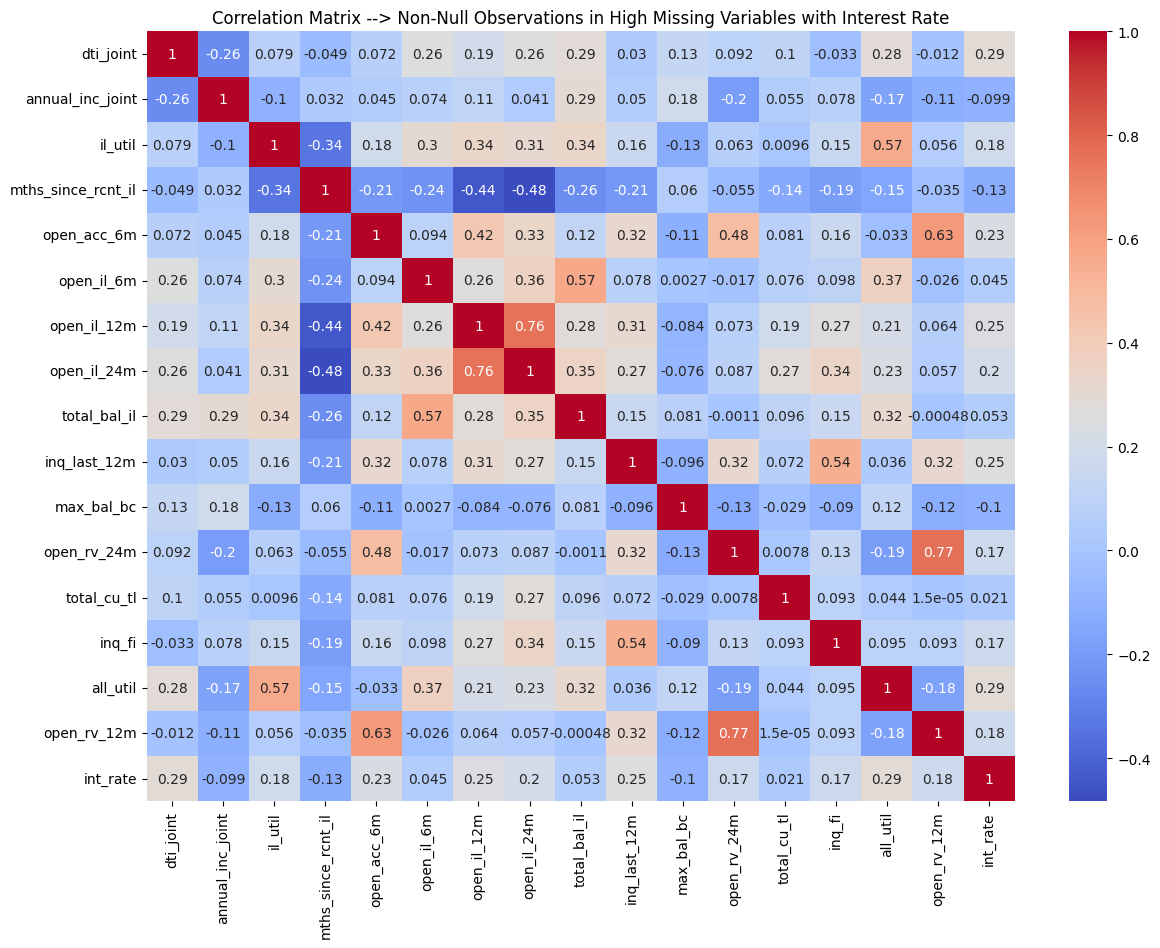

,Var1,Var2,Correlation
272,int_rate,dti_joint,0.287345
281,int_rate,inq_last_12m,0.252637
278,int_rate,open_il_12m,0.245076
279,int_rate,open_il_24m,0.199579
274,int_rate,il_util,0.183565
285,int_rate,inq_fi,0.171162
282,int_rate,max_bal_bc,-0.104402
273,int_rate,annual_inc_joint,-0.099026
280,int_rate,total_bal_il,0.053045
284,int_rate,total_cu_tl,0.020711


,count,mean,std,min,25%,50%,75%,max
int_rate,,,,,,,,
5.32,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6.24,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6.49,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6.89,2.0,260000.0,162634.559673,145000.0,202500.0,260000.0,317500.0,375000.0
6.99,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
27.49,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27.88,2.0,56500.0,40305.086528,28000.0,42250.0,56500.0,70750.0,85000.0
27.99,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,count,mean,std,min,25%,50%,75%,max
int_rate,,,,,,,,
5.32,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6.24,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6.49,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6.89,2.0,10.375,6.993286,5.43,7.9025,10.375,12.8475,15.32
6.99,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
27.49,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27.88,2.0,27.770,14.736105,17.35,22.5600,27.770,32.9800,38.19
27.99,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Figure size 640x480 with 0 Axes>

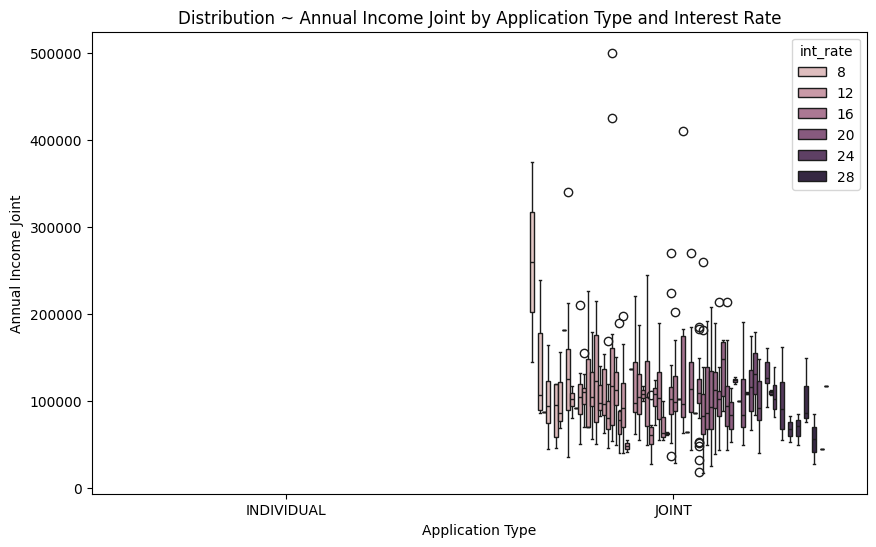

<Figure size 640x480 with 0 Axes>

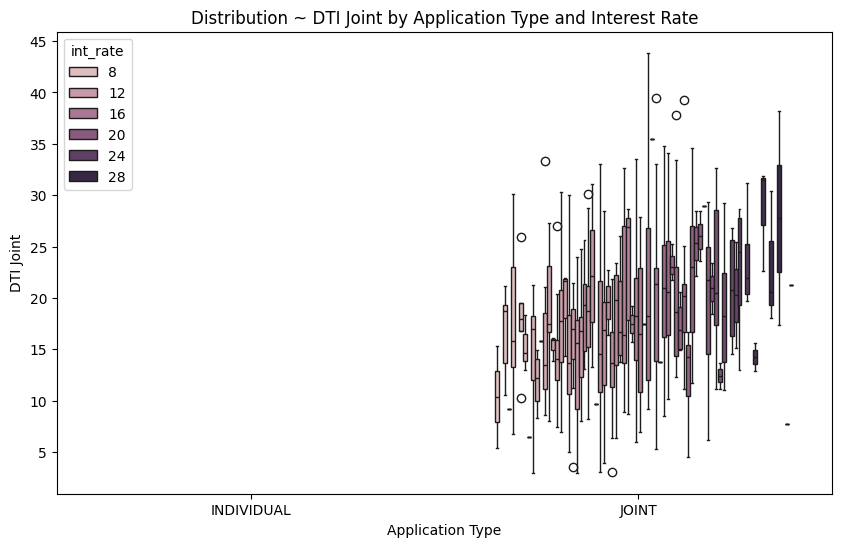

<Figure size 640x480 with 0 Axes>

In [547]:
# Inspect the correlation between non null observations of variables with high missing proportions and interest rates.
correlation_matrix = high_prop_not_null[numerical_null_var_90 + ['int_rate']].corr()
plt.figure(figsize = (14, 10))
sns.heatmap(correlation_matrix,annot = True,cmap = 'coolwarm')
plt.title('Correlation Matrix --> Non-Null Observations in High Missing Variables with Interest Rate')
plt.show()
plt.clf()

# Create a correlation dataframe for inspecting individual correlations.
high_prop_corr_df = (correlation_matrix.stack().reset_index().sort_values(by = 0,key = abs,ascending = False))
# display(high_prop_corr_df)
high_prop_corr_df.columns = ['Var1','Var2','Correlation']
high_prop_corr_df = high_prop_corr_df[high_prop_corr_df['Var1'] != high_prop_corr_df['Var2']]
high_prop_corr_df['Pairs'] = high_prop_corr_df.apply(lambda x: '-'.join(sorted([x['Var1'], x['Var2']])),axis = 1)
high_prop_corr_df = high_prop_corr_df.drop_duplicates(subset='Pairs').drop(columns='Pairs')
# display(high_prop_corr_df)
high_prop_corr_int_rate = high_prop_corr_df[high_prop_corr_df['Var1']=='int_rate']
display(high_prop_corr_int_rate)

# Analyze the relationship between non-null values of (annual_inc_joint and dti_joint) with interest rate.
int_rate_annual_inc_joint = high_prop_not_null.groupby('int_rate')['annual_inc_joint'].describe()
display(int_rate_annual_inc_joint)
int_rate_dti_joint = high_prop_not_null.groupby('int_rate')['dti_joint'].describe()
display(int_rate_dti_joint)

# Distribution of `annual_inc_joint` for individual vs joint applications (impact of interest rates)
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'application_type',y = 'annual_inc_joint',hue = 'int_rate',data = high_prop_not_null)
plt.title('Distribution ~ Annual Income Joint by Application Type and Interest Rate')
plt.xlabel('Application Type')
plt.ylabel('Annual Income Joint')
plt.show()
plt.clf()

# Distribution of `dti_joint` for individual vs joint applications
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'application_type',y = 'dti_joint',hue = 'int_rate',data = high_prop_not_null)
plt.title('Distribution ~ DTI Joint by Application Type and Interest Rate')
plt.xlabel('Application Type')
plt.ylabel('DTI Joint')
plt.show()
plt.clf()

##### Key Insights : (Missing Values Greater Than 90%)

In [548]:
# 1. From this it can be stated that number of individual loan applications outweigh the number of loan applications.
# 2. With further examination of null values no immediate information gain was made apart from the dominance of individual loan applications.
# 3. There is no data available for individual applications for both the variables that were used as examples (Debt To Income Ratios and The Annual Income) for
# demonstrating the relevance of interest rates with variables with high proportion of null values (Greater than 90%). A wider range for annual incomes indicate
# that the combined income of borrowers tend to be higher. The signficant variabilty of annual income correlates with interest rate variations but there is no
# indicative pattern suggesting that higher incomes lead to lowered interest rates and vice versa.
# 4. From the correlation analysis, some variables exhibited strong inter-correlations 'open_il_12m' and 'open_il_24m' (0.76) indicating redundancy and certain
# variables portray low correlation with the target variable interest rate which intact reduces the importance in predictive modelling.
# 5. The variables for eg. dti_joint and annual_inc_joint have large proportion of null values (approx 99.9%) and these variables do not provide
# enough information for meaningful analysis (their absence or presence would not affect the outcomes derived from the analysis).
# 6. Furthermore, imputing such a large proportion of null values might introudce bias in the analysis and increased chances for overfitting the
# model.
# 7. The reductions in dimensionality leads to enhanced learning, model performance and interpretability.

# Strategy : Dropping the High Proportion Null Variables (Greater than 90%)

In [549]:
print(interest_rate_df.shape) # (887379, 74)
interest_rate_df = interest_rate_df.drop(columns = numerical_null_var_90)
print(interest_rate_df.shape) # (887379, 58) # 16 variables have been dropped.

(887379, 74)
(887379, 58)


In [550]:
# Before going into further pre-processing of the other variables there are 2 immediate checks that needs to be done
# 1. Inpsect the proportion of individual applications vs. joint applications.
# 2. Two variables had mixed data types and we can perform the required corrections upon inspection (column 19 and column 55). [Correction Done]

print(interest_rate_df['application_type'].value_counts())

print(interest_rate_df.shape) # (887379, 58)
interest_rate_df = interest_rate_df[interest_rate_df['application_type'] == 'INDIVIDUAL']
print(interest_rate_df.shape) # (886868, 58)

application_type
INDIVIDUAL    886868
JOINT            511
Name: count, dtype: int64
(887379, 58)
(886868, 58)


##### The data has been filtered for individual loan applications. The number of observations and variables after sampling the data is 886,868 observations and 58 variables.

##### 2.4 Examining the proportion of missing values greater than 50% and less than 90%

In [551]:
numerical_null_50_90 = numerical_null_sorted_df[(numerical_null_sorted_df['Percentage of Null Values (%)']>50) &
 (numerical_null_sorted_df['Percentage of Null Values (%)']<90)]
display(numerical_null_50_90)

# Inpsect descriptive statistics, group statistics and distributions
# For this lets create a function for effective anlysis and evaluation

,Percentage of Null Values (%)
mths_since_last_record,84.555303
mths_since_last_major_derog,75.015974
mths_since_last_delinq,51.197065


##### 2.4.1 Defined functions for analysis:

statistical_analysis
1.   mean
2.   median
3.   minimum
4.   maximum
5.   variance
6.   standard deviation
7.   data type
8.   missing values
9.   missing values proportion
10.   skewness
11.  kurtosis
12.  Shapiro Wilk test for normality
13.  Histogram
14.  Boxplot
15.  Quantile-Quantile plot

imputation_functions
1.   global mean
2.   global median
3.   global mode
4.   group based functions (mean,median,mode)




/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 136937.
  res = hypotest_fun_out(*samples, **kwds)


Mean of mths_since_last_record: 70.1163746832485
Median of mths_since_last_record: 70.0
Minimum of mths_since_last_record: 0.0
Maximum of mths_since_last_record: 129.0
Variance of mths_since_last_record: 791.4164429850787
Std_Dev of mths_since_last_record: 28.132124750631238
Data Type of mths_since_last_record: float64
Null Vals of mths_since_last_record: 749931
Prop of Null Vals (%) of mths_since_last_record: 84.55948348570475
Skewness of mths_since_last_record: -0.1986007530829271
Kurtosis of mths_since_last_record: 2.4144561340241535
Shapiro-Wilk Test for mths_since_last_record:Statistics = 0.9805480173604575,p-value = 3.098708610471565e-77


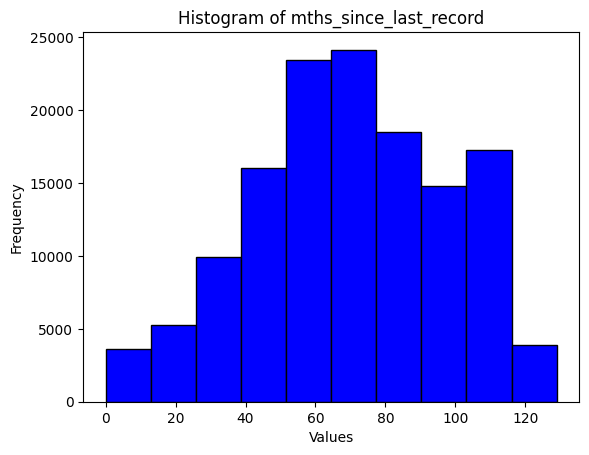

<Figure size 640x480 with 0 Axes>

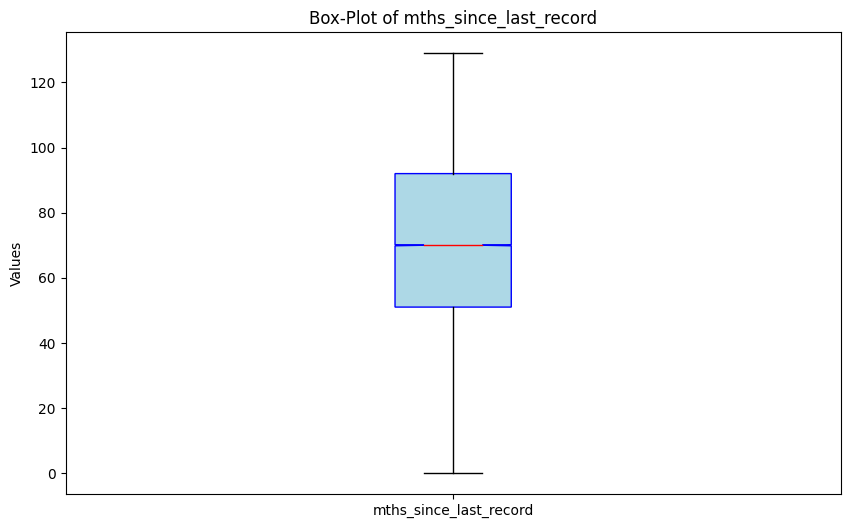

<Figure size 640x480 with 0 Axes>

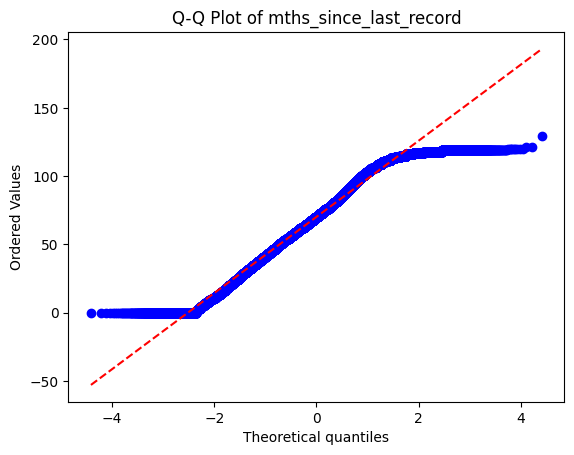

<Figure size 640x480 with 0 Axes>

In [552]:
# Statistical analysis of the variable 'mths_since_last_record' [interest_rate_df]
mths_since_last_record_stats = statistical_analysis(interest_rate_df['mths_since_last_record'],column_name = 'mths_since_last_record',
                                                    data = interest_rate_df,n = 10)

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 221556.
  res = hypotest_fun_out(*samples, **kwds)


Mean of mths_since_last_major_derog: 44.10423098449151
Median of mths_since_last_major_derog: 44.0
Minimum of mths_since_last_major_derog: 0.0
Maximum of mths_since_last_major_derog: 188.0
Variance of mths_since_last_major_derog: 491.9428767168351
Std_Dev of mths_since_last_major_derog: 22.17978531719446
Data Type of mths_since_last_major_derog: float64
Null Vals of mths_since_last_major_derog: 665312
Prop of Null Vals (%) of mths_since_last_major_derog: 75.01815377260202
Skewness of mths_since_last_major_derog: 0.2651240624812256
Kurtosis of mths_since_last_major_derog: 2.9693370963307895
Shapiro-Wilk Test for mths_since_last_major_derog:Statistics = 0.9781661025003582,p-value = 7.329231013441697e-88


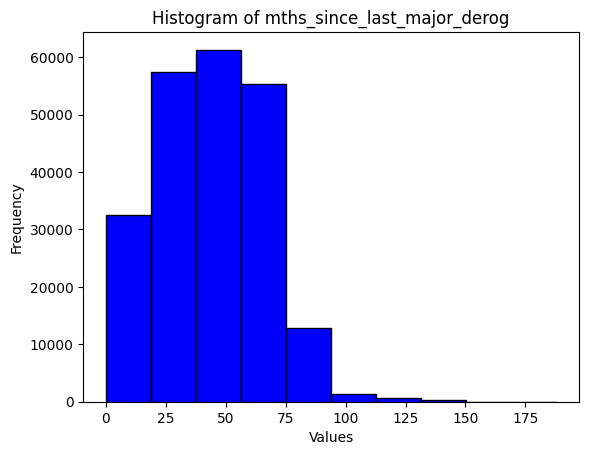

<Figure size 640x480 with 0 Axes>

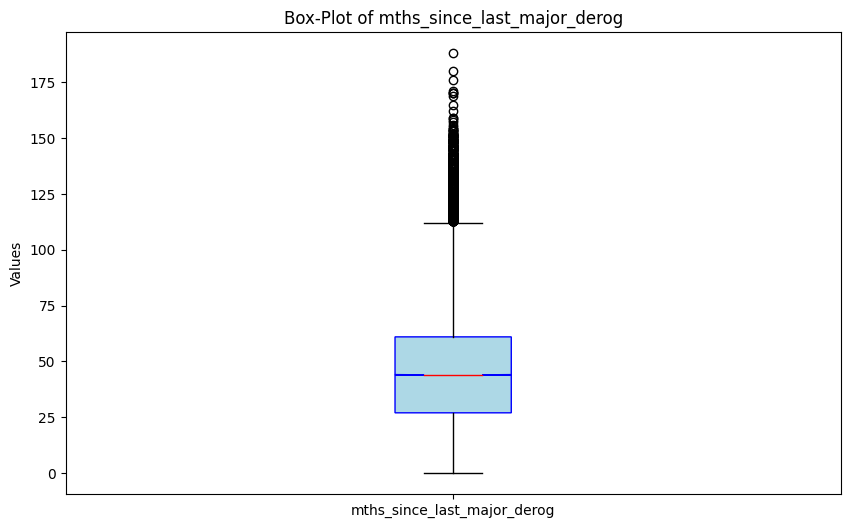

<Figure size 640x480 with 0 Axes>

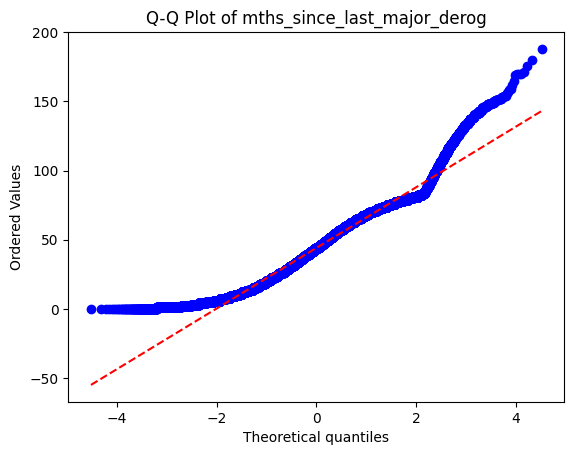

<Figure size 640x480 with 0 Axes>

In [553]:
# Statistical analysis of the variable 'mths_since_last_major_derog' [interest_rate_df]
mths_since_last_major_derog_stats = statistical_analysis(interest_rate_df['mths_since_last_major_derog'],column_name = 'mths_since_last_major_derog',
                                                    data = interest_rate_df,n = 10)

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 432788.
  res = hypotest_fun_out(*samples, **kwds)


Mean of mths_since_last_delinq: 34.06499718106787
Median of mths_since_last_delinq: 31.0
Minimum of mths_since_last_delinq: 0.0
Maximum of mths_since_last_delinq: 188.0
Variance of mths_since_last_delinq: 478.9752479950844
Std_Dev of mths_since_last_delinq: 21.88550314694831
Data Type of mths_since_last_delinq: float64
Null Vals of mths_since_last_delinq: 454080
Prop of Null Vals (%) of mths_since_last_delinq: 51.20040411876401
Skewness of mths_since_last_delinq: 0.4554603210057623
Kurtosis of mths_since_last_delinq: 2.2326073846268475
Shapiro-Wilk Test for mths_since_last_delinq:Statistics = 0.9512631518736152,p-value = 5.3467041616174146e-120


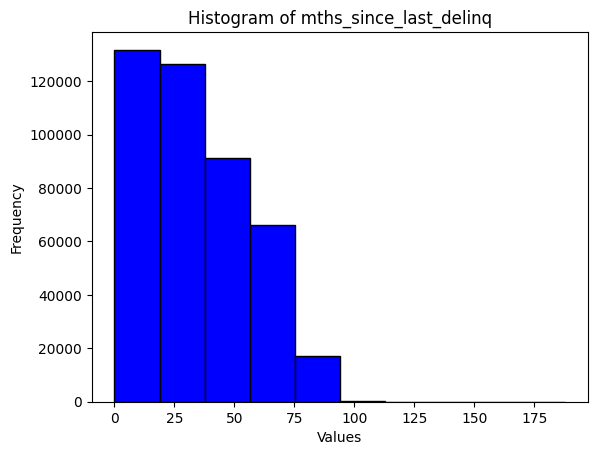

<Figure size 640x480 with 0 Axes>

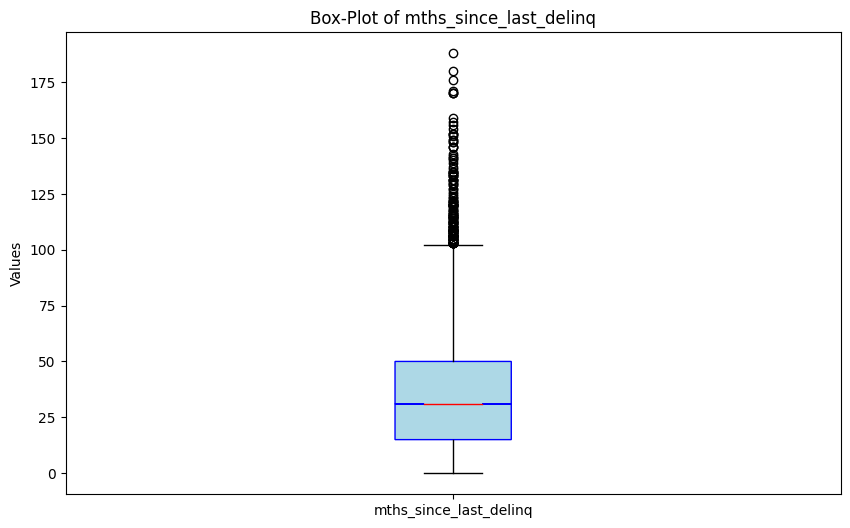

<Figure size 640x480 with 0 Axes>

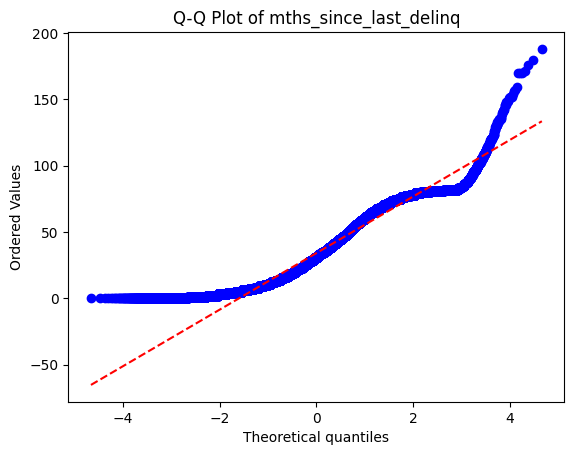

<Figure size 640x480 with 0 Axes>

In [554]:
# Statistical analysis of the variable 'mths_since_last_delinq' [interest_rate_df]
mths_since_last_delinq_stats = statistical_analysis(interest_rate_df['mths_since_last_delinq'],column_name = 'mths_since_last_delinq',
                                                    data = interest_rate_df,n = 10)

##### 2.4.2 Evaluating the methods of imputation for the large proportion of null values (Greater than 50% and Less than 90%).


##### Method A : Iterative Imputer with Bayesian Ridge Estimator, Data Frame = interest_rate_df_1
###### Variables of interest : mths_since_last_record and mths_since_last_major_derog

In [555]:
print('Missing Values mths_since_last_record:',interest_rate_df['mths_since_last_record'].isnull().sum()) # 749931 # Original Data Frame
print('Missing Values mths_since_last_major_derog:',interest_rate_df['mths_since_last_major_derog'].isnull().sum()) # 665312 # Original Data Frame

# Creating a copy of the data frame for preserving the original data frame (interest_rate_df)
interest_rate_df_1 = interest_rate_df.copy()
# print(interest_rate_df_1.columns)

# Define the columns for imputing with Iterative Imputer (using Bayesian Ridge estimator)
columns_to_impute_1 = ['mths_since_last_record','mths_since_last_major_derog']

imputer_function = IterativeImputer(estimator = BayesianRidge(),random_state = 42)
interest_rate_df_1[columns_to_impute_1] = imputer_function.fit_transform(interest_rate_df_1[columns_to_impute_1])

print('Missing Values mths_since_last_record [Iterative Imputer Method]:',interest_rate_df_1['mths_since_last_record'].isnull().sum()) # 0 Successfully imputed null values.
print('Missing Values mths_since_last_major_derog [Iterative Imputer Method]:',interest_rate_df_1['mths_since_last_major_derog'].isnull().sum()) # 0 Sucessfully imputed null values.

Missing Values mths_since_last_record: 749931
Missing Values mths_since_last_major_derog: 665312
Missing Values mths_since_last_record [Iterative Imputer Method]: 0
Missing Values mths_since_last_major_derog [Iterative Imputer Method]: 0


Mean of mths_since_last_record: 70.16688324559482
Median of mths_since_last_record: 70.16688324559479
Minimum of mths_since_last_record: -50.57350664848363
Maximum of mths_since_last_record: 129.0
Variance of mths_since_last_record: 185.82945507052594
Std_Dev of mths_since_last_record: 13.631927782618494
Data Type of mths_since_last_record: float64
Null Vals of mths_since_last_record: 0
Prop of Null Vals (%) of mths_since_last_record: 0.0
Skewness of mths_since_last_record: -0.3996410571384052
Kurtosis of mths_since_last_record: 8.453747919483655
Shapiro-Wilk Test for mths_since_last_record:Statistics = 0.7380656972785931,p-value = 1.6157462059068384e-185


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 886868.
  res = hypotest_fun_out(*samples, **kwds)


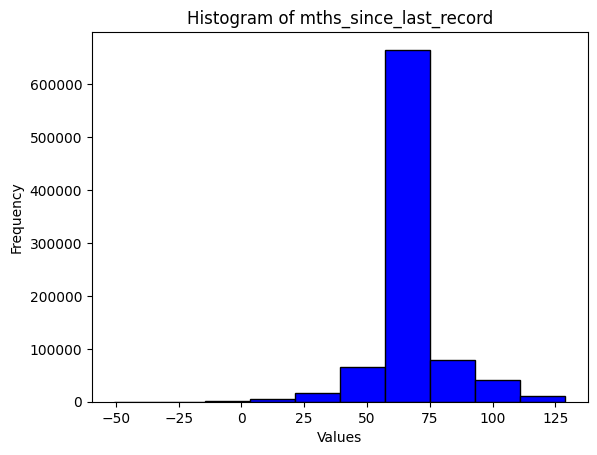

<Figure size 640x480 with 0 Axes>

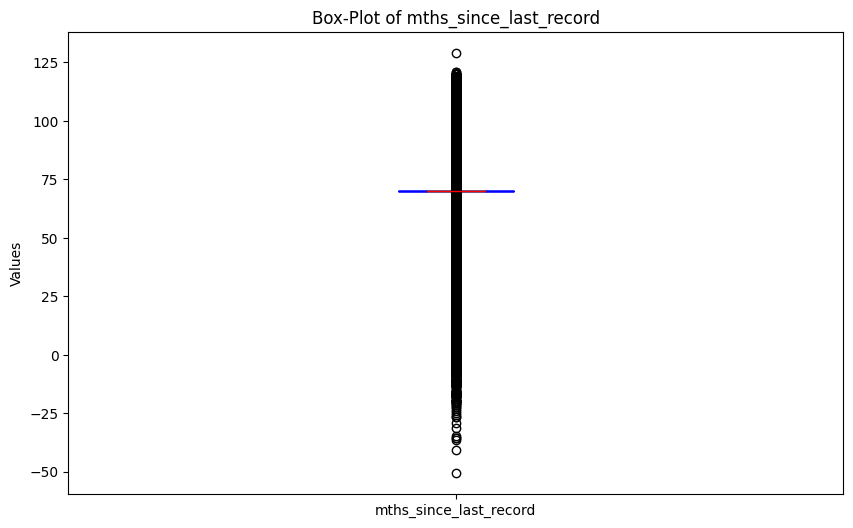

<Figure size 640x480 with 0 Axes>

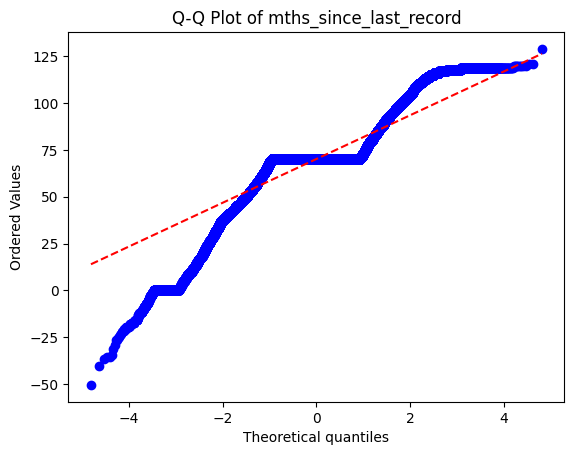

<Figure size 640x480 with 0 Axes>

In [556]:
# Evaluate the distribution of the variable 'mths_since_last_record' after Iterative Imputation [interest_rate_df_1]
mths_since_last_record_stats_1 = statistical_analysis(interest_rate_df_1['mths_since_last_record'],column_name = 'mths_since_last_record',
                                                    data = interest_rate_df_1,n = 10)

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 886868.
  res = hypotest_fun_out(*samples, **kwds)


Mean of mths_since_last_major_derog: 42.55672091098513
Median of mths_since_last_major_derog: 42.55672091098514
Minimum of mths_since_last_major_derog: -3.7923865309788454
Maximum of mths_since_last_major_derog: 188.0
Variance of mths_since_last_major_derog: 176.42245119093766
Std_Dev of mths_since_last_major_derog: 13.282411347000878
Data Type of mths_since_last_major_derog: float64
Null Vals of mths_since_last_major_derog: 0
Prop of Null Vals (%) of mths_since_last_major_derog: 0.0
Skewness of mths_since_last_major_derog: 0.5558426993104938
Kurtosis of mths_since_last_major_derog: 8.074021102139625
Shapiro-Wilk Test for mths_since_last_major_derog:Statistics = 0.7523464284960897,p-value = 1.6333074602688006e-183


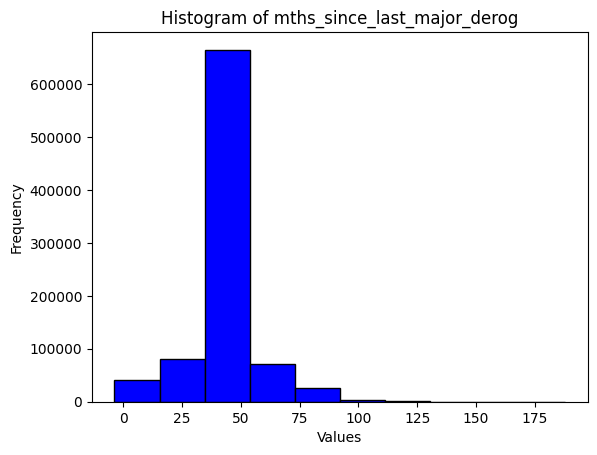

<Figure size 640x480 with 0 Axes>

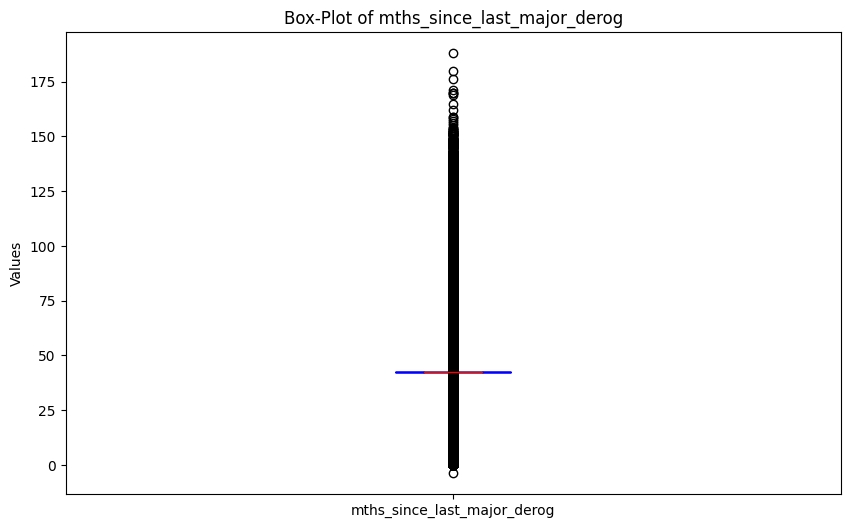

<Figure size 640x480 with 0 Axes>

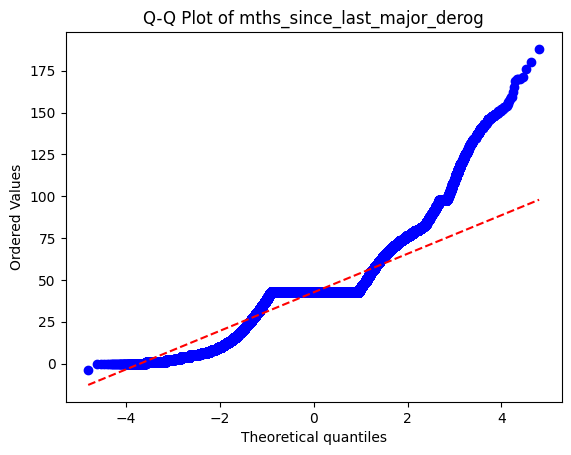

<Figure size 640x480 with 0 Axes>

In [557]:
# Evaluate the distribution of the variable 'mths_since_last_major_derog' after Iterative Imputation [interest_rate_df_1]
mths_since_last_major_derog_stats_1 = statistical_analysis(interest_rate_df_1['mths_since_last_major_derog'],column_name = 'mths_since_last_major_derog',
                                                    data = interest_rate_df_1,n = 10)

##### Method B : MICE Imputer with Bayesian Ridge Estimator, Data Frame = interest_rate_df_2
##### Variables of interest : mths_since_last_record and mths_since_last_major_derog

In [558]:
print('Missing Values mths_since_last_record:',interest_rate_df['mths_since_last_record'].isnull().sum()) # 749931 # Original Data Frame
print('Missing Values mths_since_last_major_derog:',interest_rate_df['mths_since_last_major_derog'].isnull().sum()) # 665312 # Original Data Frame

# Creating a copy of the data frame for preserving the original data frame (interest_rate_df)
interest_rate_df_2 = interest_rate_df.copy()
# print(interest_rate_df_2.columns)

# Define the columns for imputing with MICE Imputer (using Bayesian Ridge estimator)
columns_to_impute_2 = ['mths_since_last_record','mths_since_last_major_derog']

mice_function = IterativeImputer(estimator = BayesianRidge(),random_state = 42,max_iter = 10,n_nearest_features = None,initial_strategy = 'mean')
interest_rate_df_2[columns_to_impute_2] = mice_function.fit_transform(interest_rate_df_2[columns_to_impute_2])

print('Missing Values mths_since_last_record [Mice Imputer Method]:',interest_rate_df_2['mths_since_last_record'].isnull().sum()) # 0 Successfully imputed null values.
print('Missing Values mths_since_last_major_derog [Mice Imputer Method]:',interest_rate_df_2['mths_since_last_major_derog'].isnull().sum()) # 0 Sucessfully imputed null values.

Missing Values mths_since_last_record: 749931
Missing Values mths_since_last_major_derog: 665312
Missing Values mths_since_last_record [Mice Imputer Method]: 0
Missing Values mths_since_last_major_derog [Mice Imputer Method]: 0


Mean of mths_since_last_record: 70.16688324559482
Median of mths_since_last_record: 70.16688324559479
Minimum of mths_since_last_record: -50.57350664848363
Maximum of mths_since_last_record: 129.0
Variance of mths_since_last_record: 185.82945507052594
Std_Dev of mths_since_last_record: 13.631927782618494
Data Type of mths_since_last_record: float64
Null Vals of mths_since_last_record: 0
Prop of Null Vals (%) of mths_since_last_record: 0.0
Skewness of mths_since_last_record: -0.3996410571384052
Kurtosis of mths_since_last_record: 8.453747919483655
Shapiro-Wilk Test for mths_since_last_record:Statistics = 0.7380656972785931,p-value = 1.6157462059068384e-185


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 886868.
  res = hypotest_fun_out(*samples, **kwds)


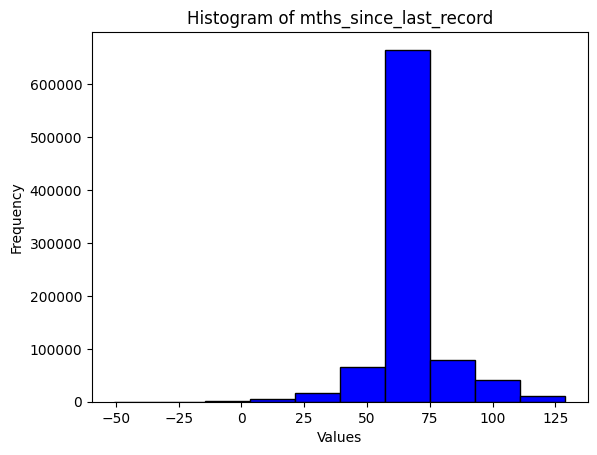

<Figure size 640x480 with 0 Axes>

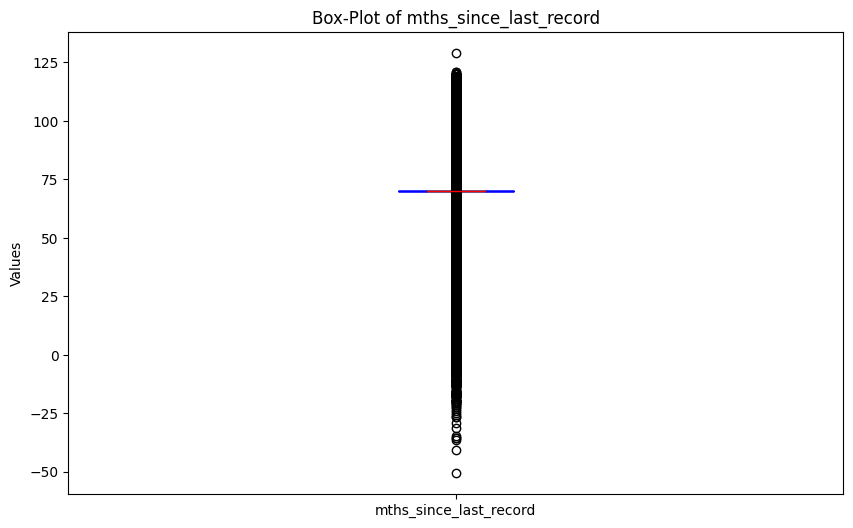

<Figure size 640x480 with 0 Axes>

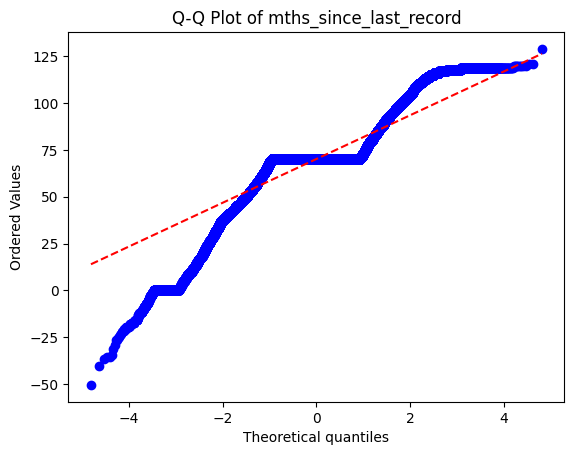

<Figure size 640x480 with 0 Axes>

In [559]:
# Evaluate the distribution of the variable 'mths_since_last_record' after MICE Imputation [interest_rate_df_2]
mths_since_last_record_stats_2 = statistical_analysis(interest_rate_df_2['mths_since_last_record'],
                                                    column_name = 'mths_since_last_record',data = interest_rate_df_2,n = 10)

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 886868.
  res = hypotest_fun_out(*samples, **kwds)


Mean of mths_since_last_major_derog: 42.55672091098513
Median of mths_since_last_major_derog: 42.55672091098514
Minimum of mths_since_last_major_derog: -3.7923865309788454
Maximum of mths_since_last_major_derog: 188.0
Variance of mths_since_last_major_derog: 176.42245119093766
Std_Dev of mths_since_last_major_derog: 13.282411347000878
Data Type of mths_since_last_major_derog: float64
Null Vals of mths_since_last_major_derog: 0
Prop of Null Vals (%) of mths_since_last_major_derog: 0.0
Skewness of mths_since_last_major_derog: 0.5558426993104938
Kurtosis of mths_since_last_major_derog: 8.074021102139625
Shapiro-Wilk Test for mths_since_last_major_derog:Statistics = 0.7523464284960897,p-value = 1.6333074602688006e-183


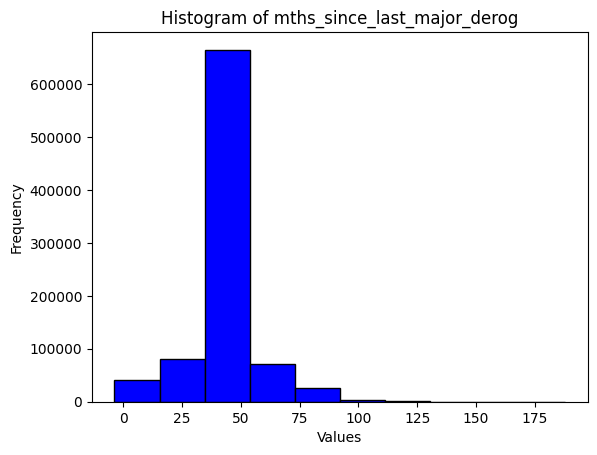

<Figure size 640x480 with 0 Axes>

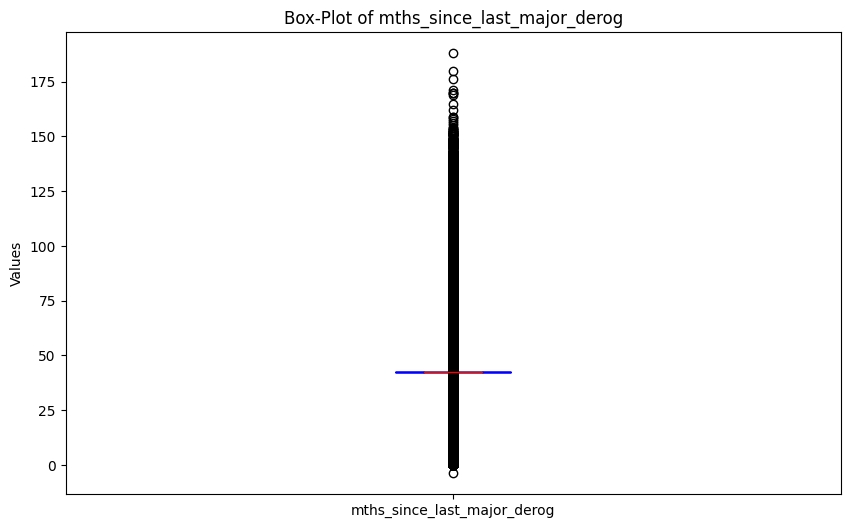

<Figure size 640x480 with 0 Axes>

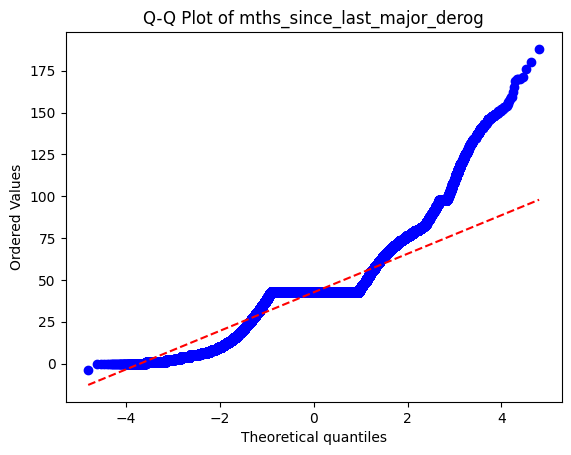

<Figure size 640x480 with 0 Axes>

In [560]:
# Evaluate the distribution of the variable 'mths_since_last_major_derog' after MICE Imputation [interest_rate_df_2]
mths_since_last_major_derog_stats_2 = statistical_analysis(interest_rate_df_2['mths_since_last_major_derog'],
                                                         column_name = 'mths_since_last_major_derog',data = interest_rate_df_2,n = 10)

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


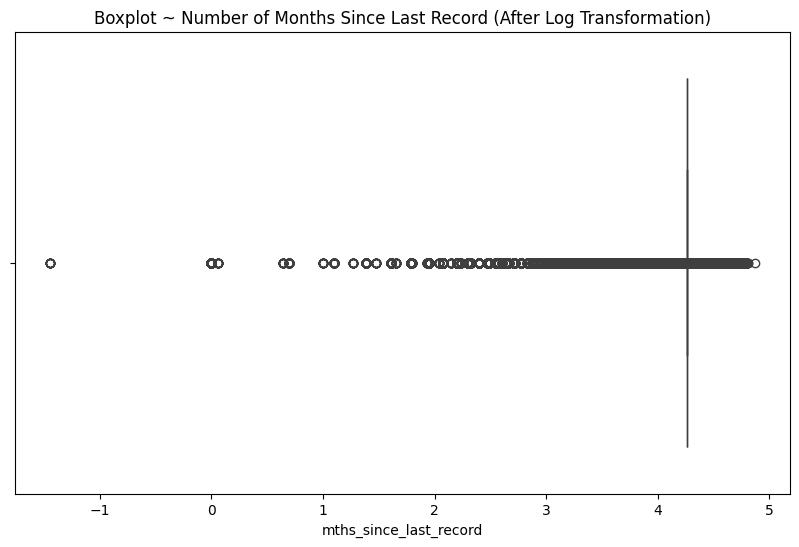

<Figure size 640x480 with 0 Axes>

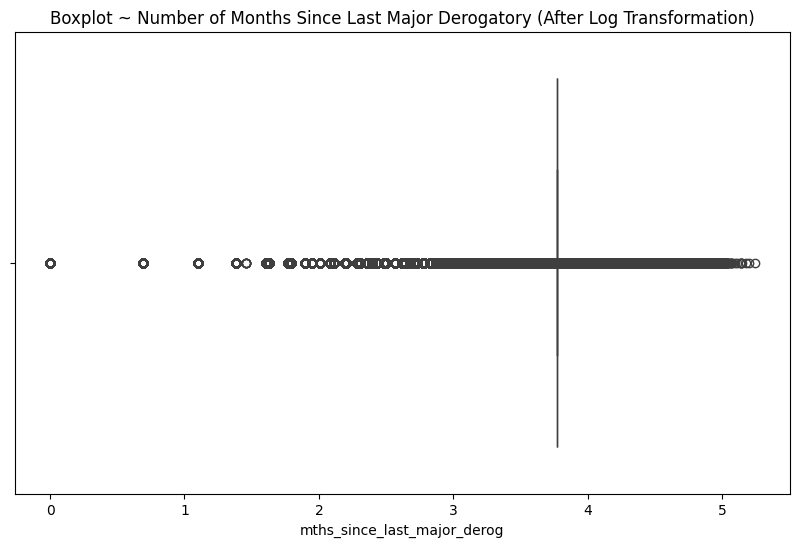

<Figure size 640x480 with 0 Axes>

In [561]:
# Inpsecting whether Log Transformation can reduce the impact of outliers [interest_rate_df_2]
interest_rate_df_2['mths_since_last_record'] = np.log1p(interest_rate_df_2['mths_since_last_record'])
interest_rate_df_2['mths_since_last_major_derog'] = np.log1p(interest_rate_df_2['mths_since_last_major_derog'])

# Boxplot after MICE Imputation and Log Transformation for handling outliers [interest_rate_df_2]
plt.figure(figsize=(10, 6))
sns.boxplot(x = interest_rate_df_2['mths_since_last_record'])
plt.title('Boxplot ~ Number of Months Since Last Record (After Log Transformation)')
plt.show()
plt.clf()

plt.figure(figsize=(10, 6))
sns.boxplot(x = interest_rate_df_2['mths_since_last_major_derog'])
plt.title('Boxplot ~ Number of Months Since Last Major Derogatory (After Log Transformation)')
plt.show()
plt.clf()

# The effect of outliers have been reduced sligtly and the distribution looks slightly spread out as compared to post MICE imputation,
# however, the presence of signficant outliers could affect the models accuracy and interpretability.

In [562]:
# Strategy : drop the columns with null values (Greater than 50% and less than 90%)

# Numerical Variables
# mths_since_last_record has 84.56% missing values.
# mths_since_last_major_derog has 75.02% missing values.
# mths_since_last_delinq has 51.20% missing values.

# After careful considertaion it was observered that the imputation after trial and error of multiple methods led to signficant number of outliers and
# change in the distribution of the variable (increase in kurtosis the transition from platy-kurtic (thinner-tails) distribution to lepto-kurtic
# (fatter-tails) distribution indicated that the distribution might be susceptiple to extreme events or sensitive to outliers). Neither Winsorization or
# Log-normal transformation could signficantly reduce the impact of outliers. A grouping based imputation (median) could not be computed as there were far
# too many groups that had missing values for a median to be computed for specific groups. Dropping the columns (variables) makes the intended model less
# impacted by noise that might be introduced by extensive imputation.

In [563]:
print(interest_rate_df.shape) # (886868, 58)
print(interest_rate_df.columns)

columns_to_drop = ['mths_since_last_record','mths_since_last_major_derog','mths_since_last_delinq']
interest_rate_df = interest_rate_df.drop(columns = columns_to_drop)
print(interest_rate_df.shape) # Successfully dropped the columns # (886868, 55)

(886868, 58)
Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'verification_status_joint', 'acc_now_delinq', 'tot_c

##### 2.5 Examining the proportion of missing values greater than 5% and less than 50%

In [564]:
# display(numerical_null_sorted_df)
# Proportion of null values greater than 5% and less than 50%
numerical_null_5_50 = numerical_null_sorted_df[(numerical_null_sorted_df['Percentage of Null Values (%)']>5) &
 (numerical_null_sorted_df['Percentage of Null Values (%)']<50)]
display(numerical_null_5_50)

# Lets examine the variables and data types for each of the variables
# print(interest_rate_df['total_rev_hi_lim'].nunique()) # 21249

# Variable Description :
# total_rev_hi_lim --> Total number of credit available for revolving accounts (eg. Credit Cards).
# tot_cur_bal --> Total current balance on all accounts.
# tot_coll_amt --> Total amount sent to collections because it was not paid on time.

# total_rev_hi_lim_stats = statistical_analysis(interest_rate_df['total_rev_hi_lim'],column_name = 'total_rev_hi_lim',
#                                                     data = interest_rate_df,n = 10)
print(np.max(interest_rate_df['total_rev_hi_lim'])) # 9999999.0
print(np.min(interest_rate_df['total_rev_hi_lim'])) # 0.0

total_rev_hi_lim_null = interest_rate_df[interest_rate_df['total_rev_hi_lim'].isnull()]
display(total_rev_hi_lim_null.head(10))
display(total_rev_hi_lim_null.head(10))

# Assumption :
# It seems that there is a pattern of missingness among the three variables and this might be due to the fact that this data has not been recorded for
# certain borrowers or this data is not available for specific reasons.

# Strategy : Drop the rows where the values are null for one of the variables and then inspect the null values for all the three variables for checking
# if the values have been dropped since they could be inter-related.

columns_to_inspect = ['total_rev_hi_lim', 'tot_cur_bal', 'tot_coll_amt']
print(interest_rate_df.shape)
interest_rate_df = interest_rate_df.dropna(subset = 'total_rev_hi_lim')
print(interest_rate_df.shape)
print(interest_rate_df[columns_to_inspect].isnull().sum())
# It can be observed that after removing the missing values from one column, it has removed missing values from the other 2 columns as well.

,Percentage of Null Values (%)
total_rev_hi_lim,7.919502
tot_cur_bal,7.919502
tot_coll_amt,7.919502


9999999.0
0.0


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,Jan-2016,0.0,1.0,INDIVIDUAL,NaN,0.0,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,Sep-2013,0.0,1.0,INDIVIDUAL,NaN,0.0,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,Jan-2016,0.0,1.0,INDIVIDUAL,NaN,0.0,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,Jan-2015,0.0,1.0,INDIVIDUAL,NaN,0.0,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,NaN,0.0,NaN,NaN,NaN
5,1075269,1311441,5000.0,5000.0,5000.0,36 months,7.90,156.46,A,A4,...,NaN,Sep-2015,0.0,1.0,INDIVIDUAL,NaN,0.0,NaN,NaN,NaN
6,1069639,1304742,7000.0,7000.0,7000.0,60 months,15.96,170.08,C,C5,...,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,NaN,0.0,NaN,NaN,NaN
7,1072053,1288686,3000.0,3000.0,3000.0,36 months,18.64,109.43,E,E1,...,NaN,Dec-2014,0.0,1.0,INDIVIDUAL,NaN,0.0,NaN,NaN,NaN
8,1071795,1306957,5600.0,5600.0,5600.0,60 months,21.28,152.39,F,F2,...,NaN,Aug-2012,0.0,1.0,INDIVIDUAL,NaN,0.0,NaN,NaN,NaN
9,1071570,1306721,5375.0,5375.0,5350.0,60 months,12.69,121.45,B,B5,...,NaN,Mar-2013,0.0,1.0,INDIVIDUAL,NaN,0.0,NaN,NaN,NaN


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,Jan-2016,0.0,1.0,INDIVIDUAL,NaN,0.0,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,Sep-2013,0.0,1.0,INDIVIDUAL,NaN,0.0,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,Jan-2016,0.0,1.0,INDIVIDUAL,NaN,0.0,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,Jan-2015,0.0,1.0,INDIVIDUAL,NaN,0.0,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,NaN,0.0,NaN,NaN,NaN
5,1075269,1311441,5000.0,5000.0,5000.0,36 months,7.90,156.46,A,A4,...,NaN,Sep-2015,0.0,1.0,INDIVIDUAL,NaN,0.0,NaN,NaN,NaN
6,1069639,1304742,7000.0,7000.0,7000.0,60 months,15.96,170.08,C,C5,...,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,NaN,0.0,NaN,NaN,NaN
7,1072053,1288686,3000.0,3000.0,3000.0,36 months,18.64,109.43,E,E1,...,NaN,Dec-2014,0.0,1.0,INDIVIDUAL,NaN,0.0,NaN,NaN,NaN
8,1071795,1306957,5600.0,5600.0,5600.0,60 months,21.28,152.39,F,F2,...,NaN,Aug-2012,0.0,1.0,INDIVIDUAL,NaN,0.0,NaN,NaN,NaN
9,1071570,1306721,5375.0,5375.0,5350.0,60 months,12.69,121.45,B,B5,...,NaN,Mar-2013,0.0,1.0,INDIVIDUAL,NaN,0.0,NaN,NaN,NaN


(886868, 55)
(816592, 55)
total_rev_hi_lim    0
tot_cur_bal         0
tot_coll_amt        0
dtype: int64


##### 2.6 Inspect the null values for missing values that is less than 5%

In [565]:
numerical_null_less_5 = numerical_null_sorted_df[(numerical_null_sorted_df['Percentage of Null Values (%)']<5) &
                                                 (numerical_null_sorted_df['Percentage of Null Values (%)']>0)]
display(numerical_null_less_5)

# Variables that have less than 5% missing values
numerical_null_less_5_vars = ['revol_util','annual_inc','collections_12_mths_ex_med','total_acc','delinq_2yrs','pub_rec','open_acc',
                              'acc_now_delinq','inq_last_6mths']

,Percentage of Null Values (%)
revol_util,0.056571
collections_12_mths_ex_med,0.016340
total_acc,0.003268
delinq_2yrs,0.003268
pub_rec,0.003268
open_acc,0.003268
acc_now_delinq,0.003268
inq_last_6mths,0.003268
annual_inc,0.000451


In [566]:
# Description of Variables (Missing/Null Values less than 5%)
# revol_util --> The percentage of revolving credit that the borrower is using.
# annual_inc --> The annual income of the borrower.
# collections_12_mths_ex_med --> The number of times that the borrower had unpaid debts that were sent to collections (excluding medical bills).
# total_acc --> The total number of credit accounts of the borrower (credit cards, loans etc.)
# delinq_2yrs --> The number of times that the borrower has been late on a payment for more than 30 days over the last 2 years.
# pub_rec --> The number of negative public records on the borrowers credit report (bankruptcies or tax liens).
# open_acc --> The number of credit accounts that the borrower has currently open.
# acc_now_delinq --> The number of credit accounts that have overdue payments.
# inq_last_6mths --> Number of times that the lenders have checked the borrowers credit report in the last 6 months (not inclusive of auto/mortgage inq.)

##### 2.6.1 Handling continuous variables - missing value proportion less than 5%

In [567]:
# Variables that have less than 5% missing values (further inspection)
for i in numerical_null_less_5_vars:
  print(i,interest_rate_df[i].unique()) # Examine the unique values for each variable.

# The variables ('revol_util') and ('annual_inc') are continuous variables while the remaining variables are discrete.

# Lets examine the distribution of the continuous variables and then check the frequency of the discrete variables.
continuous_variables_less_5 = ['revol_util','annual_inc']
discrete_variables_less_5 = ['collections_12_mths_ex_med','total_acc','delinq_2yrs','pub_rec','open_acc','acc_now_delinq','inq_last_6mths']

display(interest_rate_df[continuous_variables_less_5].describe(include = 'all')) # Examine the descriptive statistics of the variables.

# Continuous Variables (Stats)
for i in continuous_variables_less_5:
  print(i)
  print('Mean:',np.nanmean(interest_rate_df[i]))
  print('Median:',np.nanmedian(interest_rate_df[i]))
  print('Max:',np.max(interest_rate_df[i]))
  print('Min',np.min(interest_rate_df[i]))

# revol_util
# Mean: 55.31169771051848
# Median: 56.1

# annual_inc
# Mean: 75566.90180972872
# Median: 65000.0

# Strategy : The median is slightly greater than the mean the percentage of revolving credit indicating a slightly negatively skewed distribtion, however
# the mean is quiet signficantly greater than the median for yearly annual income of borrowers indicating a positively skewed distribution. Since the
# percentage of null values for both the vairables is less than 5% and it appears to have relative skewness in the distribution a strategy that could
# be adopted is the global median since median is not affected by skewness and the presence of extreme values.

print(interest_rate_df[continuous_variables_less_5].isnull().sum())
interest_rate_df[continuous_variables_less_5] = interest_rate_df[continuous_variables_less_5].apply(global_median)
print(interest_rate_df[continuous_variables_less_5].isnull().sum())

revol_util [ 61.2  52.8  21.6 ... 123.3 121.4 184.6]
annual_inc [ 55000.  26000. 105000. ...  76584.  46759.  63078.]
collections_12_mths_ex_med [ 0.  1.  2.  4.  3.  6. 16. 20.  5.  7. 10. 14.]
total_acc [ 27.  28.  22.  32.  29.  19.  14.   5.  26.  30.  31.  24.  12.  39.
  16.  17.  18.   8.  41.  36.  10.  49.  35.  51.  43.  13.  20.  44.
  37.  33.  23.  25.  56.  52.  38.  21.  48.  60.  34.  40.   9.  53.
  45.  11.  15.  50.  63.  46.  54.   7.  42.   4.  47.  59.   6.  58.
  57.  61.  55.  65.  62.   3.   2. 105.  83.  64.  71.  66.  68.  69.
  67.  80.  84.  70.  72.  76.  98.  79.  88.  75.  78.  82.  74.  77.
  91.  81.  73.  86.  93.  92.  96.  87. 101. 150.  95.  85. 156.  89.
 106.  97.  90. 119. 124. 100.  99.  94. 121. 102. 117. 116. 118. 111.
 127. 112. 125. 110. 109. 135. 104. 151. 130. 107. 113. 169. 140. 146.
 129. 126. 137. 103. 138. 162. 114. 108.]
delinq_2yrs [ 0.  1.  2.  6.  4.  3.  5.  7.  8.  9. 15. 11. 13. 10. 12. 17. 18. 29.
 24. 14. 21. 22. 19. 16. 30. 

,revol_util,annual_inc
count,816211.000000,8.165920e+05
mean,55.311698,7.556690e+04
std,23.489457,6.533312e+04
min,0.000000,3.000000e+03
25%,38.100000,4.600000e+04
50%,56.100000,6.500000e+04
75%,73.500000,9.000000e+04
max,892.300000,9.500000e+06


revol_util
Mean: 55.31169771051848
Median: 56.1
Max: 892.3
Min 0.0
annual_inc
Mean: 75566.90180972872
Median: 65000.0
Max: 9500000.0
Min 3000.0
revol_util    381
annual_inc      0
dtype: int64
revol_util    0
annual_inc    0
dtype: int64


##### 2.6.2 Handling discrete variables - missing value proportion less than 5%

In [568]:
# Discrete Variables (Stats)
# for i in discrete_variables_less_5:
#   print(interest_rate_df[i].value_counts()) # Compute the counts of discrete numerical variables

# Strategy : Imputing missing values with the mode for variables like collections_12_mths_ex_med, delinq_2yrs, pub_rec, acc_now_delinq, and inq_last_6mths
# is a practical approach given their discrete and often sparse nature. These variables typically represent counts of specific events, such as
# delinquencies or credit inquiries, where a zero or another specific value is frequently the most common occurrence. By filling in missing values with
# the mode, we preserve the distribution's natural sparsity and avoid skewing the data with less representative mean or median values. This method ensures
# that the imputation process does not introduce significant bias, retains the interpretability of the dataset, and maintains the variables' inherent
# characteristics, thereby supporting more accurate and meaningful downstream analyses. [Rewrite]

print(interest_rate_df[discrete_variables_less_5].isnull().sum())
interest_rate_df[discrete_variables_less_5] = interest_rate_df[discrete_variables_less_5].apply(global_mode)
print(interest_rate_df[discrete_variables_less_5].isnull().sum())

num_cols_1 = interest_rate_df.select_dtypes(include = ['float64','int64']).columns
cat_cols_1 = interest_rate_df.select_dtypes(include = ['object']).columns

print(interest_rate_df[num_cols_1].isnull().sum())
print(interest_rate_df[cat_cols_1].isnull().sum())
print(interest_rate_df.shape)

collections_12_mths_ex_med    0
total_acc                     0
delinq_2yrs                   0
pub_rec                       0
open_acc                      0
acc_now_delinq                0
inq_last_6mths                0
dtype: int64
collections_12_mths_ex_med    0
total_acc                     0
delinq_2yrs                   0
pub_rec                       0
open_acc                      0
acc_now_delinq                0
inq_last_6mths                0
dtype: int64
id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
int_rate                      0
installment                   0
annual_inc                    0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
out_prncp     

##### 3.0 Categorical Variable Inspection (Distribution, Missing Values)

##### 3.1 Joint status verification variable

In [569]:
# Examine the categroical variables that have null values and inspect the proportion of null values
categorical_null_percentage_df = pd.DataFrame({'Percentage of Null Values (%)':interest_rate_df[cat_cols_1].isnull().sum()/len(interest_rate_df)*100})
categorical_null_sorted_df = categorical_null_percentage_df.sort_values(by = 'Percentage of Null Values (%)',ascending = False)
# display(categorical_null_sorted_df)
categorical_null_sorted_df_greater_zero = categorical_null_sorted_df[categorical_null_sorted_df['Percentage of Null Values (%)']>0]
display(categorical_null_sorted_df_greater_zero)

# Since we have subsetted the data for individual loan applications thedre would be no data that is pertaining to the verification_status_joint column and therefore this variable can be excluded from
# our analysis.

print(interest_rate_df.shape) # (816592, 55)
interest_rate_df = interest_rate_df.drop(columns = 'verification_status_joint')
print(interest_rate_df.shape)

,Percentage of Null Values (%)
verification_status_joint,100.000000
desc,90.240536
next_pymnt_d,23.177058
emp_title,5.763343
emp_length,5.229417
last_pymnt_d,2.131664
title,0.016042
last_credit_pull_d,0.006001


(816592, 55)
(816592, 54)


##### 3.2 Description variable

In [570]:
# The next step is to examine the description column and inspect null values.
# Since there are a large proportion of null values approximately 90.241%, this column would also be dropped. However its a good practise before dropping if there is any information that could be
# gained from the variable.

# Examine the Description Variable (The description of the loan given by the borrower)

pd.reset_option('display.max_columns')
pd.reset_option('display.max_colwidth')
pd.reset_option('display.width')

description_null_df = interest_rate_df[interest_rate_df['desc'].isnull()]
# display(description_null_df.head())
description_not_null_df = interest_rate_df[interest_rate_df['desc'].notnull()]
display(description_not_null_df.head())

print(len(description_not_null_df)) # 79695
print(description_not_null_df['desc'].nunique()) # 78441
print(description_not_null_df['desc'].unique())

# Upon inspecting the csv data it was found that the descriptions provided by the borrowers signficantly varied and the possibility of implementing (NLP) techqniques is limited. The proportion
# of 90.241% of missing values also is a challenge as each an every borrower would describe the intented loan purpose differently imputation or predicting the loan description would not be ideal.
# This is similar to the scenario of survey responses where some consumers would like to disclose details about the intended purpose and others would not. Therefore a suitable strategy to deal
# with the description variable would be drop the column and infer the maximum information about loan interest rates from the other variables.

print(interest_rate_df.shape)
interest_rate_df = interest_rate_df.drop(columns = 'desc')
print(interest_rate_df.shape)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
42535,10149342,12000897,27050.0,27050.0,27050.0,36 months,10.99,885.46,B,B2,...,885.46,Feb-2016,Dec-2015,0.0,1.0,INDIVIDUAL,0.0,0.0,114834.0,59900.0
42536,10159584,12011200,9750.0,9750.0,9750.0,36 months,13.98,333.14,C,C1,...,333.14,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,14123.0,15100.0
42539,10159548,12011167,15000.0,15000.0,15000.0,36 months,8.90,476.30,A,A5,...,476.30,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,1514.0,272492.0,15400.0
42545,10148122,11999781,12000.0,12000.0,12000.0,36 months,7.62,373.94,A,A3,...,373.94,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,200314.0,23800.0
42547,10149526,12001069,27600.0,27600.0,27600.0,60 months,19.97,730.78,D,D5,...,730.78,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,241609.0,32600.0


79695
78441
['  Borrower added on 12/31/13 > Combining high interest credit cards to lower interest rate.<br>'
 "  Borrower added on 12/31/13 > While being in college there were expenses that I had to make. At the moment it seemed easy to buy thing on credit, but now that I'm full-time employee paying all credit cards seem impossible and it'll be great to make one consolidated payment to one firm with knowing its for a set amount of months.<br>"
 '  Borrower added on 12/31/13 > To pay Home Depot Credit Services card for my recent kitchen upgrade and pay off my Capital One credit card balance<br>'
 ... 'I need a lower interest loan to pay off my citifinancial loan.  '
 'I am looking for a loan to pay my credit cards off as well as making some very much needed auto repairs'
 'I am in my senior year of college in obtaining a bachelors degree in criminal justice.  I do not qualify for financial aid and have used all stafford loans available.  My tuition is approx. $1200 a month and I have 

##### 3.3 Categorising Date Variables (String)

##### 3.3.1 Next payment date

In [571]:
# Lets look at the next_pymnt_d, this is nothing but the next schedule payment of the borrower.
# Examine the next_pymnt_d variable

# print(interest_rate_df['next_pymnt_d'].nunique()) # 3 (Jan 2016, Feb 2016 and Mar 2016)
print(interest_rate_df['next_pymnt_d'].value_counts())
# print(interest_rate_df['next_pymnt_d'].isnull().sum()) # 189262
# print(interest_rate_df['next_pymnt_d'].dtype) # object

# Strategy : Since this a date, the data type is a string variable and the schedule payment cannot be predicted, we can use an imputation strategy to fill the missing values with 'Unknown'.

interest_rate_df['next_pymnt_d'] = interest_rate_df['next_pymnt_d'].fillna('Unknown')
print(interest_rate_df['next_pymnt_d'].isnull().sum())
print(interest_rate_df['next_pymnt_d'].value_counts())

next_pymnt_d
Feb-2016    549819
Jan-2016     77443
Mar-2016        68
Name: count, dtype: int64
0
next_pymnt_d
Feb-2016    549819
Unknown     189262
Jan-2016     77443
Mar-2016        68
Name: count, dtype: int64


##### 3.3.2 Last payment date

In [572]:
# A similar strategy can be adopted for last_pymnt_d and last_credit_pull_d but before any imputation or replacement is made lets examine the variables
print(interest_rate_df['last_pymnt_d'].nunique()) # 41 (The last payment for a loan was made on Jan 2016 and the earliest payment was done on Sep 2012)
print(interest_rate_df['last_pymnt_d'].unique())
print(interest_rate_df['last_pymnt_d'].dtypes) # object

interest_rate_df['last_pymnt_d'] = interest_rate_df['last_pymnt_d'].fillna('Unknown')
print(interest_rate_df['last_pymnt_d'].isnull().sum()) # Successfully imputed the null values with 'Unknown'
# print(interest_rate_df['last_pymnt_d'].value_counts())

41
['Jan-2016' 'Sep-2015' 'Jul-2014' 'Aug-2014' 'Dec-2015' 'Oct-2015'
 'May-2014' 'Sep-2014' 'May-2015' 'Aug-2015' 'Feb-2015' 'Jun-2014'
 'Nov-2014' 'Jan-2015' 'Feb-2014' 'Jan-2014' 'Mar-2014' 'Jun-2015'
 'Mar-2015' 'Nov-2015' 'Dec-2014' 'Oct-2014' 'Jul-2015' 'Apr-2014'
 'Apr-2015' nan 'Dec-2013' 'Nov-2013' 'Oct-2013' 'Sep-2013' 'Aug-2013'
 'Jul-2013' 'Jun-2013' 'May-2013' 'Apr-2013' 'Mar-2013' 'Feb-2013'
 'Jan-2013' 'Dec-2012' 'Nov-2012' 'Oct-2012' 'Sep-2012']
object
0


##### 3.3.3 Recent credit review date

In [573]:
# Inpsect the last_credit_pull_d variable (the most recent date that the Lending Club [LC] accessed and reviewed a borrower's credit report)
# Inpsecting similar characteristics for the last_credit_pull_d variable

print(interest_rate_df['last_credit_pull_d'].nunique()) # 42 (The most recent review done by the Lending Club was on Dec-2015 and the earliest check was done on Aug-2012)
print(interest_rate_df['last_credit_pull_d'].unique())
print(interest_rate_df['last_credit_pull_d'].dtypes) # object

interest_rate_df['last_credit_pull_d'] = interest_rate_df['last_credit_pull_d'].fillna('Unknown')
print(interest_rate_df['last_credit_pull_d'].isnull().sum()) # Successfully imputed the null values with 'Unknown'
# print(interest_rate_df['last_credit_pull_d'].value_counts())

42
['Dec-2015' 'Jan-2016' 'Aug-2014' 'Aug-2015' 'May-2014' 'Mar-2015'
 'Mar-2014' 'Jan-2014' 'May-2015' 'Oct-2015' 'Nov-2015' 'Oct-2014'
 'Apr-2014' 'Jul-2015' 'Apr-2015' 'Sep-2014' 'Sep-2015' 'Dec-2014'
 'Nov-2014' 'Jan-2015' 'Jun-2015' 'Jul-2014' 'Feb-2014' 'Jun-2014'
 'Feb-2015' 'Nov-2013' 'Dec-2013' nan 'Oct-2013' 'Sep-2013' 'Aug-2013'
 'Jul-2013' 'Jun-2013' 'May-2013' 'Apr-2013' 'Mar-2013' 'Feb-2013'
 'Jan-2013' 'Dec-2012' 'Nov-2012' 'Oct-2012' 'Sep-2012' 'Aug-2012']
object
0


##### 3.4 Employment length conversion and association with employment title

##### 3.4.1 Mapping and Chi-Squared Test

In [574]:
# Examine Employment Length and Title ('emp_length', 'title')

# emp_length --> The number of years that the borrower has been employed for (the longer the period of employment might indicate greater credit stability).
# title --> The name of the loan provided by the borrower.

# Insepct the emp_length variable

print(interest_rate_df['emp_length'].nunique())
print(interest_rate_df['emp_length'].unique()) # Categories of emp_length

# Convert the employment length to discrete numerical integers for efficient modelling and analysis.
# Strategy : Mapping of employment length to years represented by discrete numerical integers.

# Procedure : Create a dictionary that mapps the respective years to their numerical values. Inspect the data type of the variable and check if it requires conversion. Once this is done then impute
# the missing values with the mode.
# --> The employment length is an ordinal categorical variable (meaningful order) and using the mode or constant imputation (most frequent observation) is an effective strategy that helps in maintaing the
# distribution of the variable since it does not introduce any new values (maintains consistency with the characteristic of the categroical data).

employment_length_dict =  {'< 1 year': 0,
                             '1 year': 1,
                            '2 years': 2,
                            '3 years': 3,
                            '4 years': 4,
                            '5 years': 5,
                            '6 years': 6,
                            '7 years': 7,
                            '8 years': 8,
                            '9 years': 9,
                          '10+ years': 10}

interest_rate_df['emp_length'] = interest_rate_df['emp_length'].map(employment_length_dict)
print(interest_rate_df['emp_length'].dtype)
print(interest_rate_df['emp_length'].value_counts())

print(interest_rate_df['emp_length'].isnull().sum())

# Examine the association between employment length and employment title ('emp_length' and 'emp_title')
chi_sq_emp_length_title_df = interest_rate_df.dropna(subset = ['emp_length','emp_title'])
contingency_table_1 = pd.crosstab(chi_sq_emp_length_title_df['emp_length'],chi_sq_emp_length_title_df['emp_title'])
# display(contingency_table_1)
chi2,p,dof,expected = chi2_contingency(contingency_table_1)
# print(f'Chi-Squared Statistic for emp_length and emp_title: {chi2}')
# print(f'Chi-Squared Statistic (p-value) for emp_length and emp_title: {p}') # The extremeley low p-value suggest that there is an assoication between emp_length
                                                                            # and emp_title.
                                                                            # Chi-Squared Statistic for emp_length and emp_title: 2687643.5485398998
                                                                            # Chi-Squared Statistic (p-value) for emp_length and emp_title: 4.05317e-319

# Strategy for handling null values in emp_length (5.23%) --> group based imputation based on the employment title.
# Procedure --> Since there is approximately (5.76%) null values in emp_title we would use a a model based approach for imputing the missing values and then
# apply a group based approach for the emp_length variable. But before that we can quickly examine the 'title' variable and handle the missing values for that and
# then proceede with the proposed approach.

11
['10+ years' '1 year' '2 years' '4 years' '3 years' '7 years' '5 years'
 '6 years' '9 years' '8 years' '< 1 year' nan]
float64
emp_length
10.0    274506
2.0      71493
3.0      63575
0.0      63142
1.0      51533
5.0      49763
4.0      46645
7.0      41183
8.0      41162
6.0      38587
9.0      32300
Name: count, dtype: int64
42703


##### 3.4.2 Examine the employment title variable and independent variables for missing value prediction using Random Forest Classifier

In [575]:
print(interest_rate_df['emp_title'].nunique()) # 260040
print(interest_rate_df['emp_title'].unique()) # Indicates the profession of the borrower, this is provided by the borrower while applying for the loan.
print(interest_rate_df['emp_title'].value_counts())

print(interest_rate_df['emp_title'].isnull().sum())

# Model Based Approach --> Predict the missing values of the 'emp_title' variable using selected features.
# Features (that would be relevant for predicting the emp_title variable) --> 'annual_inc','home_ownership','grade','purpose'
# Lets conduct a pre-liminary examination of the independent variables before predicting the values and then imputing them back to the reference column.

columns_of_interest = ['annual_inc','home_ownership','grade','purpose']
for i in columns_of_interest:
  print(i)
  print(interest_rate_df[i].isnull().sum())
  print(interest_rate_df[i].dtype)

# All the independent variables are of (categorical) object types excluding the annual_inc variable.
# The target variable is a discrete categorical variable (types of profession).

260040
['Team Leadern Customer Ops & Systems' 'Medical Assistant'
 'MANAGER INFORMATION DELIVERY' ... 'machining Cell Lead'
 'KYC Business Analyst' 'Manager Hotel Operations Oasis ']
emp_title
Teacher                            13452
Manager                            11233
Registered Nurse                    5521
Owner                               5375
RN                                  5352
                                   ...  
Pasadena Conservatory of Music         1
NEW HAMPSHIRE HOSPITAL                 1
Abraham House                          1
NA World Services Inc                  1
Manager Hotel Operations Oasis         1
Name: count, Length: 260040, dtype: int64
47063
annual_inc
0
float64
home_ownership
0
object
grade
0
object
purpose
0
object


##### 3.4.3 Inspect and outlier handling of annual income variable (Prior to missing value model prediction)

,annual_inc
count,8.165920e+05
mean,7.556690e+04
std,6.533312e+04
min,3.000000e+03
25%,4.600000e+04
50%,6.500000e+04
75%,9.000000e+04
max,9.500000e+06


75566.90180972872
65000.0
3000.0
9500000.0


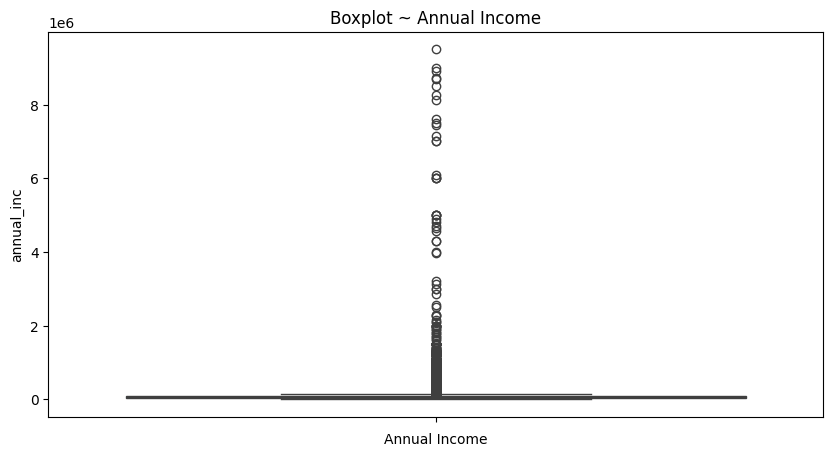

7449


,emp_title,annual_inc
697244,reg nurse,9500000.0
506740,registered nurse,9000000.0
684000,commercial driver,8900060.0
866973,Correctional Sgt.,8706582.0
490862,Customer Representative,8700000.0
...,...,...
367218,Chief Engineer,250700.0
787644,Provisioner,250568.0
852905,VP North America,250552.0
101084,Prudential Financial,250200.0


<Figure size 640x480 with 0 Axes>

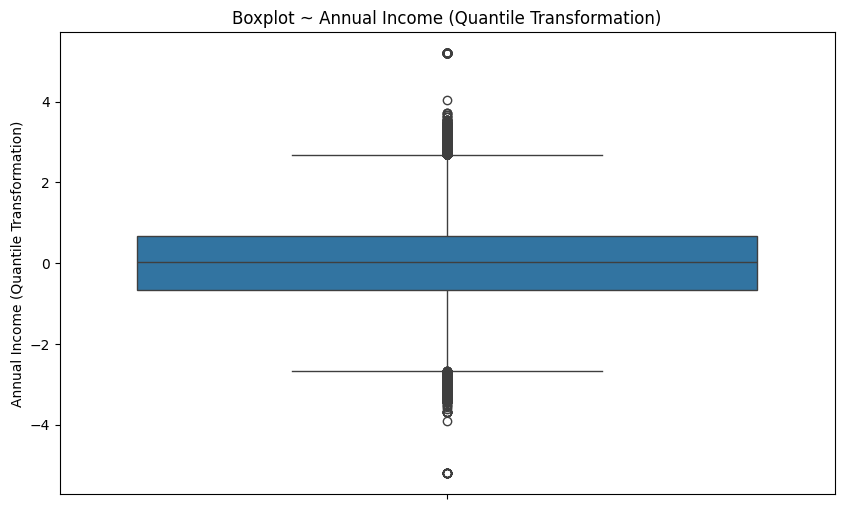

count    816592.000000
mean          0.003964
std           0.998040
min          -5.199338
25%          -0.667419
50%           0.021329
75%           0.675277
max           5.199338
Name: annual_inc_quantile, dtype: float64
(816592, 54)
(816592, 55)


<Figure size 640x480 with 0 Axes>

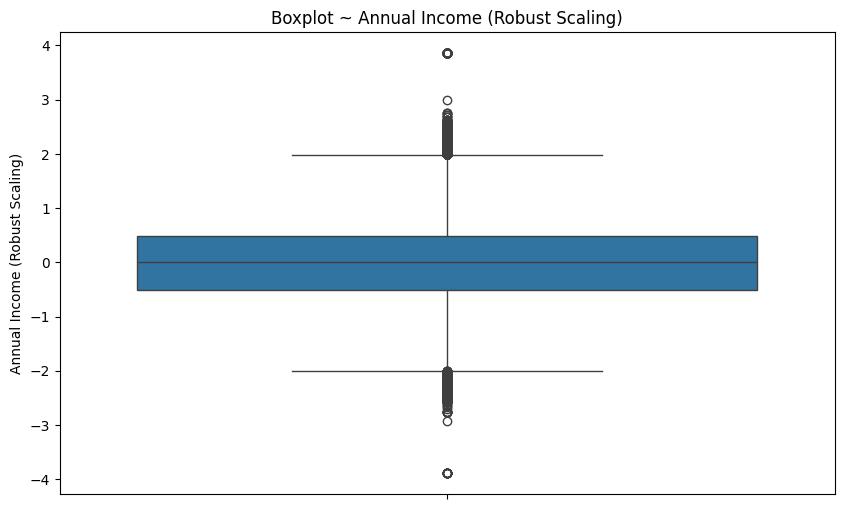

count    816592.000000
mean         -0.012933
std           0.743310
min          -3.888196
25%          -0.512959
50%           0.000000
75%           0.487041
max           3.856425
Name: annual_inc_robust, dtype: float64


<Figure size 640x480 with 0 Axes>

In [576]:
# Inspect the 'annual_inc' variable for outliers:
# We can examine the distribution through inspecting with numerical statistics and box-plots.
# Then we can either remove the outlier or through domain knowledge impute them with some constant values.

display(interest_rate_df['annual_inc'].describe(include = 'all'))

print(interest_rate_df['annual_inc'].mean()) # 75566.90180972872
print(interest_rate_df['annual_inc'].median()) # 65000.0
print(interest_rate_df['annual_inc'].min()) # 3000.0
print(interest_rate_df['annual_inc'].max()) # 9500000.0

plt.figure(figsize = (10, 5))
sns.boxplot(y = interest_rate_df['annual_inc'])
plt.title('Boxplot ~ Annual Income')
plt.xlabel('Annual Income')
plt.show()
plt.clf()

annual_inc_inspect = interest_rate_df[interest_rate_df['annual_inc']>250000]
# display(annual_inc_inspect.head())
print(len(annual_inc_inspect))
annual_inc_inspect_sorted = annual_inc_inspect.sort_values(by='annual_inc',ascending = False)
display(annual_inc_inspect_sorted[['emp_title', 'annual_inc']])

# print(interest_rate_df.shape) # (816592, 53)

# For reducing the impact of outliers in the annual_inc we can use Quantile Transformer
quantile_transformation_annual_inc = QuantileTransformer(output_distribution = 'normal',random_state = 42)
interest_rate_df['annual_inc_quantile'] = quantile_transformation_annual_inc.fit_transform(interest_rate_df[['annual_inc']])

# Display the transformed distribution
plt.figure(figsize = (10, 6))
sns.boxplot(y = interest_rate_df['annual_inc_quantile'])
plt.title('Boxplot ~ Annual Income (Quantile Transformation)')
plt.ylabel('Annual Income (Quantile Transformation)')
plt.show()
plt.clf()

# Inspect the distribution after quantile transformation
print(interest_rate_df['annual_inc_quantile'].describe())

# From the quantile transformation it can be observed that the distribution is spread between (-5 and 5) and from this it shows a possible categorisation
# of income distribution (lower, middle and higher income classes). With one predominant outlier at the higher income bracket and one at the lower income
# bracket. There are other outliers as well however they have been clustered into smaller groups (distribution) and this show that there are borrowers that
# earn both relatively higher and lower based on the their type of profession.

print(interest_rate_df.shape) # (816592, 54)

# Applying Robust Scaler to minimise the effect of signficant outliers in 'annual_inc' variable (uses the median and the IQR for scaling)
robust_scaler = RobustScaler()
interest_rate_df['annual_inc_robust'] = robust_scaler.fit_transform(interest_rate_df[['annual_inc_quantile']])
print(interest_rate_df.shape)

# Display the robust scaled annual_inc variable
plt.figure(figsize = (10, 6))
sns.boxplot(y = interest_rate_df['annual_inc_robust'])
plt.title('Boxplot ~ Annual Income (Robust Scaling)')
plt.ylabel('Annual Income (Robust Scaling)')
plt.show()
plt.clf()

# Inspect the distribution after robust scaling
print(interest_rate_df['annual_inc_robust'].describe())

##### 3.4.4 Predicting missing values for employment title using Random Forest Classifier

In [577]:
# Use a Random Forest Classifier for predicting the missing values in emp_title
# using the following features: 'annual_inc_quantile','home_ownership','grade','purpose'

# Let's create a copy of the data frame for testing the model and once the results are fine we can deploy it in the original data frame.
print(interest_rate_df.shape)

interest_rate_df_3 = interest_rate_df.copy()
print(interest_rate_df_3.shape)

# Create (2) data frames where emp_title has missing values and does not have missing values.
emp_title_not_null = interest_rate_df_3[interest_rate_df_3['emp_title'].notnull()]
print(len(emp_title_not_null))
emp_title_is_null = interest_rate_df_3[interest_rate_df_3['emp_title'].isnull()]
print(len(emp_title_is_null))

# Select the relevant features for predicting the missing values
features_list = ['annual_inc_quantile','home_ownership','grade','purpose']

# Apply One-Hot Encoding for the categorical features
emp_title_not_null_encoded_df = pd.get_dummies(emp_title_not_null[features_list],drop_first = True)
print(emp_title_not_null_encoded_df.shape)
emp_title_is_null_encoded_df = pd.get_dummies(emp_title_is_null[features_list],drop_first = True)
print(emp_title_is_null_encoded_df.shape)
emp_title_is_null_encoded_df = emp_title_is_null_encoded_df.reindex(columns = emp_title_not_null_encoded_df.columns,fill_value = 0)
print(emp_title_is_null_encoded_df.shape)

# For the target variable ('emp_title') we can apply 'frequency encoding'.
emp_title_frequency_mapping = interest_rate_df_3['emp_title'].value_counts().to_dict()
interest_rate_df_3['emp_title_encoded'] = interest_rate_df_3['emp_title'].map(emp_title_frequency_mapping)

# Define the X (independent variables) and y (target variable = 'emp_title_encoded')
X = emp_title_not_null_encoded_df
y = emp_title_not_null['emp_title'].map(emp_title_frequency_mapping)

# Train the Random Forest Classifier Model for predicting the missing values in the emp_title variable
emp_title_model = RandomForestClassifier(n_estimators = 50,max_depth = 10,random_state = 42)
emp_title_model.fit(X, y)

# Predict the missing values
X_emp_title_is_null = emp_title_is_null_encoded_df
predicted_emp_titles = emp_title_model.predict(X_emp_title_is_null)
interest_rate_df_3.loc[interest_rate_df_3['emp_title'].isnull(),'emp_title_encoded'] = predicted_emp_titles

# Reverse the encoded values back to the 'emp_title' variable and inspect the missing values
reverse_encoding_emp_title = {v: k for k, v in emp_title_frequency_mapping.items()}
interest_rate_df_3['emp_title'] = interest_rate_df_3['emp_title_encoded'].map(reverse_encoding_emp_title)
print(interest_rate_df_3['emp_title'].isnull().sum())
print(interest_rate_df_3.shape)

(816592, 55)
(816592, 55)
769529
47063
(769529, 25)
(47063, 23)
(47063, 25)
0
(816592, 56)


##### 3.4.5 Cross validation of the implemented Random Forest Classifier for employment title

In [578]:
# from sklearn.model_selection import cross_val_score, StratifiedKFold
# from sklearn.metrics import accuracy_score

# # Perform Cross-validation on the non-missing part of the data for assessing how well the the model predicts the 'emp_title' variable.
# skf = StratifiedKFold(n_splits = 5,shuffle = True,random_state = 42)
# cross_val_scores = cross_val_score(emp_title_model,X,y,cv = skf,scoring = 'accuracy')
# print(f'Cross-Validation Accuracy: {cross_val_scores.mean():.2f} ± {cross_val_scores.std():.2f}')

##### 3.4.6 Evaluation and method selection for employment title

In [579]:
# The chosen methodology for missing values in 'emp_title' variable.
# 1. A random forest classifier was deployed for predicting the features in the 'emp_title' variable.
# 2. There were 4 independent features that were used 'annual_inc_quantile','home_ownership','grade' and 'purpose'.
# 3. The random forest model successfully imputed the values to the emp_title variable.
# 4. A cross validation was used to the test how well the model predicts the 'emp_title' variable. The relatively low accuracy of 28% indicates potential bias
# and the significant variation in professional titles induces complexity in the imputation process.
# 5. Given that the 'emp_title' has approx. 5.76% missing values,it would be reasonable in dropping these rows.

print(interest_rate_df.shape) # (816592, 55)
print(interest_rate_df['emp_title'].isnull().sum()) # 47063
interest_rate_df = interest_rate_df.dropna(subset = ['emp_title'])
print(interest_rate_df['emp_title'].isnull().sum()) # Successfully dropped the missing values.
print(interest_rate_df.shape) # 769529, 55)

(816592, 55)
47063
0
(769529, 55)


##### 3.4.7 Group based and global mode imputation for employment length

In [580]:
# From the Chi-squared test between emp_length and emp_title it was observed that there was a signficant association between the 2 variables.
# We are going to apply a group based imputation for the emp_length variable using the emp_title using the mode. This will estimate the most frequent observation and impute the missing
# value with the mode of the specific group.
# Define a function for group based imputation using the mode.

print(interest_rate_df['emp_length'].isnull().sum()) # 310
interest_rate_df['emp_length'] = mode_grouping(interest_rate_df,'emp_title','emp_length') #
print(interest_rate_df['emp_length'].isnull().sum()) # 76

310
76


In [581]:
# Examine the emp_length variable and check if the global mode is a suitable method for addressing the remaining missing values.
print(interest_rate_df['emp_length'].value_counts(normalize = True))

# The most frequent observation for the emp_length would be 10.0 (greater than 10 years of experience) and as the proportion of values is signficantly greater than the other categroies
# in employment length, we can proceede with the global mode imputation for addressing the remaining (76) missing values.

interest_rate_df['emp_length'] = global_mode(interest_rate_df['emp_length'])
print(interest_rate_df['emp_length'].isnull().sum()) # 0 Successfully imputed the missing values with the global mode.
print(interest_rate_df['emp_length'].value_counts(normalize = True)) # The distribution is relatively consistent to the distribution prior to imputation.

emp_length
10.0    0.354167
2.0     0.092619
3.0     0.082136
0.0     0.081872
1.0     0.066868
5.0     0.064211
4.0     0.060223
8.0     0.053179
7.0     0.053127
6.0     0.049819
9.0     0.041778
Name: proportion, dtype: float64
0
emp_length
10.0    0.354231
2.0     0.092610
3.0     0.082128
0.0     0.081864
1.0     0.066862
5.0     0.064204
4.0     0.060217
8.0     0.053174
7.0     0.053122
6.0     0.049814
9.0     0.041774
Name: proportion, dtype: float64


##### 3.5 Title variable (Shorter version of the descriptions variable)

In [582]:
# Title --> The loan title provided by the borrower (A simplified version of description that outlines the purpose of the loan)
# print(interest_rate_df.shape)
print(interest_rate_df['title'].nunique())
print(interest_rate_df['title'].unique())
print(interest_rate_df['title'].value_counts())

title_null = interest_rate_df[interest_rate_df['title'].isnull()]
print(len(title_null)) # 0.016042% null values
# Strategy --> Since there are a large number of 'titles', a mode imputation can be done which would not signficantly alter the state of the distribution and since
# the missing proportion is relatively low this can be a reasonable and effective method for handling the missing values.

interest_rate_df['title'] = global_mode(interest_rate_df['title'])
print(interest_rate_df['title'].isnull().sum()) # Successfully imputed the values with the mode of the distribution.

36752
['Debt Consolidation' 'Debt Consilation' 'UNIVERSAL CARD' ... 'DebtC'
 'New Baby and New House (CC Consolidate)' 'Credit Card/Auto Repair']
title
Debt consolidation                        390159
Credit card refinancing                   153978
Home improvement                           36972
Other                                      29259
Major purchase                             11254
                                           ...  
Dealing with Debt                              1
Basement Bathroom Completion                   1
Tax relief                                     1
Steady performer: 20+year track record         1
Credit Card/Auto Repair                        1
Name: count, Length: 36752, dtype: int64
123
0


##### 3.6 Inspect the data frame after handling missing values

In [583]:
# Final inspection of null values across numerical and categorical variables
num_cols_2 = interest_rate_df.select_dtypes(include = ['float64','int64']).columns
cat_cols_2 = interest_rate_df.select_dtypes(include = ['object']).columns

print('Numerical Variables:',len(num_cols_2))
print('Categorical Variables:',len(cat_cols_2))

print(interest_rate_df[num_cols_2].isnull().sum())
print(interest_rate_df[cat_cols_2].isnull().sum())
print(interest_rate_df.shape) # (769529, 55)

Numerical Variables: 35
Categorical Variables: 20
id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
int_rate                      0
installment                   0
emp_length                    0
annual_inc                    0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
collection_recovery_fee       0
last_pymnt_amnt               0
collections_12_mths_ex_med    0
policy_code                   0
acc_now_delinq        

##### 4.0 Outlier Detection (Numerical Continuos Variables)

In [584]:
# Inspect the extreme values for the numerical variables before EDA and Data Modelling
# print(interest_rate_df[num_cols_2].info())
print(interest_rate_df[num_cols_2].nunique())
print(len(num_cols_2))

# Examine the outliers in the continuous numerical variables
# Preliminary Inspection :
# We can exclude the id and the member id as it represents the id's of the borrowers and each id is unique in
# nature.
# Exclude collections_12_mths_ex_med, policy_code and acc_now_delinq
# collections_12_mths_ex_med : The number of times that the borrower had unpaid debts reported not excluding
# medical bills.
# policy_code : This represents the type of policy for the loan product. There are only 2 values (1,2), where 1
# represents the policy code for a publicly available loan product and 2 represents a new, non-publicly available
# loan product.
# acc_now_delinq : The number of accounts where the borrower has outstanding payments.
# Rationale : The collections_12_mths_ex_med is a discrete variable and evaluating the outliers through the Inter-Quartile
# Range (IQR) method advaocates the requirement for numerical continuous variables. This is an event and there might be
# instances where there is no occurences of that event which equates to zero and additionally too many higher counts may be
# portrayed by the IQR as outliers which does not represent the true nature of the variable. Policy code is a nominal
# categorical variable (no specified order and each category represents a label).The acc_now_delinq is similar to the
# collections_12_mths_ex_med where it represents a discrete/count/event variable.

id                            769529
member_id                     769529
loan_amnt                       1361
funded_amnt                     1361
funded_amnt_inv                 1396
int_rate                         199
installment                    61841
emp_length                        11
annual_inc                     40195
dti                             4000
delinq_2yrs                       29
inq_last_6mths                     9
open_acc                          77
pub_rec                           32
revol_bal                      71231
revol_util                      1256
total_acc                        134
out_prncp                     231882
out_prncp_inv                 249015
total_pymnt                   423316
total_pymnt_inv               429330
total_rec_prncp               235998
total_rec_int                 289129
total_rec_late_fee              3328
recoveries                     14878
collection_recovery_fee        14878
last_pymnt_amnt               191811
c

##### 4.1 Strategy for dealing with outliers

In [585]:
# Assumption : The data (nuemrical continuous variable) does not follow a normal distribution.
# Examine the descriptive statistics of the numerical continuous variables.
# Inspect the mean, median, range (min,max), quantiles and standard deviation of the variable (5 number statistics).
# Using the outlier function, detect the regular outliers using a threshold of 1.5 and inspect for anomalies.
# Using the outlier function, detect the extreme outliers using a threshold of 3 and determine whether to exclude or retain the outliers.

##### 4.1.1 Inspect the list of variables that needs to be examined

In [586]:
# Let's create a list of variables that needs to be examined
columns_to_exclude = ['id','member_id','collections_12_mths_ex_med','policy_code','acc_now_delinq'] # Excluding variables that are not needed for outlier detection
num_cols_3 = np.setdiff1d(num_cols_2,columns_to_exclude)
print(num_cols_3)
print(len(num_cols_3))

# Define a function for inspecting the outliers in numerical continuous variables using Inter Quartile Range (IQR) method
# [Tukey's Fences]
# This creates a base for examining variables with outliers.
def numerical_outlier_detection(variable,data,k = 1.5):
    q1 = data[variable].quantile(0.25)
    q3 = data[variable].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - k * iqr
    upper_bound = q3 + k * iqr
    outliers = data[(data[variable] < lower_bound) | (data[variable] > upper_bound)]
    if not outliers.empty:
        print(variable)
    return outliers

# Examine the defined list for outlier inspection
for var in num_cols_3:
    numerical_outlier_detection(var,interest_rate_df) # This will return the variables that require further inspection of
                                                      # outliers. (25 variables for further inspection)

['annual_inc' 'annual_inc_quantile' 'annual_inc_robust'
 'collection_recovery_fee' 'delinq_2yrs' 'dti' 'emp_length' 'funded_amnt'
 'funded_amnt_inv' 'inq_last_6mths' 'installment' 'int_rate'
 'last_pymnt_amnt' 'loan_amnt' 'open_acc' 'out_prncp' 'out_prncp_inv'
 'pub_rec' 'recoveries' 'revol_bal' 'revol_util' 'tot_coll_amt'
 'tot_cur_bal' 'total_acc' 'total_pymnt' 'total_pymnt_inv' 'total_rec_int'
 'total_rec_late_fee' 'total_rec_prncp' 'total_rev_hi_lim']
30
annual_inc
annual_inc_quantile
annual_inc_robust
collection_recovery_fee
delinq_2yrs
inq_last_6mths
installment
int_rate
last_pymnt_amnt
open_acc
out_prncp
out_prncp_inv
pub_rec
recoveries
revol_bal
revol_util
tot_coll_amt
tot_cur_bal
total_acc
total_pymnt
total_pymnt_inv
total_rec_int
total_rec_late_fee
total_rec_prncp
total_rev_hi_lim


##### 4.1.2 Group the variables based on loan characteristics

In [587]:
# Lets examine outliers for each of the variables and since there is about 25 variables, group the vairables
# based on their characteristics.

# Income, Monthly Loan Payment, Loan Interest Rate and Principal (Owned by the borrower and to the investor)
loan_metrics = [
    'annual_inc',            # The borrower's yearly income.
    'installment',           # The monthly loan payment the borrower must make.
    'int_rate',              # The interest rate for the loan.
    'out_prncp',             # The remaining amount of the original loan (excluding interest and fees) that has not been paid.
    'out_prncp_inv'          # The remaining amount of the original loan owed to the investor.
]

# Past Credit History and Default (Borrower's Creditworthiness)
borrower_history = [
    'delinq_2yrs',           # The number of times the borrower missed payments in the last 2 years.
    'inq_last_6mths',        # The number of times someone checked the borrower's credit in the last 6 months.
    'pub_rec',               # The number of public records related to the borrower's financial issues (like bankruptcies).
    'recoveries',            # The amount of money recovered from the borrower after defaulting.
    'total_rec_late_fee'     # The total amount of late fees collected from the borrower.
]

# Payments Information (Payments [by the borrower and to the investor], Interest and Principal received from the Borrower)
payments_info = [
    'last_pymnt_amnt',       # The amount of the most recent payment made by the borrower.
    'total_pymnt',           # The total amount of payments made by the borrower.
    'total_pymnt_inv',       # The total amount of payments made to the investor.
    'total_rec_int',         # The total amount of interest received.
    'total_rec_prncp'        # The total amount of the original loan (principal) received back.
]

# Amount Owed and Used By Borrower (Credit Accounts, Collections, Balances and Credit Limits)
account_balances = [
    'revol_bal',             # The total amount owed on revolving credit accounts (like credit cards).
    'revol_util',            # The percentage of available revolving credit that is being used.
    'tot_coll_amt',          # The total amount that has been sent to collections.
    'tot_cur_bal',           # The total current balance on all accounts.
    'total_rev_hi_lim'       # The highest credit limit across all revolving accounts.
]

# Annual Income, Quantile Annual Income (Transformed Quantile), Robust Annual Income (Robust Scaling) and Collection Recovery Fee
quantitative_measures = [
    'annual_inc_quantile',   # A statistical measure showing where the borrower's income falls in comparison to others.
    'annual_inc_robust',     # A stable measure of the borrower's annual income, less affected by outliers.
    'collection_recovery_fee', # The fee charged for recovering the money from a borrower who defaulted.
]

# Miscellaneous Metrics (Credit Accounts and Active Credit Accounts)
miscellaneous_metrics = [
    'total_acc',             # The total number of credit accounts the borrower has.
    'open_acc',              # The number of currently active credit accounts.
]

##### 4.1.3 Function for outlier detection (threshold = 1.5) --> Regular Outliers

In [588]:
def outlier_detection_viz_1(df, variable_name, threshold=1.5):
    if variable_name not in df.columns:
        raise ValueError(f'The variable {variable_name} does not exist in the DataFrame')
    q1 = df[variable_name].quantile(0.25)  # Compute the 25th quantile of the distribution.
    q3 = df[variable_name].quantile(0.75)  # Compute the 75th quantile of the distribution.
    iqr = q3 - q1  # Computes the Interquartile Range i.e. as the difference between q3 and q1.
    lower_bound = q1 - threshold * iqr  # Computes the boundary for outliers below the lower quartile (q1).
    upper_bound = q3 + threshold * iqr  # Computes the boundary for outliers above the upper quartile (q3).
    outliers = df[(df[variable_name] < lower_bound) | (df[variable_name] > upper_bound)]  # Using indexing, returns the DataFrame that is constricted within the
                                                                                          # defined boundaries.
    num_outliers = outliers.shape[0]
    print(f'Total Regular Outliers in {variable_name}: {num_outliers}')
    display(outliers)  # Displays the outliers of the variable.

    # Displays a Box-plot of the variable
    plt.figure(figsize=(10, 6))
    sns.boxplot(y=df[variable_name])
    outlier_values = outliers[variable_name]
    plt.scatter([0]*len(outlier_values), outlier_values, color='darkblue', label='Outliers (1.5 IQR)')
    plt.title(f'Box Plot ~ {variable_name}')
    plt.xlabel(variable_name)
    plt.legend()
    plt.show()

    return outliers

##### 4.1.4 Function for outlier detection (threshold = 3) --> Extreme Outliers

In [589]:
def outlier_detection_viz_2(df, variable_name, threshold=3):
    if variable_name not in df.columns:
        raise ValueError(f'The variable {variable_name} does not exist in the DataFrame')
    q1 = df[variable_name].quantile(0.25)  # Compute the 25th quantile of the distribution.
    q3 = df[variable_name].quantile(0.75)  # Compute the 75th quantile of the distribution.
    iqr = q3 - q1  # Computes the Interquartile Range i.e. as the difference between q3 and q1.
    lower_bound = q1 - threshold * iqr  # Computes the boundary for outliers below the lower quartile (q1).
    upper_bound = q3 + threshold * iqr  # Computes the boundary for outliers above the upper quartile (q3).
    outliers = df[(df[variable_name] < lower_bound) | (df[variable_name] > upper_bound)]  # Using indexing, returns the DataFrame that is constricted within the
                                                                                          # defined boundaries.
    num_outliers = outliers.shape[0]
    print(f'Total Extreme Outliers in {variable_name}: {num_outliers}')
    display(outliers)  # Displays the outliers of the variable.

    # Displays a Box-plot of the variable
    plt.figure(figsize=(10, 6))
    sns.boxplot(y=df[variable_name])
    outlier_values = outliers[variable_name]
    plt.scatter([0]*len(outlier_values), outlier_values, color='red', label='Outliers (3 IQR)')
    plt.title(f'Box Plot ~ {variable_name}')
    plt.xlabel(variable_name)
    plt.legend()
    plt.show()

    return outliers, lower_bound, upper_bound

##### 4.2 Loan metrics (Outlier Detection)

In [590]:
# Examine the loan metric variables before outlier inspection.
print(interest_rate_df.shape) # (769529, 55)
print(loan_metrics)

(769529, 55)
['annual_inc', 'installment', 'int_rate', 'out_prncp', 'out_prncp_inv']


##### 4.2.1 Annual Income Variable

In [591]:
# Loan Metrics -- Variable 1 -- annual_inc

# Key Points :
# Inspect the annual_inc variable
# Review the corresponding quantile transformed and robust scaled variable (annual_inc_quantile, annual_inc_robust).

print(np.mean(interest_rate_df['annual_inc'])) # 76830.68761328037
print(np.median(interest_rate_df['annual_inc'])) # 65000.0

# The mean is signficantly greater than the median (positively skewed distribtion) --> indicanting higher annual incomes for some individuals that skew
                                                                                      # the distribution towards the right.

print(interest_rate_df['annual_inc'].describe(include = 'all').round(3))
print('Range:',np.max(interest_rate_df['annual_inc']) - np.min(interest_rate_df['annual_inc']))
print('IQR:',np.percentile(interest_rate_df['annual_inc'],75) - np.percentile(interest_rate_df['annual_inc'],25))
print('Coefficient of Variation(%):',np.std(interest_rate_df['annual_inc'])/np.mean(interest_rate_df['annual_inc']) * 100)

# Inspect the descriptive statistics of the annual_inc variable (5 number summary)
# Acceptable Range : No
# Minimum value (3800) and Maximum value (9,500,000) [Well below and above the mean and requires further inspection]

76830.68761328037
65000.0
count     769529.000
mean       76830.688
std        66232.208
min         3800.000
25%        47700.000
50%        65000.000
75%        91000.000
max      9500000.000
Name: annual_inc, dtype: float64
Range: 9496200.0
IQR: 43300.0
Coefficient of Variation(%): 86.20535245160747


##### Examine the minimum (3800) and maximum (9,500,000) values

In [592]:
# Minimal Value Inspection (3800)

annual_inc_min = interest_rate_df[interest_rate_df['annual_inc'] == 3800]
display(annual_inc_min[['annual_inc','purpose','emp_length','grade','home_ownership','dti','tot_cur_bal','emp_title']])

# Key characteristic of the outlier
# 1. The reported income is not realistic for the employment title of Head Building Manager.
# 2. The inclusion of this low income value could skew results, leading to deviation from the true income distribution.
# 3. Model perfomrance and learning process could be affected, leading to unreliable predictions.
# 3. Strategy : Remove the outlier from the analysis.

print(interest_rate_df.shape) # (769529, 55)
interest_rate_df = interest_rate_df[interest_rate_df['annual_inc'] != 3800]
print(interest_rate_df.shape) # (769528, 55)

,annual_inc,purpose,emp_length,grade,home_ownership,dti,tot_cur_bal,emp_title
476062,3800.0,moving,10.0,D,MORTGAGE,34.81,3604.0,Head Building Manager


(769529, 55)
(769528, 55)


In [593]:
# Maximum Value Inspection (9,500,000)
annual_inc_extreme = interest_rate_df[interest_rate_df['annual_inc'] == 9500000]
display(annual_inc_extreme)

# Examine the key characteristics of the outlier
display(annual_inc_extreme[['annual_inc','purpose','emp_length','grade','home_ownership','dti','tot_cur_bal','emp_title']])

# Key characteristic of the outlier
# 1. The reported income is not sigfnicant for the employment title of a registered nurse.
# 2. Since this value is exytremely high compared to the mean and median annual income, it could be an error or an anomaly.
# 3. The retention of this outlier might distort the analysis, leading to poor model perfromance and unreliable predictions.
# 4. Strategy : Remove the outlier from th analysis.

print(interest_rate_df.shape) # (769528, 55)
interest_rate_df = interest_rate_df[interest_rate_df['annual_inc'] != 9500000]
print(interest_rate_df.shape) # (769527, 55)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,annual_inc_quantile,annual_inc_robust
697244,54067210,57607924,24000.0,24000.0,24000.0,60 months,7.89,485.38,A,A5,...,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,256653.0,84200.0,5.199338,3.856425


,annual_inc,purpose,emp_length,grade,home_ownership,dti,tot_cur_bal,emp_title
697244,9500000.0,credit_card,10.0,A,MORTGAGE,0.12,256653.0,reg nurse


(769528, 55)
(769527, 55)


##### Regular Outliers --> annual_inc --> Threshold =  1.5

Total Regular Outliers in annual_inc: 36983


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,annual_inc_quantile,annual_inc_robust
42546,10149577,12001118,28000.0,28000.0,28000.0,36 months,7.62,872.52,A,A3,...,Aug-2014,0.0,1.0,INDIVIDUAL,0.0,0.0,799592.0,54200.0,2.638328,1.949062
42569,10089626,11941160,7500.0,7500.0,7500.0,36 months,7.62,233.72,A,A3,...,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,152.0,508488.0,11900.0,2.497351,1.844066
42570,10079565,11931181,14825.0,14825.0,14825.0,36 months,18.25,537.83,D,D3,...,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,70560.0,46600.0,1.817968,1.338082
42610,10109467,11961057,25000.0,25000.0,25000.0,36 months,20.50,935.48,E,E1,...,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,42572.0,24700.0,2.307607,1.702751
42611,10109575,11961164,26400.0,26400.0,26400.0,60 months,15.61,636.54,C,C4,...,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,227935.0,15300.0,1.842523,1.356370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887284,37227667,40000439,30000.0,30000.0,30000.0,36 months,6.99,926.18,A,A3,...,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,457664.0,121900.0,2.169694,1.600038
887289,37197597,39970358,35000.0,35000.0,35000.0,36 months,11.99,1162.34,B,B5,...,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,150157.0,57300.0,1.956036,1.440911
887300,36401091,39032468,35000.0,35000.0,35000.0,36 months,9.49,1120.99,B,B2,...,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,740083.0,52500.0,2.877846,2.127448
887323,34743522,37436820,35000.0,35000.0,35000.0,36 months,12.99,1179.12,C,C2,...,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,109376.0,69000.0,2.004234,1.476808


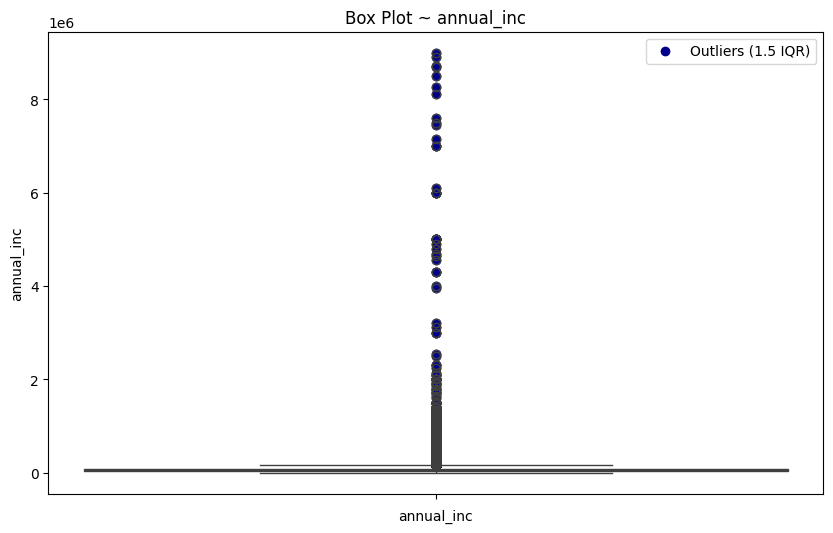

4.805939232801448
Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'annual_inc_quantile', 'annual_inc_robust'],
      dtype='object')
count     

In [594]:
# Inspect for outliers for the annual_inc variable
annual_inc_outlier_inspect = outlier_detection_viz_1(interest_rate_df,'annual_inc')

# Compute the percentage of outliers in the annual_inc variable
print(len(annual_inc_outlier_inspect)/len(interest_rate_df)*100) # 4.805939232801448% of regular outliers
print(interest_rate_df.columns)

# Inspect the distribution of the annual_inc variable after removing the minimal and maximum values.
print(interest_rate_df['annual_inc'].describe(include = 'all').round(3))

##### Inspect for patterns across variables --> Regular Outliers --> Relationship 1

--> A : High income outliers and puprose of the loan

,0
purpose,
debt_consolidation,19676
credit_card,9060
home_improvement,4006
other,1527
major_purchase,828
small_business,723
medical,298
car,247
house,221


,purpose,annual_inc
0,car,279982.178138
6,medical,255637.198557
9,renewable_energy,254195.000000
3,home_improvement,250701.487029
8,other,250508.705842
10,small_business,249538.464786
7,moving,244797.250250
5,major_purchase,238241.021498
2,debt_consolidation,229251.730249
4,house,229062.428733


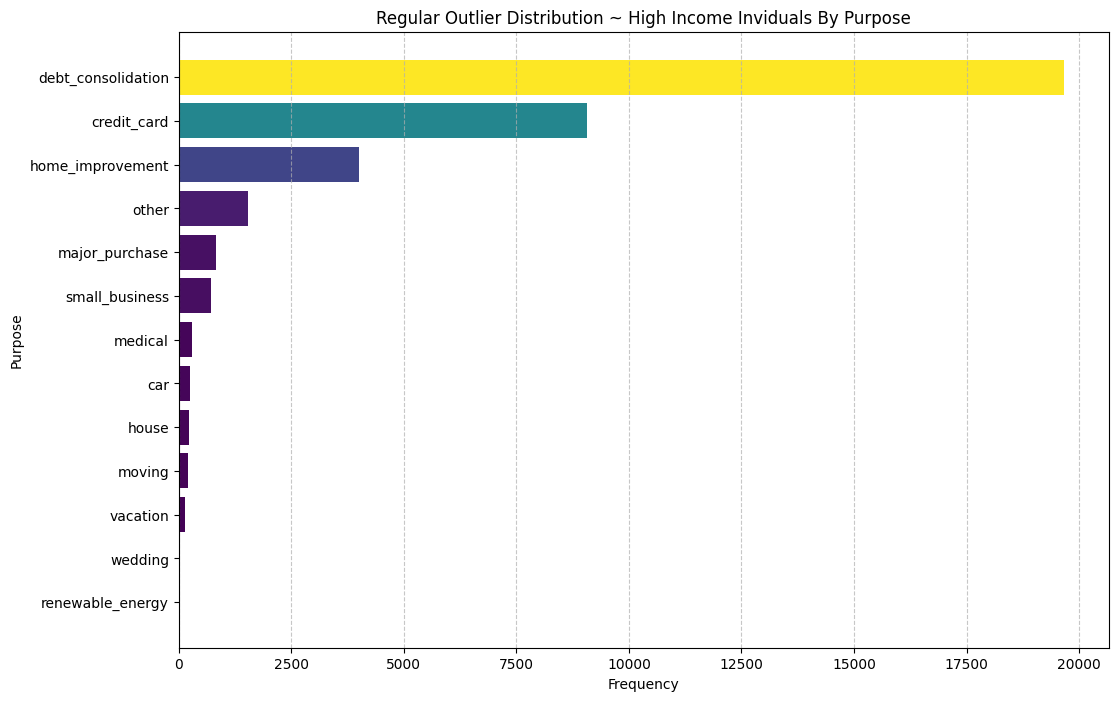

In [595]:
# Inspect for examining the relationship between high income outliers and puprose of the loan.
annual_purpose = annual_inc_outlier_inspect.groupby('purpose').size().sort_values(ascending = False)
display(annual_purpose)
annual_inc_purpose = annual_inc_outlier_inspect.groupby('purpose')['annual_inc'].mean().reset_index().sort_values(by = 'annual_inc',ascending = False)
display(annual_inc_purpose)

# High Income Individuals (By Purpose)
plt.figure(figsize = (12, 8))
purposes_reversed = annual_purpose.index[::-1]
values_reversed = annual_purpose.values[::-1]
colors = plt.cm.viridis(values_reversed / values_reversed.max())
plt.barh(purposes_reversed,values_reversed,color = colors)
plt.xlabel('Frequency')
plt.ylabel('Purpose')
plt.title('Regular Outlier Distribution ~ High Income Inviduals By Purpose')
plt.grid(axis='x',linestyle='--',alpha = 0.7)
plt.show()

# Most Common Purposes of High Income Individuals
# 1. Debt consolidation (consolidate debt payments), mainly for managing finances and yielding the benefits of lowered interest rates.
# 2. Loans for paying credit-card bills that yield higher interest rates compared to personal loans.
# 3. Furnishing homes for increasing property value.

# Least Common Purposes of High Income Individuals
# Medical expenses, Major purchases and Entrepreneurial activities.

# Key Takeways:
# High income individuals have a diverse range of financial requirements and varied reason for borrowing.
# Therefore, there is no signficant reason for excluding the outliers based on the stated purpose of borrowing.
# However, there are other factors to consider when deciding to remove the outliers for annual_in variable.

##### Inspect for patterns across variables --> Regular Outliers --> Relationship 2

--> B : High income outliers and employment length

,0
emp_length,
10.0,13721
2.0,3506
3.0,3028
0.0,2937
5.0,2385
1.0,2288
4.0,2277
8.0,1861
7.0,1840


,emp_length,annual_inc
10,10.0,240987.939744
5,5.0,238603.945539
6,6.0,237106.143268
8,8.0,235446.301177
7,7.0,231677.464299
4,4.0,231388.119082
3,3.0,231126.683038
9,9.0,229929.888313
1,1.0,224378.006508
2,2.0,222930.514113


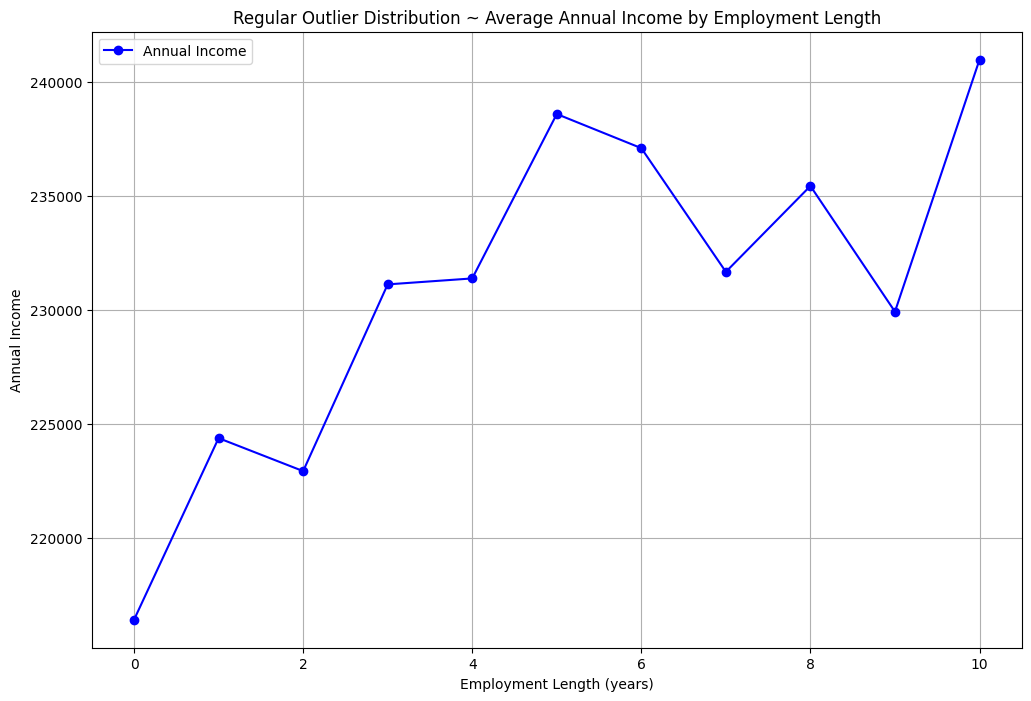

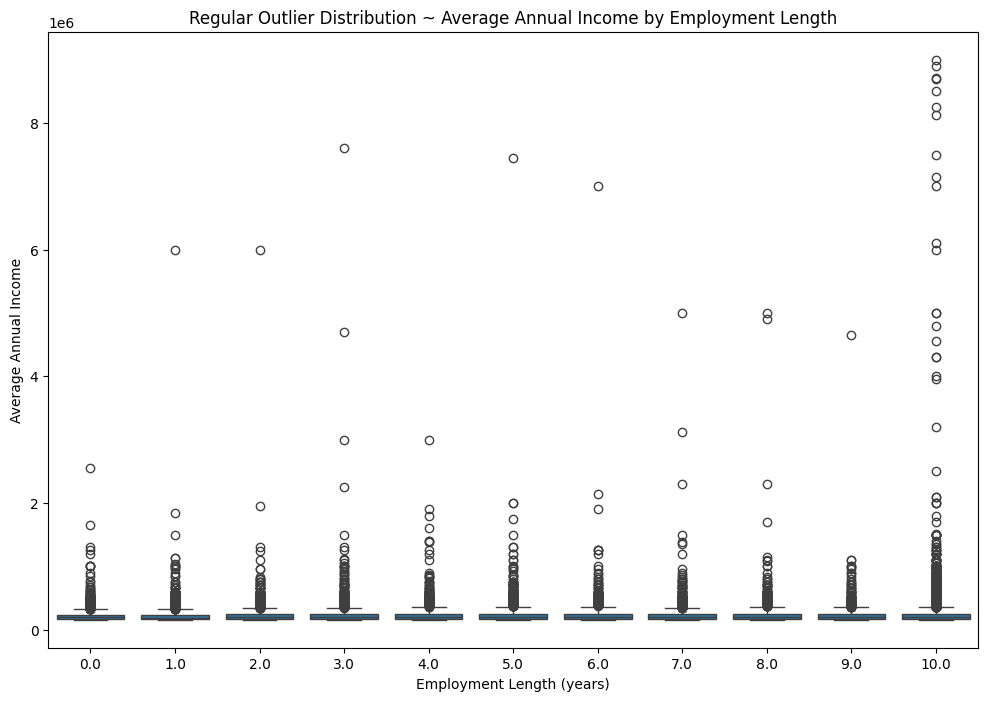

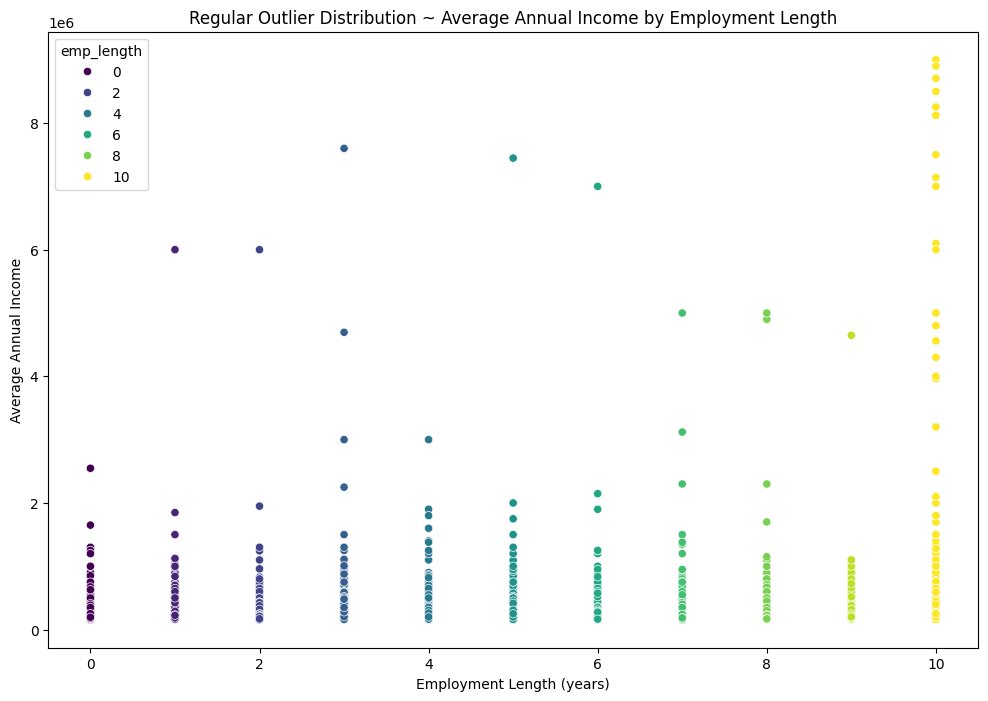

In [596]:
# Inspect for examining the relationship between high income outliers and employment length.
annual_employment_length = annual_inc_outlier_inspect.groupby('emp_length').size().sort_values(ascending = False)
display(annual_employment_length)
annual_inc_employment_length = annual_inc_outlier_inspect.groupby('emp_length')['annual_inc'].mean().reset_index().sort_values(by = 'annual_inc',ascending = False)
display(annual_inc_employment_length)

# High Income Individuals (By Employment Length)
annual_inc_employment_length_sorted = annual_inc_employment_length.sort_values(by = 'emp_length')
plt.figure(figsize = (12, 8))
plt.plot(annual_inc_employment_length_sorted['emp_length'],annual_inc_employment_length_sorted['annual_inc'],marker = 'o',linestyle = '-',color = 'b',label = 'Annual Income')
plt.xlabel('Employment Length (years)')
plt.ylabel('Annual Income')
plt.title('Regular Outlier Distribution ~ Average Annual Income by Employment Length')
plt.grid(True)
plt.legend()
plt.show()

# Box plot to show distribution of annual incomes by employment length
plt.figure(figsize = (12, 8))
sns.boxplot(x ='emp_length',y ='annual_inc',data = annual_inc_outlier_inspect)
plt.title('Regular Outlier Distribution ~ Average Annual Income by Employment Length')
plt.xlabel('Employment Length (years)')
plt.ylabel('Average Annual Income')
plt.show()

# Scatter plot to visualize high-income outliers
plt.figure(figsize = (12, 8))
sns.scatterplot(x = 'emp_length',y = 'annual_inc',data = annual_inc_outlier_inspect,hue = 'emp_length',palette = 'viridis')
plt.title('Regular Outlier Distribution ~ Average Annual Income by Employment Length')
plt.xlabel('Employment Length (years)')
plt.ylabel('Average Annual Income')
plt.show()

# Key Takeways:
# Annual income generally increases with the length of employment (employment length correlates with higher earnings).
# High income outliers exist across all employment lengths (significant income variability within each group).
# More pronounced high income outliers are observed for individuals with longer employment lengths (potential for substantial earnings growth over time).
# Presence of high incomes for individuals with "< 1 year" of employment is unusual and warrants further investigation for accuracy.
# Notable income variability in mid-career stages (3 to 9 years), likely due to different career trajectories and industry differences.

# Strategy:
# Retaining these outliers preserves the data's integrity by accurately representing real-world income distribution and supporting robust model development.

##### Inspect for patterns across variables --> Regular Outliers --> Relationship 3

--> C : High income outliers and loan grade

In [597]:
# Inspect for examining the relationship between high income outliers and loan grade.
annual_loan_grade = annual_inc_outlier_inspect.groupby('grade').size().sort_values(ascending = False)
display(annual_loan_grade)
annual_inc_loan_grade = annual_inc_outlier_inspect.groupby('grade')['annual_inc'].mean().reset_index().sort_values(by = 'annual_inc',ascending = False)
display(annual_inc_loan_grade)

# Key Takeaways:
# High Count in Grades A and B: The highest number of high-income outliers are found in grades B (10,460) and A (9,978),
# indicating a concentration of high earners in these top credit grades.
# Highest Average Income in Grade G: Grade G, despite having the fewest high-income outliers, shows the highest average annual income ($247,316.34),
# highlighting some exceptionally high earners in this grade.
# Consistent High Averages Across A to E: The average annual incomes for grades A ($234,427.81) to E ($232,627.83) are relatively close,
# showing a consistent level of high income among these grades.
# Variability in Lower Grades: Grades F ($225,954.26) and G ($247,316.34) have fewer counts but notably high average incomes,
# suggesting fewer but significantly high earners in these lower credit grades.
# Grade B Leads in Count: Grade B has the largest count of high-income outliers, suggesting that individuals with good credit scores are more likely to have higher incomes.
# Strategy:
# Retention of Outliers: Retaining these outliers ensures that the analysis accurately reflects the income distribution across different credit grades,
# providing valuable insights into the financial behaviors of individuals with varying creditworthiness.

,0
grade,
B,10460
A,9978
C,8755
D,4308
E,2471
F,791
G,220


,grade,annual_inc
6,G,247316.340909
1,B,235109.607435
0,A,234427.806767
4,E,232627.828171
2,C,231701.521891
3,D,231439.210325
5,F,225954.263970


##### Inspect for patterns across variables --> Regular Outliers --> Relationship 4

--> D : High income outliers and home ownership

In [598]:
# Inspect for examining the relationship between high income outliers and home ownership.
annual_home_ownership = annual_inc_outlier_inspect.groupby('home_ownership').size().sort_values(ascending=False)
display(annual_home_ownership)
annual_inc_home_ownership = annual_inc_outlier_inspect.groupby('home_ownership')['annual_inc'].mean().reset_index().sort_values(by='annual_inc', ascending=False)
display(annual_inc_home_ownership)

# Key Takeaways:
# 1. High-income outliers are most commonly found among individuals with MORTGAGE home ownership (25,491), followed by RENT (8,161) and OWN (3,331).
# 2. Average annual income for high-income outliers is highest for individuals with OWN home ownership ($246,210.82), followed by MORTGAGE ($232,255.37) and RENT ($231,756.76).
# 3. The distribution suggests that individuals with OWN home ownership tend to have higher incomes on average, though fewer in number compared to those with MORTGAGE and RENT.
# 4. The high average income for the OWN category indicates financial stability and higher asset ownership among high-income outliers.
# 5. The relatively lower but substantial number of high-income outliers with RENT home ownership suggests a segment of high earners who prefer or need to rent despite high income levels.

# Strategy:
# Retention of Outliers: Retaining these outliers ensures that the analysis accurately reflects the income distribution across different home ownership types,
# providing valuable insights into the financial behaviors and preferences of high-income individuals.

,0
home_ownership,
MORTGAGE,25491
RENT,8161
OWN,3331


,home_ownership,annual_inc
1,OWN,246210.820276
0,MORTGAGE,232255.372173
2,RENT,231756.762496


##### Inspect for patterns across variables --> Regular Outliers --> Relationship 5

--> E : High income outliers and debt-to-income (dti ratio)

In [599]:
# Inspect for examining the relationship between high income outliers and debt-to-income (dti ratio) --> [binned]
annual_dti = annual_inc_outlier_inspect.groupby(pd.cut(annual_inc_outlier_inspect['dti'],bins = [0,10,20,30,40,50,60])).size()
display(annual_dti)
annual_inc_dti = annual_inc_outlier_inspect.groupby(pd.cut(annual_inc_outlier_inspect['dti'],bins = [0,10,20,30,40,50,60]))['annual_inc'].mean().reset_index()
display(annual_inc_dti)

# Key Takeaways:
# 1. DTI (0, 10]: Most prevalent among high-income individuals, with the highest average annual income ($269,200.81).
# 2. DTI (10, 20]: The most common category, indicating high earners manage moderate debt levels ($214,820.15).
# 3. Higher DTI Categories: Fewer high-income individuals with higher DTI ratios, with a significant drop in numbers and average income.
# 4. DTI (30, 40]: Very few high-income individuals in this category, showing a marked decrease in income ($193,390.70).
# 5. NaN Values: Indicates no high-income individuals with DTI ratios above 40.

# Strategy:
# Retention of Outliers: Retaining these outliers is crucial for accurately representing the relationship between DTI and income among high-income individuals.
# This ensures a comprehensive understanding of how debt levels impact high earners.
# Further Investigation: Investigate why there are no high-income individuals with DTI ratios above 40 to gain insights into financial behaviors or constraints.

<ipython-input-599-19162edb0687>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  annual_dti = annual_inc_outlier_inspect.groupby(pd.cut(annual_inc_outlier_inspect['dti'],bins = [0,10,20,30,40,50,60])).size()


,0
dti,
"(0, 10]",14185
"(10, 20]",17346
"(20, 30]",4860
"(30, 40]",586
"(40, 50]",0
"(50, 60]",0


<ipython-input-599-19162edb0687>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  annual_inc_dti = annual_inc_outlier_inspect.groupby(pd.cut(annual_inc_outlier_inspect['dti'],bins = [0,10,20,30,40,50,60]))['annual_inc'].mean().reset_index()


,dti,annual_inc
0,"(0, 10]",269200.808498
1,"(10, 20]",214820.149509
2,"(20, 30]",200018.753305
3,"(30, 40]",193390.699932
4,"(40, 50]",NaN
5,"(50, 60]",NaN


##### 4.2.2 Key observations from annual income (Regular Outlier Inspection)

In [600]:
# High Incomes with Zero Years of Employment:
# Observation: Some individuals reported high incomes despite having "< 1 year" of employment.
# Rationale: This anomaly suggests potential data entry errors or unique cases like recent graduates with high-paying jobs.
# Action: Investigate these records to ensure data accuracy.

# Extreme High-Income Outliers:
# Observation: Extremely high incomes (e.g., over $1,000,000) significantly skew the data distribution.
# Rationale: These outliers reflect real-world income variability but can distort statistical measures like the mean.
# Action: Retain these outliers to capture the full spectrum of income variability while acknowledging their impact on analyses.

# No High-Income Individuals in Higher DTI Categories:
# Observation: No high-income individuals in the (40, 50] and (50, 60] DTI categories.
# Rationale: High-income individuals typically avoid very high debt levels relative to their income, indicating prudent financial management.
# Action: Explore the absence to understand financial behaviors or constraints.

# Income Variability in Employment Length:
# Observation: Significant income variability in mid-career stages (3 to 9 years) and high incomes for "< 1 year" of employment.
# Rationale: Reflects varied career trajectories and industry differences, or potential data inaccuracies.
# Action: Validate these data points and consider additional factors like industry and job role.

# High Average Incomes in Lower Credit Grades:
# Observation: Lower credit grades (F and G) show notably high average incomes despite fewer individuals.
# Rationale: Some high-income individuals may have poor credit scores due to high debt levels or recent financial difficulties.
# Action: Examine financial behaviors and histories of these individuals.

# High Prevalence of Debt Consolidation Loans:
# Observation: Significant number of high-income individuals take loans for debt consolidation.
# Rationale: Indicates that high-income earners also accumulate substantial debt and seek consolidation for better financial management.
# Action: Understand their financial strategies regarding debt management.

# Reporting Unusual Findings
# These findings highlight critical areas for further investigation and provide a comprehensive understanding of the dataset:
# - Investigate High Incomes with Zero Years of Employment to ensure data integrity.
# - Acknowledge Extreme High-Income Outliers while considering their impact on analyses.
# - Explore Absence in Higher DTI Categories to understand financial behaviors.
# - Validate Income Variability in Employment Length with additional contextual factors.
# - Examine High Average Incomes in Lower Credit Grades for financial behaviors and histories.
# - Understand Debt Consolidation Strategies among high-income earners.

##### 4.2.3 Extreme Outliers --> annual_inc --> Threshold =  3

(769527, 55)
count     769527.000
mean       76818.537
std        65355.329
min         4000.000
25%        47700.000
50%        65000.000
75%        91000.000
max      9000000.000
Name: annual_inc, dtype: float64
47700.0
91000.0
43300.0
-17250.0
155950.0
-82200.0
220900.0
Total Extreme Outliers in annual_inc: 12067


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,annual_inc_quantile,annual_inc_robust
42546,10149577,12001118,28000.0,28000.0,28000.0,36 months,7.62,872.52,A,A3,...,Aug-2014,0.0,1.0,INDIVIDUAL,0.0,0.0,799592.0,54200.0,2.638328,1.949062
42569,10089626,11941160,7500.0,7500.0,7500.0,36 months,7.62,233.72,A,A3,...,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,152.0,508488.0,11900.0,2.497351,1.844066
42610,10109467,11961057,25000.0,25000.0,25000.0,36 months,20.50,935.48,E,E1,...,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,42572.0,24700.0,2.307607,1.702751
42698,10119291,11970925,35000.0,35000.0,35000.0,36 months,15.61,1223.77,C,C4,...,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,1094366.0,42200.0,2.919716,2.158631
43026,10114642,11966790,30075.0,30075.0,30075.0,36 months,14.98,1042.27,C,C3,...,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,809402.0,5000.0,2.790845,2.062652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887234,37790255,40552975,35000.0,35000.0,35000.0,60 months,11.44,768.69,B,B4,...,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,253647.0,256000.0,2.307607,1.702751
887251,37660119,40422832,35000.0,35000.0,35000.0,36 months,8.19,1099.85,A,A5,...,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,1629792.0,60500.0,2.696204,1.992166
887263,37317965,40080791,25000.0,25000.0,25000.0,60 months,12.39,561.06,C,C1,...,Dec-2015,0.0,1.0,INDIVIDUAL,0.0,0.0,993967.0,120600.0,2.345158,1.730718
887284,37227667,40000439,30000.0,30000.0,30000.0,36 months,6.99,926.18,A,A3,...,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,457664.0,121900.0,2.169694,1.600038


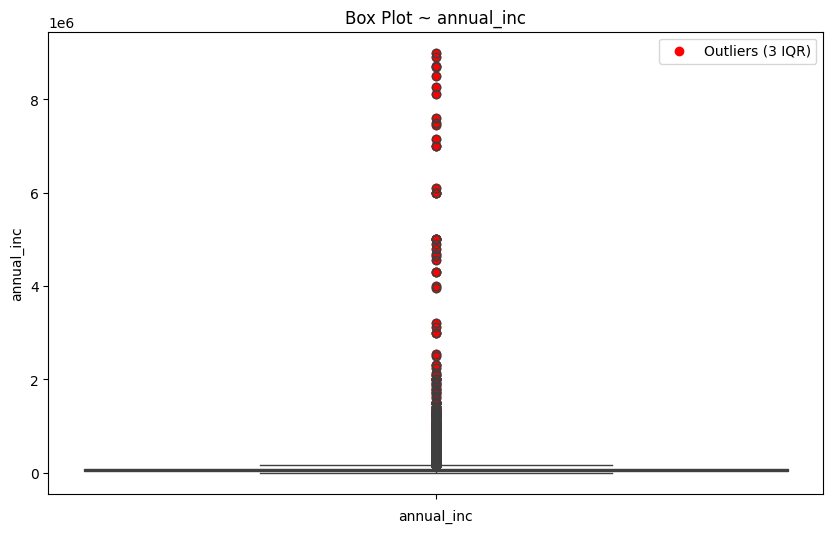

1.5681061223322899


,annual_inc,purpose,emp_length,grade,home_ownership,dti,tot_cur_bal,emp_title
506740,9000000.0,debt_consolidation,10.0,A,MORTGAGE,0.08,324692.0,registered nurse
684000,8900060.0,debt_consolidation,10.0,D,RENT,0.09,21988.0,commercial driver
866973,8706582.0,credit_card,10.0,C,MORTGAGE,0.11,79135.0,Correctional Sgt.
490862,8700000.0,debt_consolidation,10.0,B,MORTGAGE,0.18,89277.0,Customer Representative
514272,8500021.0,credit_card,10.0,B,MORTGAGE,0.22,467240.0,Senior Field Operator
...,...,...,...,...,...,...,...,...
818442,221000.0,home_improvement,10.0,C,MORTGAGE,16.17,60269.0,President
534769,221000.0,debt_consolidation,10.0,B,MORTGAGE,19.26,363982.0,CEO
824615,221000.0,debt_consolidation,0.0,A,OWN,7.51,221833.0,Regional Vice President
673089,221000.0,debt_consolidation,10.0,D,MORTGAGE,14.09,522242.0,SVP/CIO


,count
emp_title,
Vice President,389
Physician,310
President,293
Owner,273
Director,272
...,...
Stategic Account Sales,1
executive director quality,1
Cinematographer,1


In [601]:
print(interest_rate_df.shape) # (769527, 55)
print(interest_rate_df['annual_inc'].describe(include = 'all').round(3))

# Inspect the annual_inc of borrowers that have less than $10,000 annual income
annual_inc_less_10 = interest_rate_df[interest_rate_df['annual_inc'] < 10000]
annual_inc_less_10_sorted = annual_inc_less_10[['annual_inc','purpose','emp_length','grade','home_ownership','dti','tot_cur_bal','emp_title']].sort_values('annual_inc',ascending = True)
# display(annual_inc_less_10_sorted)

annual_income_q1 = interest_rate_df['annual_inc'].quantile(0.25)
print(annual_income_q1) # 47700.0

annual_income_q2 = interest_rate_df['annual_inc'].quantile(0.75)
print(annual_income_q2) # 91000.0

# Interquatile Range (IQR) for annual_inc
annual_income_iqr = annual_income_q2 - annual_income_q1
print(annual_income_iqr) # 43300.0

# Lower and Upper Boundaries (Threshold = 1.5 * IQR)
lower_bound_a = annual_income_q1 - 1.5 * annual_income_iqr
upper_bound_a = annual_income_q2 + 1.5 * annual_income_iqr

print(lower_bound_a) # -17250.0
print(upper_bound_a) # 155950.0

# Lower and Upper Boundaries (Threshold = 3 * IQR)
lower_bound_b = annual_income_q1 - 3 * annual_income_iqr
upper_bound_b = annual_income_q2 + 3 * annual_income_iqr

print(lower_bound_b) # -17250.0
print(upper_bound_b) # 155950.0

# annual_inc extreme outlier inspection --> threshold = 3
annual_inc_extreme_outlier,lower_bound,upper_bound = outlier_detection_viz_2(interest_rate_df,'annual_inc')
# print(lower_bound,upper_bound)

# Compute the percentage of extreme outliers in the annual_inc column
percentage_extreme_outliers = annual_inc_extreme_outlier.shape[0] / interest_rate_df.shape[0] * 100
print(percentage_extreme_outliers) # 1.5681061223322899

# print(lower_bound) # -82200.0
# print(upper_bound) # 220900.0

display(annual_inc_extreme_outlier[['annual_inc','purpose','emp_length','grade','home_ownership','dti','tot_cur_bal','emp_title']].sort_values('annual_inc',ascending = False))
display(annual_inc_extreme_outlier['emp_title'].value_counts())

##### 4.2.4 Refined strategy for extreme outliers and criteria

In [602]:
# Primarily, differentiate between regular outliers (threshold of 1.5) and extreme outliers (threshold of 3).
# Regular outliers are retained as they can provide valuable insights into the data's variability and uncover important trends.
# The approach is to use the IQR method with a threshold of 3 to identify extreme outliers (anomalies).
# Extreme outliers are either retained or excluded from further inspection.

# If the extreme outliers are excluded the following procedure would be adopted:
# The method for anomaly detection and removal would be Isolation Forest.
# Set the contamination parameter for the Isolation Forest based on the percentage of extreme outliers identified by the IQR method,
# This provides a basis for anomaly detection.

# By applying Isolation Forest with this contamination parameter, the data quality and model performance is improved,
# as the model is trained on data representing typical patterns. This leads to more reliable and actionable insights,
# ensuring that the analysis remains robust, relevant, and capable of accurately reflecting real-world scenarios.

##### 4.2.5 Detection of anomalies using Isolation Forest

In [603]:
# As of now only 2 outliers from annual_inc variable have been identified and removed
# [Minimum Value (3800) and Maximum Value (9500000)].
# We have identified 12067 observations as extreme outliers in the annual_inc variable.

print(interest_rate_df.shape) # (769527, 55)

# Lets create a copy of the orginal data frame before applying Isolation Forest.
interest_rate_df_4 = interest_rate_df.copy()
annual_inc_contamination_value = annual_inc_extreme_outlier.shape[0] / interest_rate_df.shape[0]
print(annual_inc_contamination_value)

# Create an Isolation Forest Model for anomaly detection in annual_inc variable.
isolation_forest_annual_inc = IsolationForest(contamination = annual_inc_contamination_value,random_state = 42)
isolation_forest_annual_inc.fit(interest_rate_df_4[['annual_inc']])

# Predict the anomalies for the annual_inc variable where 1 dictates normal observations and -1 denotes anomalies.
interest_rate_df_4['annual_inc_anomaly'] = isolation_forest_annual_inc.predict(interest_rate_df_4[['annual_inc']])

# Obtain the anomaly scores for the annual_inc variable.
interest_rate_df_4['annual_inc_anomaly_score'] = isolation_forest_annual_inc.decision_function(interest_rate_df_4[['annual_inc']])

# Extract the anomalies in a separate dataframe for inspection.
annual_inc_anomalies = interest_rate_df_4[interest_rate_df_4['annual_inc_anomaly'] == -1]

# View the annual_inc, annual_inc_anomaly, and the corresponding annual_inc_anomaly_score
annual_inc_anomalies_inspect = annual_inc_anomalies[['annual_inc', 'annual_inc_anomaly', 'annual_inc_anomaly_score']]
display(annual_inc_anomalies_inspect)

# Annual Income Anomalies (Descriptive Statistics)
display(annual_inc_anomalies.describe())

(769527, 55)
0.015681061223322898


,annual_inc,annual_inc_anomaly,annual_inc_anomaly_score
42546,325000.0,-1,-0.090051
42569,295000.0,-1,-0.074207
42610,250000.0,-1,-0.034386
42698,425000.0,-1,-0.117182
43026,381500.0,-1,-0.107854
...,...,...,...
887234,250000.0,-1,-0.034386
887251,350000.0,-1,-0.098633
887263,252000.0,-1,-0.036475
887284,225000.0,-1,-0.004671


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,dti,...,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,annual_inc_quantile,annual_inc_robust,annual_inc_anomaly,annual_inc_anomaly_score
count,1.203300e+04,1.203300e+04,12033.000000,12033.000000,12033.000000,12033.000000,12033.000000,12033.000000,1.203300e+04,12033.000000,...,12033.000000,12033.0,12033.000000,12033.000000,1.203300e+04,1.203300e+04,12033.000000,12033.000000,12033.0,12033.000000
mean,3.880987e+07,4.172625e+07,25310.082689,25310.082689,25301.637164,12.112841,755.722286,6.271171,3.411522e+05,11.001434,...,0.014128,1.0,0.010388,239.505277,4.901189e+05,8.938432e+04,2.527338,1.866400,-1.0,-0.061990
std,2.089832e+07,2.201610e+07,8837.858889,8837.858889,8835.077310,4.607830,289.434912,3.601886,3.501996e+05,6.254997,...,0.128151,0.0,0.116643,2573.267366,4.182613e+05,1.866894e+05,0.360090,0.268184,0.0,0.041023
min,3.615420e+05,3.700860e+05,1000.000000,1000.000000,1000.000000,5.320000,30.650000,0.000000,2.212040e+05,0.000000,...,0.000000,1.0,0.000000,0.000000,0.000000e+00,0.000000e+00,2.150067,1.585420,-1.0,-0.145246
25%,1.889585e+07,2.100792e+07,20000.000000,20000.000000,20000.000000,8.180000,540.960000,3.000000,2.470000e+05,6.470000,...,0.000000,1.0,0.000000,0.000000,1.661870e+05,3.180000e+04,2.279748,1.682003,-1.0,-0.098633
50%,4.204127e+07,4.495790e+07,27325.000000,27325.000000,27325.000000,11.530000,768.690000,7.000000,2.750000e+05,10.120000,...,0.000000,1.0,0.000000,0.000000,4.330400e+05,5.690000e+04,2.432589,1.795834,-1.0,-0.054595
75%,5.803086e+07,6.183442e+07,35000.000000,35000.000000,34975.000000,14.980000,960.710000,10.000000,3.500000e+05,14.620000,...,0.000000,1.0,0.000000,0.000000,6.701710e+05,1.021000e+05,2.696204,1.992166,-1.0,-0.032405
max,6.861653e+07,7.351935e+07,35000.000000,35000.000000,35000.000000,28.990000,1409.990000,10.000000,9.000000e+06,38.670000,...,3.000000,1.0,3.000000,87657.000000,8.000078e+06,9.999999e+06,5.199338,3.856425,-1.0,-0.000473


##### 4.2.6 Handle anomalies detected with Isolation Forest model

In [604]:
print(interest_rate_df_4.shape)
print(annual_inc_anomalies.shape)

# Analysis of anomalies
# IQR method identified 12067 extreme outliers in the annual_inc variable.
# Isolation Forest identified 12033 anomalies in the annual_inc variable.
# The similarity of anomalies detected by both the methods validates the stated approach.
# Remove the anomalies from the dataset and visualize the effect of anomaly removal.

# Create a cleaned_df_1 --> with the first variable (annual_inc) handled for outliers.
interest_rate_df_cleaned_1 = interest_rate_df_4[interest_rate_df_4['annual_inc_anomaly'] != -1]

# Drop the annual_inc_anomaly and annual_inc_anomaly_score columns from the cleaned_df_1.
interest_rate_df_cleaned_1 = interest_rate_df_cleaned_1.drop(columns = ['annual_inc_anomaly','annual_inc_anomaly_score'])

# View the cleaned_df_1
print(interest_rate_df_cleaned_1.shape)
display(interest_rate_df_cleaned_1.head())

(769527, 57)
(12033, 57)
(757494, 55)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,annual_inc_quantile,annual_inc_robust
42535,10149342,12000897,27050.0,27050.0,27050.0,36 months,10.99,885.46,B,B2,...,Dec-2015,0.0,1.0,INDIVIDUAL,0.0,0.0,114834.0,59900.0,-0.300542,-0.239720
42536,10159584,12011200,9750.0,9750.0,9750.0,36 months,13.98,333.14,C,C1,...,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,14123.0,15100.0,-1.773922,-1.337049
42537,10159498,1319523,12000.0,12000.0,12000.0,36 months,6.62,368.45,A,A2,...,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,267646.0,61100.0,0.965420,0.703131
42538,10139658,11991209,12000.0,12000.0,12000.0,36 months,13.53,407.40,B,B5,...,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,15386.0,13605.0,8100.0,-0.973449,-0.740881
42539,10159548,12011167,15000.0,15000.0,15000.0,36 months,8.90,476.30,A,A5,...,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,1514.0,272492.0,15400.0,-0.038901,-0.044858


Inspect the impact of anomaly removal on the distribution of annual income

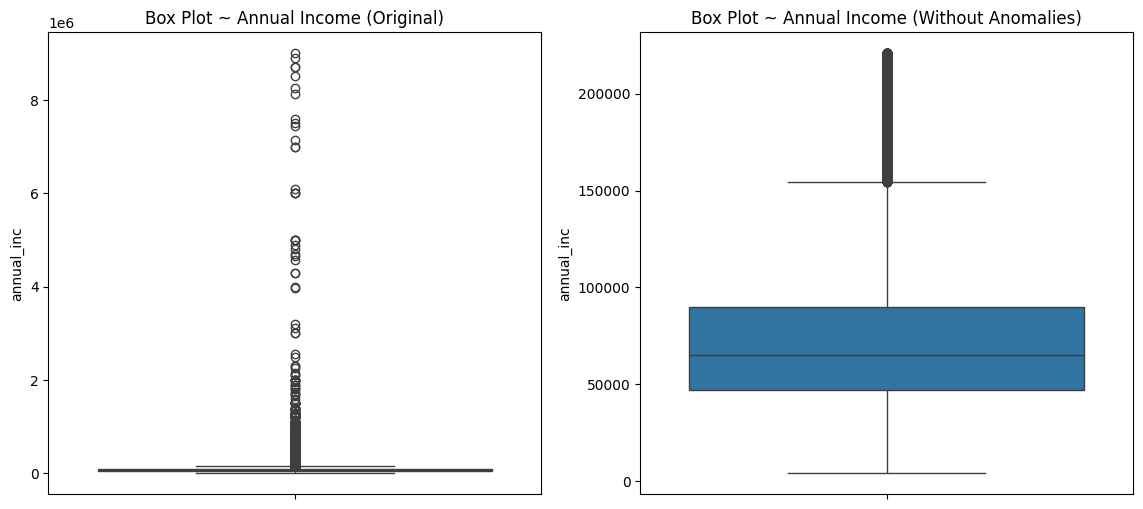

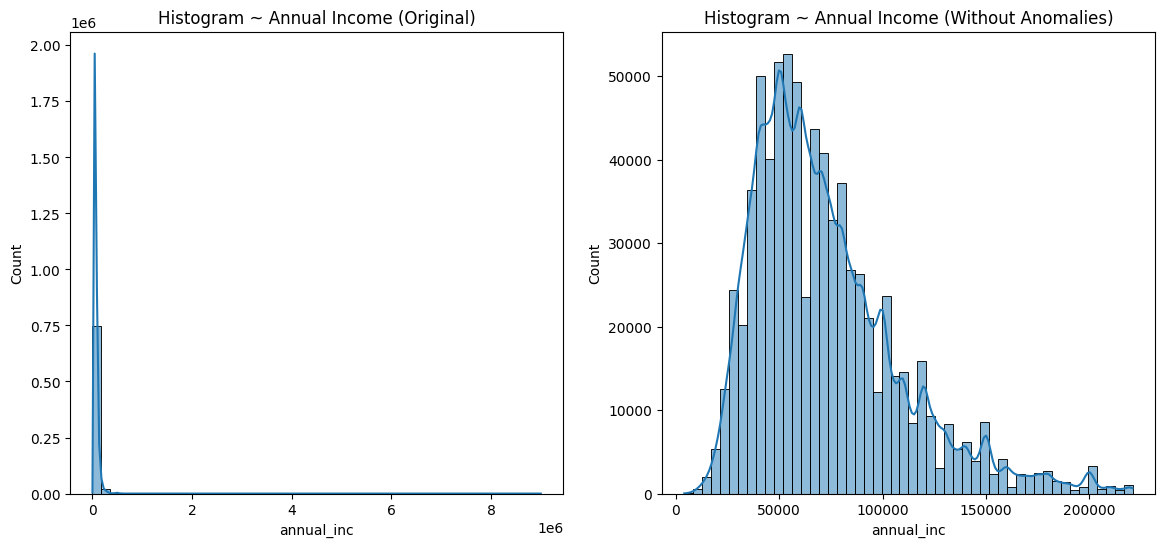

In [605]:
plt.figure(figsize = (14,6))

# Box Plot Before Anomaly Removal
plt.subplot(1,2,1)
sns.boxplot(y = interest_rate_df_4['annual_inc'])
plt.title('Box Plot ~ Annual Income (Original)')

# Box Plot After Anomaly Removal
plt.subplot(1,2,2)
sns.boxplot(y = interest_rate_df_cleaned_1['annual_inc'])
plt.title('Box Plot ~ Annual Income (Without Anomalies)')

plt.show()

plt.figure(figsize = (14,6))

# Histogram Before Anomaly Removal
plt.subplot(1,2,1)
sns.histplot(interest_rate_df_4['annual_inc'],bins = 50,kde = True)
plt.title('Histogram ~ Annual Income (Original)')

# Histogram After Anomaly Removal
plt.subplot(1,2,2)
sns.histplot(interest_rate_df_cleaned_1['annual_inc'],bins = 50,kde = True)
plt.title('Histogram ~ Annual Income (Without Anomalies)')

plt.show()

Drop the annual_inc_quantile and annual_inc_robust variables --> annual income analysis complete

In [606]:
print(interest_rate_df_cleaned_1.shape)
print(interest_rate_df_cleaned_1.columns)

# Drop the annual_inc_quantile and annual_inc_robust variables since the annual_inc variable has been successfully
# handled for outliers.
interest_rate_df_cleaned_1 = interest_rate_df_cleaned_1.drop(columns = ['annual_inc_quantile','annual_inc_robust'])
print(interest_rate_df_cleaned_1.shape)

(757494, 55)
Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'annual_inc_quantile', 'annual_inc_robust'],
      dtype='object')
(757494, 53)


##### 4.3.1 Installment Variable

['annual_inc', 'installment', 'int_rate', 'out_prncp', 'out_prncp_inv']
count    757494.000000
mean        442.383760
std         240.397747
min          23.260000
25%         268.360000
50%         389.300000
75%         577.440000
max        1445.460000
Name: installment, dtype: float64
Range: 1422.2
IQR: 315.595
Coefficient of Variation(%): 54.63047070025796
389.3


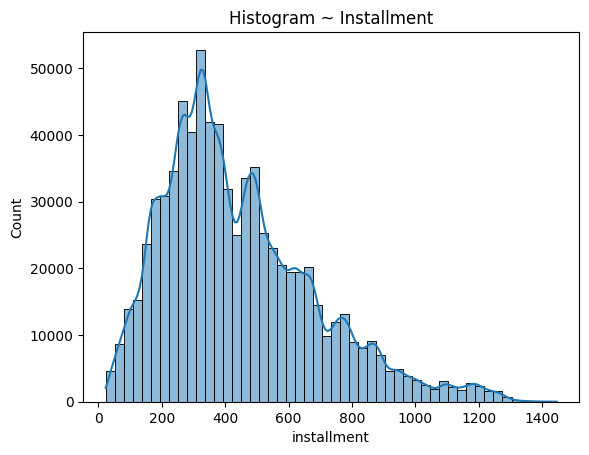

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
48952,9855836,11707821,1000.0,1000.0,1000.0,60 months,13.98,23.26,C,C1,...,23.26,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,17715.0,6000.0


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
571358,61842986,66035734,35000.0,35000.0,34975.0,36 months,27.88,1445.46,G,G3,...,1445.46,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,494595.0,3100.0
578649,61452623,65571438,35000.0,35000.0,35000.0,36 months,27.88,1445.46,G,G3,...,1844.69,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,183473.0,20800.0


In [607]:
# Print the variables of the loan metrics category
print(loan_metrics)

# Inspect the installment rate variable for outliers
print(interest_rate_df_cleaned_1['installment'].describe())
print('Range:',np.max(interest_rate_df['installment']) - np.min(interest_rate_df['installment']))
print('IQR:',np.percentile(interest_rate_df['installment'],75) - np.percentile(interest_rate_df['installment'],25))
print('Coefficient of Variation(%):',np.std(interest_rate_df['installment'])/np.mean(interest_rate_df['installment']) * 100)

# Median (Installment)
print(np.median(interest_rate_df_cleaned_1['installment']))

# Inspecting the distribution of installment rate
sns.histplot(interest_rate_df_cleaned_1['installment'],bins = 50,kde = True)
plt.title('Histogram ~ Installment')
plt.show()

# Examine the minimum and maximum values of the installment rate
installment_min = interest_rate_df_cleaned_1[interest_rate_df_cleaned_1['installment'] == interest_rate_df_cleaned_1['installment'].min()]
display(installment_min) # The monthly payment is reasonable as the loan amount is $1000 and the duration of the loan is 60 months.
                         # The interest rate that is offered by the Lending CLub (LC) is 13.98%.

installment_max = interest_rate_df_cleaned_1[interest_rate_df_cleaned_1['installment'] == interest_rate_df_cleaned_1['installment'].max()]
display(installment_max) # The monthly payment is quiet high as the loan amount is $35000 and the duration of the loan is 36 months.
                         # The interest rate that has been offered by the Lending Club (LC) is 27.88%.
                         # Both the observations resembled similar loan situations with a similar amount and duration.
                         # Therefore the (2) observations seem to be valid observations.

Examine the regular and extreme outliers --> Installment Variable

Total Regular Outliers in installment: 18864


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
42600,10119464,11971096,30000.0,30000.0,30000.0,36 months,17.57,1078.12,D,D2,...,1078.12,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,42321.0,38500.0
42674,10168464,12020134,35000.0,35000.0,35000.0,36 months,15.61,1223.77,C,C4,...,3675.56,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,221949.0,50800.0
42700,10128926,11980585,35000.0,35000.0,35000.0,36 months,16.24,1234.65,C,C5,...,1234.65,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,61877.0,111200.0
42707,10119336,11970970,35000.0,35000.0,34950.0,36 months,16.24,1234.65,C,C5,...,1234.65,Unknown,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,248732.0,33900.0
42739,10069292,11920905,35000.0,35000.0,34975.0,36 months,25.80,1406.45,G,G1,...,16249.47,Unknown,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,45289.0,36600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887270,37267392,40050136,32000.0,32000.0,32000.0,36 months,25.57,1281.99,F,F5,...,1281.99,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,69304.0,11000.0
887289,37197597,39970358,35000.0,35000.0,35000.0,36 months,11.99,1162.34,B,B5,...,1162.34,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,150157.0,57300.0
887292,37137624,39910377,35000.0,35000.0,35000.0,36 months,11.44,1153.17,B,B4,...,1153.17,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,363224.0,92100.0
887309,35733281,38428705,35000.0,35000.0,34950.0,36 months,11.99,1162.34,B,B5,...,1162.34,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,183459.0,53600.0


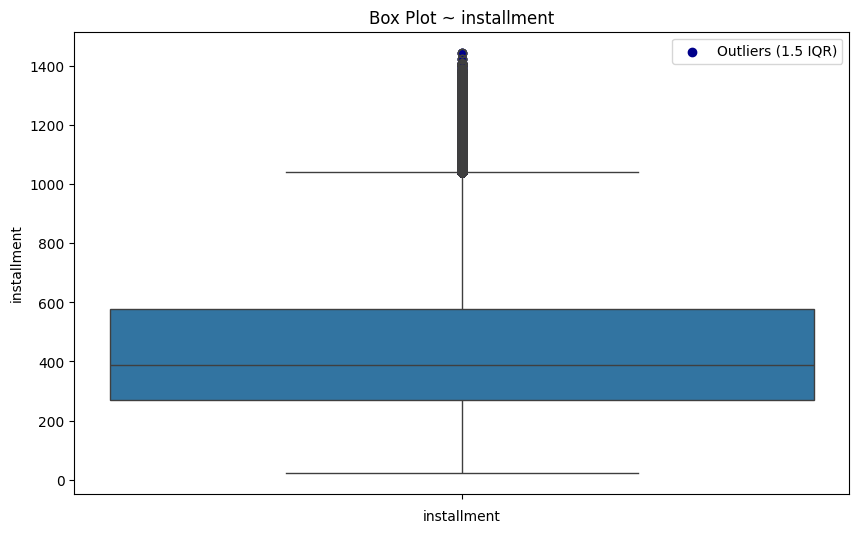

Total Extreme Outliers in installment: 0


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim


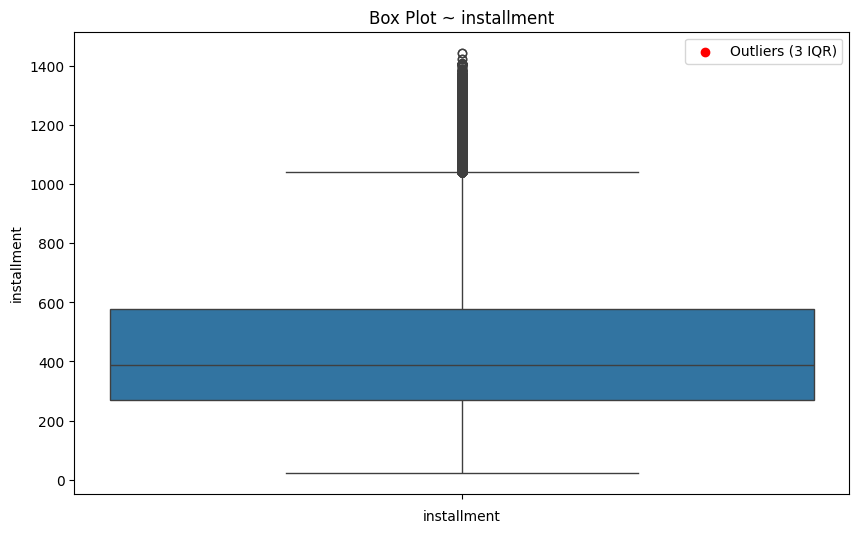

In [608]:
# Examine the regular outliers in the installment variable using the IQR method.
# Threshold = 1.5

installment_regular_outlier = outlier_detection_viz_1(interest_rate_df_cleaned_1,'installment')

# Examine the extreme outliers in the installment variable using the IQR method.
# Threshold = 3

installment_extreme_outlier = outlier_detection_viz_2(interest_rate_df_cleaned_1,'installment')

In [609]:
installment_regular_perc = installment_regular_outlier.shape[0] / interest_rate_df_cleaned_1.shape[0] * 100
print(installment_regular_perc)
# Key Insights --> Installment Variable
# The mean (442.383760) is moderately greater than the median and is expected to be positively skewed.
# This represents the monthly payment made by the borrower to repay the loan.
# The installment values were within an acceptabe range.
# Regular outliers were identified which accounted for 18864 observations ranging from $1000 to just over $1400.
# There were no extreme outliers for the installment variable.
# The regular outliers were retained which reflected variablility due to difference in loan amounts, term of the loan,
# interest rates and other associated factors.

2.490316754984198


##### 4.3.2 Interest Rate Variable

(757494, 53)
count    757494.000000
mean         13.313781
std           4.405783
min           5.320000
25%           9.990000
50%          12.990000
75%          16.290000
max          28.990000
Name: int_rate, dtype: float64
Coefficient of Variation (CV) for Interest Rate: 0.330918951658441
12.99


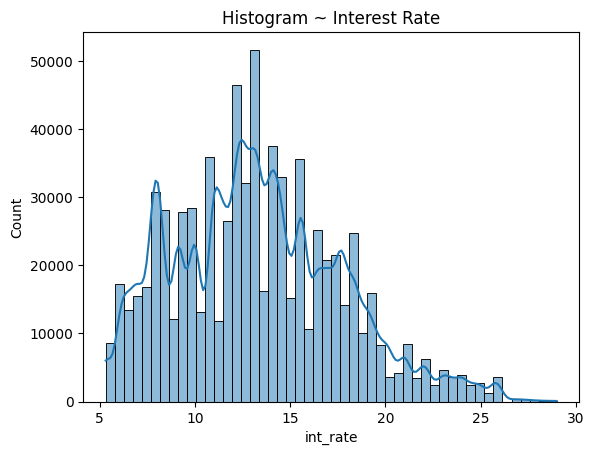

In [610]:
# Inspect the interest rate variable for outliers.
print(interest_rate_df_cleaned_1.shape) # (757494, 53)
print(interest_rate_df_cleaned_1['int_rate'].describe())

# Minimum Interest Rate --> 5.320000%
# Maximum Interest Rate --> 28.990000%
# Mean (Average) Interest Rate --> 13.313781%
# Median Interest Rate --> 12.99%
# The mean is slightly higher than the median. This suggests that the distribution is slightly right-skewed.

# Estimating the coefficient of variation (CV) for the interest rate variable.
mean_int_rate = interest_rate_df_cleaned_1['int_rate'].mean()
std_int_rate = interest_rate_df_cleaned_1['int_rate'].std()
cv_int_rate = std_int_rate / mean_int_rate

print('Coefficient of Variation (CV) for Interest Rate:', cv_int_rate)

# Estimating the median (Interest Rate)
print(np.median(interest_rate_df_cleaned_1['int_rate']))

# Inspecting the distribution of interest rate.
sns.histplot(interest_rate_df_cleaned_1['int_rate'],bins = 50,kde = True)
plt.title('Histogram ~ Interest Rate')
plt.show()

Examine the regular and extreme outliers --> Interest Rate Variable

Total Regular Outliers in int_rate: 4747


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
42655,10079427,11931054,19425.0,19425.0,19425.0,60 months,25.89,580.33,G,G3,...,580.33,Unknown,Dec-2015,0.0,1.0,INDIVIDUAL,0.0,80.0,38879.0,19800.0
42739,10069292,11920905,35000.0,35000.0,34975.0,36 months,25.80,1406.45,G,G1,...,16249.47,Unknown,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,45289.0,36600.0
42853,10129005,11980656,35000.0,35000.0,35000.0,60 months,26.06,1049.17,G,G5,...,33553.94,Unknown,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,63519.0,52600.0
42871,10069043,11920678,21200.0,21200.0,21200.0,60 months,25.99,634.62,G,G4,...,20320.30,Unknown,Sep-2014,0.0,1.0,INDIVIDUAL,0.0,0.0,268264.0,34300.0
43053,10068715,11920382,19425.0,19425.0,19425.0,60 months,25.83,579.65,G,G2,...,600.00,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,155180.0,5800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886804,37621554,40384511,19875.0,19875.0,19875.0,60 months,25.89,593.78,G,G3,...,593.78,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,327322.0,28100.0
887095,37770844,40533689,18975.0,18975.0,18975.0,36 months,25.83,762.80,G,G2,...,762.80,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,119778.0,9000.0
887159,37700602,40473386,26850.0,26850.0,26850.0,60 months,25.83,801.21,G,G2,...,25224.42,Unknown,Dec-2015,0.0,1.0,INDIVIDUAL,0.0,0.0,465998.0,35900.0
887177,37670482,40433236,24875.0,24875.0,24875.0,60 months,25.83,742.27,G,G2,...,742.27,Unknown,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,2218.0,116166.0,211700.0


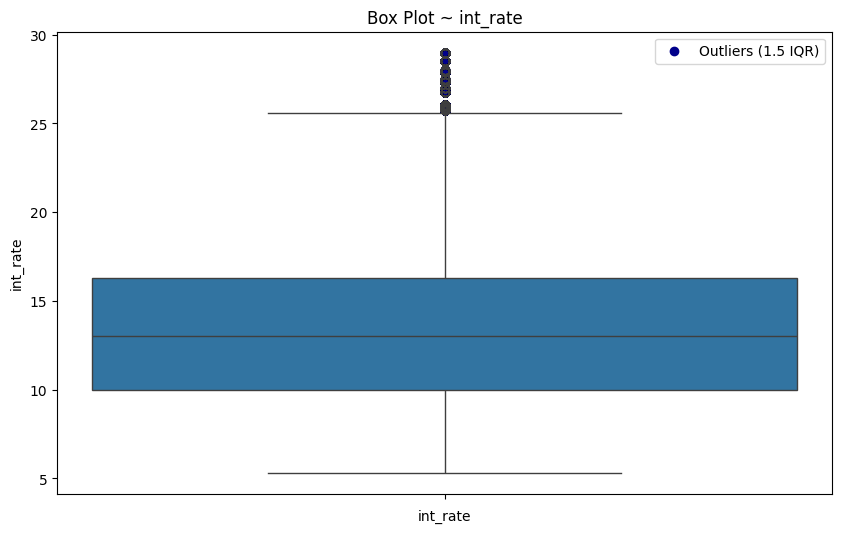

Total Extreme Outliers in int_rate: 0


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim


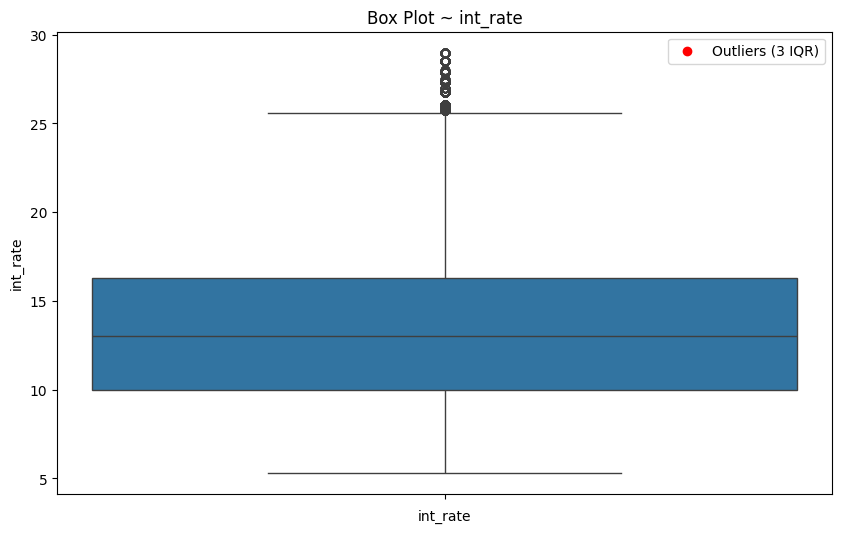

0.6266716304023531


In [611]:
# Examine the regular outliers in the interest rate variable using the IQR method.
# Threshold = 1.5

interest_rate_regular_outlier = outlier_detection_viz_1(interest_rate_df_cleaned_1,'int_rate')

# Examine the extreme outliers in the interest rate variable using the IQR method.
# Threshold = 3

interest_rate_extreme_outlier = outlier_detection_viz_2(interest_rate_df_cleaned_1,'int_rate')

# Regular Outliers --> Retain all observations as interest rates vary with the type of loan and borrower's characteristics.
# Extreme Outliers --> No extreme outliers that could cause signficant distrotion were found.
# Coefficient of Variation (CV) for Interest Rate --> 33.092% (indicates a high level of variability in interest rates)
#                                                 --> Indicates a diverse range of interest rates offered to borrowers based on different risk profiles,
#                                                     loan amounts and terms.

interest_rate_regular_perc = interest_rate_regular_outlier.shape[0] / interest_rate_df_cleaned_1.shape[0] * 100
print(interest_rate_regular_perc)

##### 4.3.3 Principal Outstanding (Borrower and Investor) Variable

count    757494.000000
mean       9098.549002
std        8448.137464
min           0.000000
25%        1081.390000
50%        7597.470000
75%       14316.755000
max       35000.000000
Name: out_prncp, dtype: float64


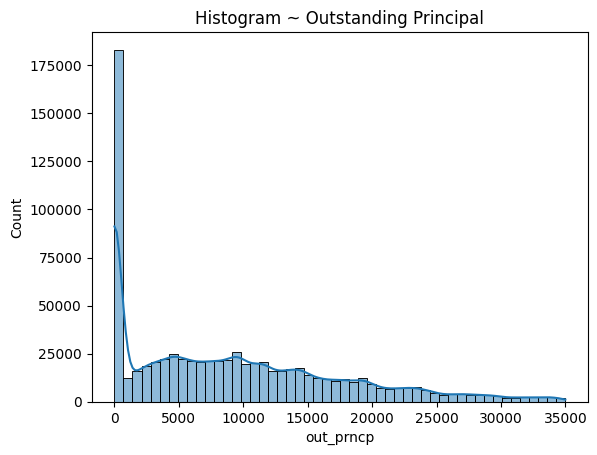

count    757494.000000
mean       9094.936791
std        8444.668661
min           0.000000
25%        1080.752500
50%        7593.660000
75%       14312.300000
max       35000.000000
Name: out_prncp_inv, dtype: float64


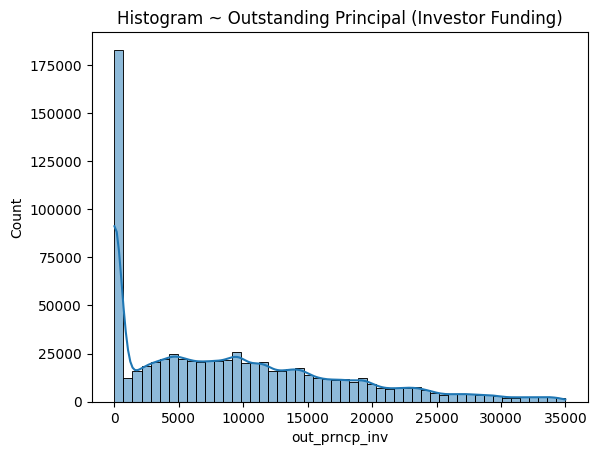

In [612]:
# Inspect the 'out_prncp' and 'out_prncp_inv' variable for outliers.

# Definition ['out_prncp'] --> The remaining amount of the original loan (excluding interest and fees).
# Definition ['out_prncp_inv'] --> The remaining amount of the original loan that the borrower owes to investor
                                   # that has funded the loan.

# Inspect the distribution of 'out_prncp' variable.
print(interest_rate_df_cleaned_1['out_prncp'].describe())
sns.histplot(interest_rate_df_cleaned_1['out_prncp'],bins = 50,kde = True)
plt.title('Histogram ~ Outstanding Principal')
plt.show()

# The mininimum 'out_prncp' is $0 and this indicates that there are loans that were fully paid off.
# The range of 'out_prncp' is $0 to $35000.
# The standard deviation of 'out_prncp' is $8448.137464 indicates a signfificant level of variability.
# This is quiet expected as there are different loan types, amounts ,duration (term) and borrower repayment profiles.
# Pre-dominance of loans have low outstanding principals and this indicates that most of the loans are closely to being
# paid off, while smaller proportions of loans have significant outstanding principal amounts.
# The distribution provides an indication of the repayment progress and the potential risk exposure of the Lending Club (LC).

# Inspect the distribution of 'out_prncp_inv' variable.
print(interest_rate_df_cleaned_1['out_prncp_inv'].describe())
sns.histplot(interest_rate_df_cleaned_1['out_prncp_inv'],bins = 50,kde = True)
plt.title('Histogram ~ Outstanding Principal (Investor Funding)')
plt.show()

# Key Insight --> The distribution of 'out_prncp_inv' is similar to 'out_prncp', indicating that the repayment progress aligns
#             --> in tandem with the settlement of investor funding.
#             --> The peak at low balances indicate that substantial amount of loans are nearing full repayment (this could be
#                 due to loans reaching their maturity or borrowers making larger payments to settle their debt).
#             --> The presence of long tail suggest that there are some loans that have signficant outstanding principal amounts
#                 for both the borrowers and investors, indicating that this might be newer loans or loans with longer repayment
#                 periods.

Examine the regular and extreme outliers --> Principal Outstanding (Borrower)

Total Regular Outliers in out_prncp: 2723


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
466285,68444620,73334399,35000.0,35000.0,35000.0,60 months,11.99,778.38,C,C1,...,0.00,Jan-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,321.0,146867.0,52200.0
466302,66310712,71035433,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,0.00,Jan-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,301500.0,67300.0
466333,68475450,73365245,35000.0,35000.0,35000.0,60 months,12.88,794.21,C,C2,...,0.00,Jan-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,299890.0,54200.0
466413,68466830,73356665,35000.0,35000.0,35000.0,36 months,13.99,1196.05,C,C4,...,0.00,Jan-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,201577.0,17900.0
466426,66574010,71299823,35000.0,35000.0,35000.0,36 months,13.99,1196.05,C,C4,...,0.00,Jan-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,52074.0,32700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
689106,55228406,58809124,35000.0,35000.0,35000.0,60 months,19.19,911.59,E,E3,...,911.59,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,46321.0,15400.0
693481,54524249,58104995,34800.0,34800.0,34800.0,60 months,16.55,856.48,D,D2,...,856.48,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,567.0,245527.0,69200.0
694340,54543547,58124273,35000.0,35000.0,35000.0,60 months,15.61,843.90,D,D1,...,843.90,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,49327.0,45400.0
706843,51939161,55368966,35000.0,35000.0,34975.0,60 months,22.99,986.47,F,F2,...,986.47,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,215300.0,57189.0


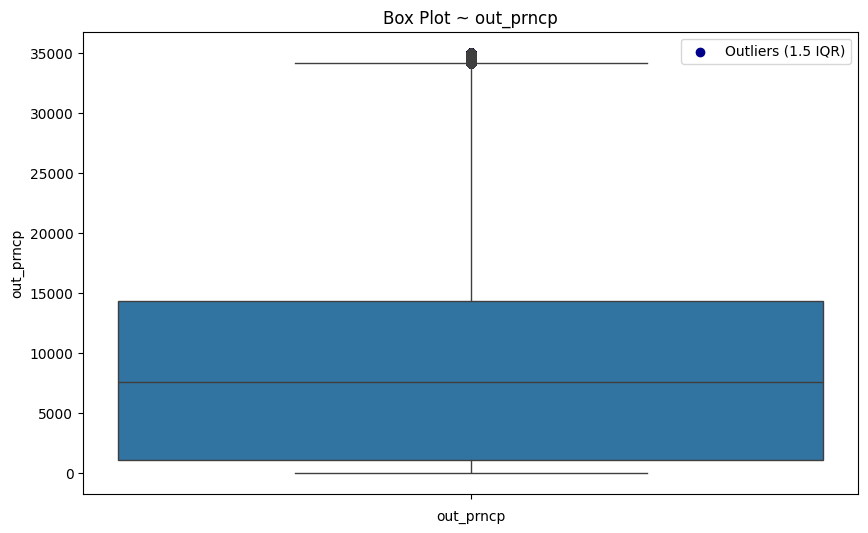

Total Extreme Outliers in out_prncp: 0


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim


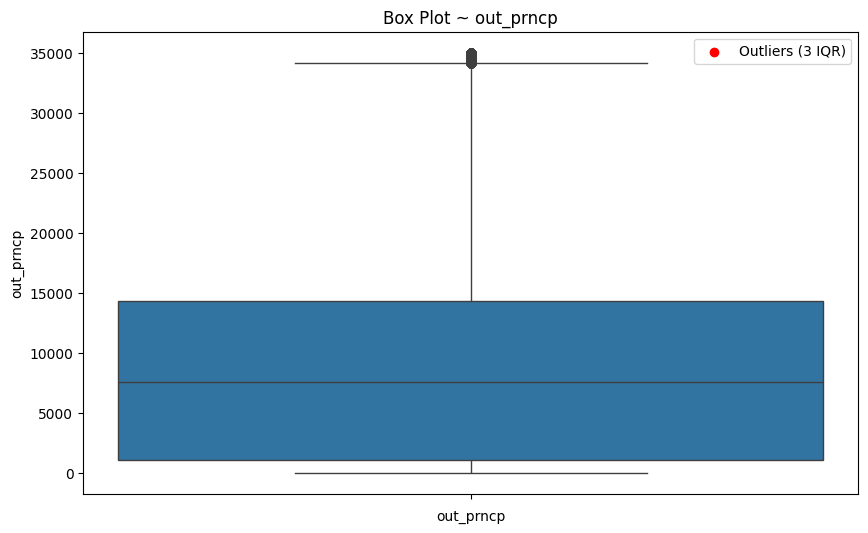

0.35947479451982456


In [613]:
# Inspect the outliers for 'out_prncp' variable using the IQR method
# Regular Outliers
# Threshold = 1.5

out_prncp_regular_outlier = outlier_detection_viz_1(interest_rate_df_cleaned_1,'out_prncp')
# 2723 regular outliers were identified.

# Extreme Outliers
# Threshold = 3

out_prncp_extreme_outlier = outlier_detection_viz_2(interest_rate_df_cleaned_1,'out_prncp')
# There were no extreme values for the 'out_prncp' variable and since these observations vary with the type of loan,
# duration and borrower's characteristics, they were retained.

out_prncp_regular_perc = out_prncp_regular_outlier.shape[0] / interest_rate_df_cleaned_1.shape[0] * 100
print(out_prncp_regular_perc)

Examine the regular and extreme outliers --> Principal Outstanding (Investor)

Total Regular Outliers in out_prncp_inv: 2676


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
466285,68444620,73334399,35000.0,35000.0,35000.0,60 months,11.99,778.38,C,C1,...,0.00,Jan-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,321.0,146867.0,52200.0
466302,66310712,71035433,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,0.00,Jan-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,301500.0,67300.0
466333,68475450,73365245,35000.0,35000.0,35000.0,60 months,12.88,794.21,C,C2,...,0.00,Jan-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,299890.0,54200.0
466413,68466830,73356665,35000.0,35000.0,35000.0,36 months,13.99,1196.05,C,C4,...,0.00,Jan-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,201577.0,17900.0
466426,66574010,71299823,35000.0,35000.0,35000.0,36 months,13.99,1196.05,C,C4,...,0.00,Jan-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,52074.0,32700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
689596,55128308,58699028,35000.0,35000.0,35000.0,60 months,13.33,802.29,C,C3,...,802.29,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,319760.0,100700.0
693481,54524249,58104995,34800.0,34800.0,34800.0,60 months,16.55,856.48,D,D2,...,856.48,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,567.0,245527.0,69200.0
694340,54543547,58124273,35000.0,35000.0,35000.0,60 months,15.61,843.90,D,D1,...,843.90,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,49327.0,45400.0
706843,51939161,55368966,35000.0,35000.0,34975.0,60 months,22.99,986.47,F,F2,...,986.47,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,215300.0,57189.0


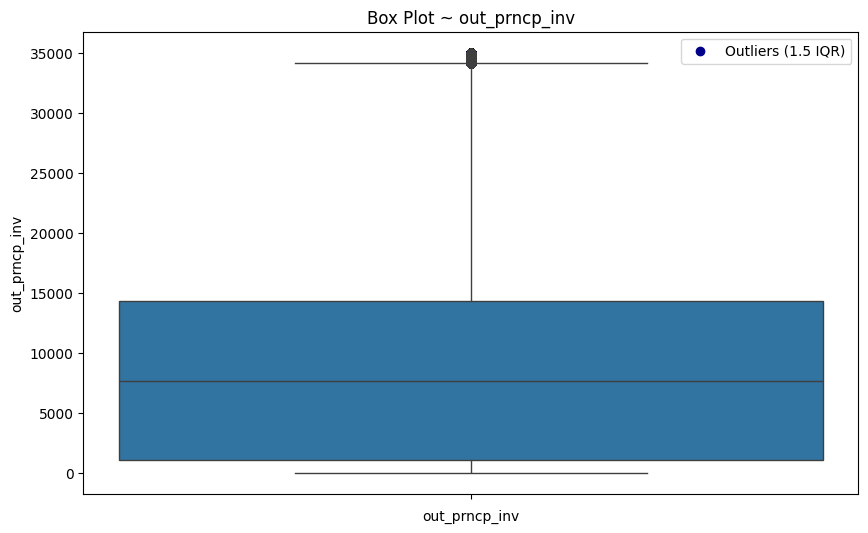

Total Extreme Outliers in out_prncp_inv: 0


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim


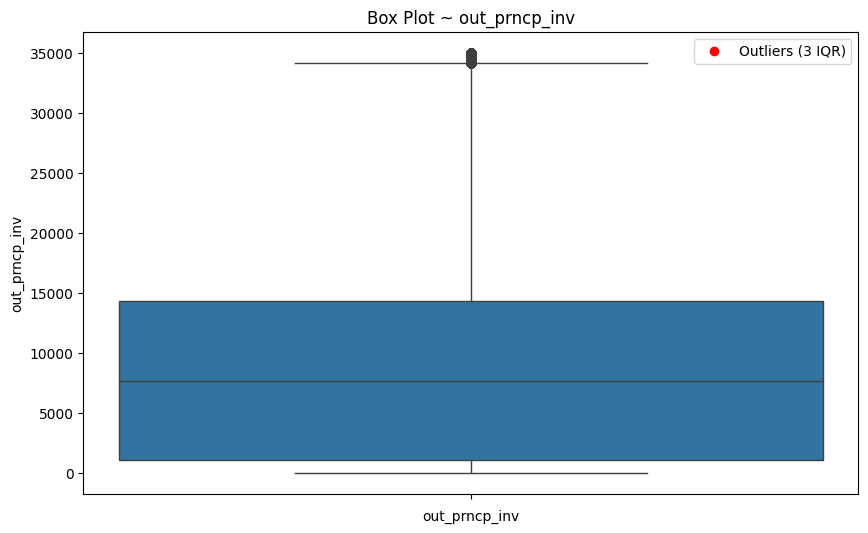

0.35327012491188053


In [614]:
# Inspect the outliers for 'out_prncp_inv' variable using the IQR method
# Regular Outliers
# Threshold = 1.5

out_prncp_inv_regular_outlier = outlier_detection_viz_1(interest_rate_df_cleaned_1,'out_prncp_inv')
# 2676 regular outliers were identified.

# Extreme Outliers
# Threshold = 3

out_prncp_inv_extreme_outlier = outlier_detection_viz_2(interest_rate_df_cleaned_1,'out_prncp_inv')
# There were no extreme values for the 'out_prncp' variable and since these observations vary with the type of loan,
# duration and borrower's characteristics, they were retained.

out_prncp_inv_regular_perc = out_prncp_inv_regular_outlier.shape[0] / interest_rate_df_cleaned_1.shape[0] * 100
print(out_prncp_inv_regular_perc)

##### 4.3.4 Delinquency,Inquires and Public Derogatory Records (Borrower)

In [615]:
print(borrower_history)
print(interest_rate_df_cleaned_1.shape) # (757494, 53)
print(interest_rate_df_cleaned_1[borrower_history].dtypes)

# delinq_2yrs
print(interest_rate_df_cleaned_1['delinq_2yrs'].unique())
# Discrete variable indicating the number of 30+ days past due incidences of delinquency in
# the borrower's credit file for the past 2 years.
# This represents the specific incidence of delinquency for the borrower and therefore must
# not be included for outlier detection.

# inq_last_6mths
print(interest_rate_df_cleaned_1['inq_last_6mths'].unique())
# This represents the number of times that the borrower's credit profile was reviewed in the last 6 months.
# This typically does not include enquiries made for auto and mortgage loans.
# This is similar to the 'delinq_2yrs' variable where it represents the specific incident, so there might be
# instances where there have been zero enquiries and this could show up as an outlier in the lower bound, while
# there might be instances where there might be larger enquiries for the borrower and this could be flagged as an outlier.
# Therefore, this variable does not need to be included for outlier detection.

# pub_rec
print(interest_rate_df_cleaned_1['pub_rec'].unique())
# This represents the number of derogatory public records that the borrower has had in their credit file.
# Derogatory public records typically include bankruptcy filings, tax liens, or judgments
# This suggest that the borrower had past negative credit records, which could potentially indicate a higher risk
# for lenders.
# This variable represents a specific event in the borrower's credit file and therefore must not be included for outlier detection.

['delinq_2yrs', 'inq_last_6mths', 'pub_rec', 'recoveries', 'total_rec_late_fee']
(757494, 53)
delinq_2yrs           float64
inq_last_6mths        float64
pub_rec               float64
recoveries            float64
total_rec_late_fee    float64
dtype: object
[ 0.  1.  2.  6.  4.  3.  5.  7.  8.  9. 15. 11. 13. 10. 12. 17. 18. 29.
 24. 14. 21. 22. 19. 16. 30. 26. 20. 27. 39.]
[0. 1. 2. 4. 3. 5. 6. 7. 8.]
[ 0.  2.  1.  3.  4.  5.  6.  9.  7.  8. 11. 49. 10. 54. 12. 18. 19. 15.
 40. 63. 13. 34. 17. 23. 26. 28. 20. 86. 21. 14. 16. 22.]


##### 4.3.5 Recoveries Variable

[    0.    2760.67  2519.14 ...  3472.03 21941.26  1413.48]
count    757494.000000
mean         40.231105
std         374.384245
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       33520.270000
Name: recoveries, dtype: float64


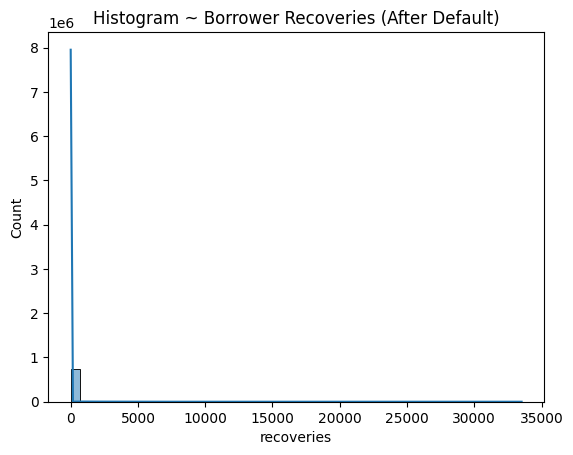

In [616]:
# recoveries
print(interest_rate_df_cleaned_1['recoveries'].unique())
# This represents the amount of money recovered from the borrower after defaulting on a loan.
# Represents the funds collected by lenders or debt collectors.
# This is a continuos numerical variable and inspect for incorrect observations or anomalies.

# Inspect the distribution of'recoveries' variable.
print(interest_rate_df_cleaned_1['recoveries'].describe())
sns.histplot(interest_rate_df_cleaned_1['recoveries'],bins = 50,kde = True)
plt.title('Histogram ~ Borrower Recoveries (After Default)')
plt.show()

# Key Observations:
# It is evident that the 'recoveries' variable has a right-skewed distribution.
# Most of the borrowers have paid of their debts on schedule without any recoveries and hence the
# concentration of data points close to zero.
# There is a small percentage of borrower and notably one obsertavtion with a sustabtial recovery
# amount that extends the right tail of the distribution (needs further inspection).

##### Examine the regular and extreme outliers --> Recoveries

Total Regular Outliers in recoveries: 15359


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
42719,10129286,11980914,20000.0,20000.0,19950.0,36 months,8.90,635.07,A,A5,...,0.00,Unknown,May-2014,0.0,1.0,INDIVIDUAL,0.0,0.0,524723.0,43200.0
42741,5978043,7450480,20000.0,20000.0,20000.0,60 months,15.61,482.23,C,C4,...,988.57,Unknown,Apr-2015,0.0,1.0,INDIVIDUAL,0.0,0.0,424646.0,48200.0
42782,10159035,12010682,5750.0,5750.0,5750.0,36 months,18.25,208.60,D,D3,...,208.60,Unknown,May-2015,0.0,1.0,INDIVIDUAL,0.0,0.0,26872.0,7700.0
42822,10089117,11940692,16000.0,16000.0,16000.0,36 months,16.24,564.42,C,C5,...,564.42,Unknown,Dec-2014,0.0,1.0,INDIVIDUAL,0.0,0.0,44168.0,22300.0
42858,10068926,11920569,30000.0,30000.0,30000.0,36 months,18.25,1088.34,D,D3,...,1088.34,Unknown,May-2015,0.0,1.0,INDIVIDUAL,0.0,0.0,345250.0,115500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886020,37670882,40433721,35000.0,35000.0,35000.0,60 months,23.99,1006.68,F,F2,...,1006.68,Unknown,Jul-2015,0.0,1.0,INDIVIDUAL,0.0,0.0,222509.0,62700.0
886421,36341252,39072651,16575.0,16575.0,16575.0,60 months,24.99,486.41,F,F4,...,486.41,Unknown,Jul-2015,0.0,1.0,INDIVIDUAL,0.0,0.0,37771.0,50500.0
886627,37741722,40504725,18000.0,18000.0,18000.0,60 months,9.49,377.95,B,B2,...,0.00,Unknown,Apr-2015,0.0,1.0,INDIVIDUAL,0.0,0.0,12261.0,17000.0
886937,37611321,40374297,8000.0,8000.0,8000.0,36 months,9.49,256.23,B,B2,...,0.00,Unknown,Jun-2015,0.0,1.0,INDIVIDUAL,0.0,0.0,3477.0,5300.0


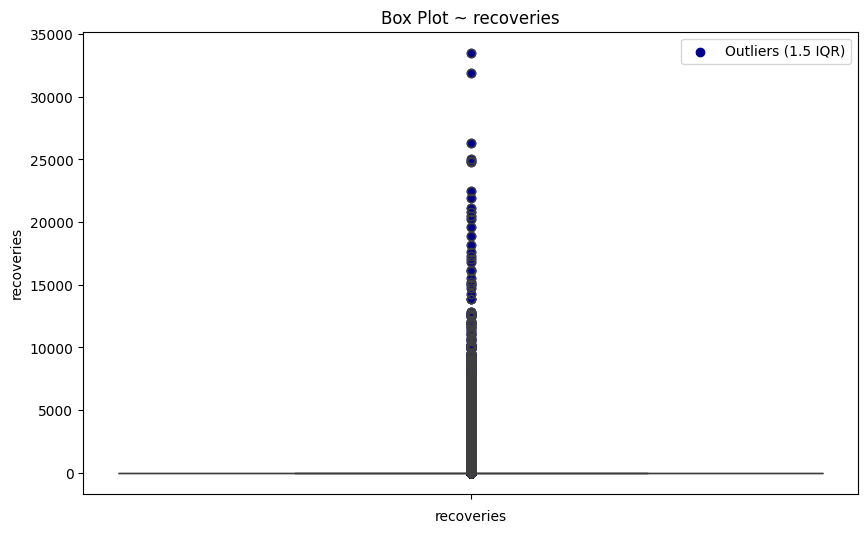

Total Extreme Outliers in recoveries: 15359


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
42719,10129286,11980914,20000.0,20000.0,19950.0,36 months,8.90,635.07,A,A5,...,0.00,Unknown,May-2014,0.0,1.0,INDIVIDUAL,0.0,0.0,524723.0,43200.0
42741,5978043,7450480,20000.0,20000.0,20000.0,60 months,15.61,482.23,C,C4,...,988.57,Unknown,Apr-2015,0.0,1.0,INDIVIDUAL,0.0,0.0,424646.0,48200.0
42782,10159035,12010682,5750.0,5750.0,5750.0,36 months,18.25,208.60,D,D3,...,208.60,Unknown,May-2015,0.0,1.0,INDIVIDUAL,0.0,0.0,26872.0,7700.0
42822,10089117,11940692,16000.0,16000.0,16000.0,36 months,16.24,564.42,C,C5,...,564.42,Unknown,Dec-2014,0.0,1.0,INDIVIDUAL,0.0,0.0,44168.0,22300.0
42858,10068926,11920569,30000.0,30000.0,30000.0,36 months,18.25,1088.34,D,D3,...,1088.34,Unknown,May-2015,0.0,1.0,INDIVIDUAL,0.0,0.0,345250.0,115500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886020,37670882,40433721,35000.0,35000.0,35000.0,60 months,23.99,1006.68,F,F2,...,1006.68,Unknown,Jul-2015,0.0,1.0,INDIVIDUAL,0.0,0.0,222509.0,62700.0
886421,36341252,39072651,16575.0,16575.0,16575.0,60 months,24.99,486.41,F,F4,...,486.41,Unknown,Jul-2015,0.0,1.0,INDIVIDUAL,0.0,0.0,37771.0,50500.0
886627,37741722,40504725,18000.0,18000.0,18000.0,60 months,9.49,377.95,B,B2,...,0.00,Unknown,Apr-2015,0.0,1.0,INDIVIDUAL,0.0,0.0,12261.0,17000.0
886937,37611321,40374297,8000.0,8000.0,8000.0,36 months,9.49,256.23,B,B2,...,0.00,Unknown,Jun-2015,0.0,1.0,INDIVIDUAL,0.0,0.0,3477.0,5300.0


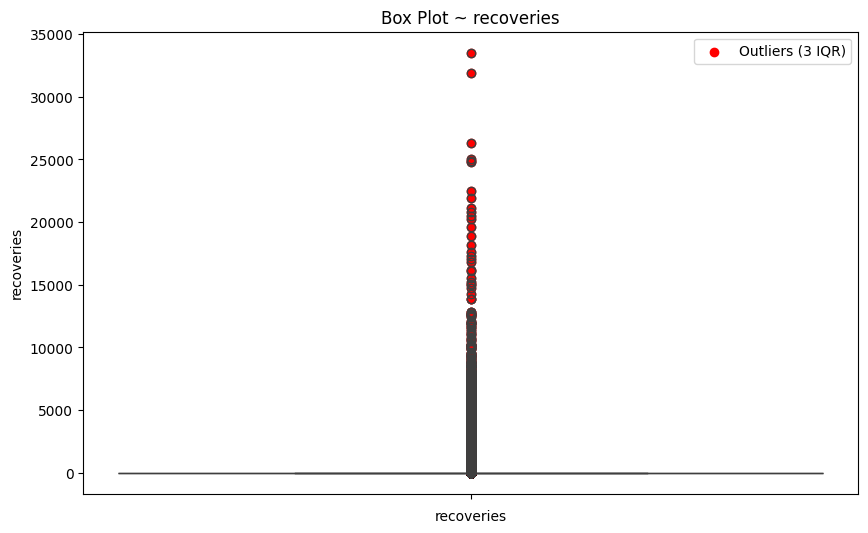

In [617]:
# Inspect the outliers for 'recoveries' variable using the IQR method
# Regular Outliers
# Threshold = 1.5

recoveries_regular_outlier = outlier_detection_viz_1(interest_rate_df_cleaned_1,'recoveries')
# 15359 regular outliers identified.

# Extreme Outliers
# Threshold = 3

recoveries_extreme_outlier,lower_bound,upper_bound = outlier_detection_viz_2(interest_rate_df_cleaned_1,'recoveries')
# All the regular outliers are extreme outliers (identical to the 1.5 threshold).

##### Inspect the maximum and zero recovery amounts

In [618]:
# Inspect the observation with maximum recovery amount
print(interest_rate_df_cleaned_1.shape)
print(interest_rate_df_cleaned_1['recoveries'].max())

recoveries_max_inspect = interest_rate_df_cleaned_1[interest_rate_df_cleaned_1['recoveries'] == interest_rate_df_cleaned_1['recoveries'].max()]
selected_columns = [
    'loan_amnt',
    'int_rate',
    'loan_status',
    'purpose',
    'recoveries',
    'annual_inc'
]
display(recoveries_max_inspect[selected_columns])

percentage_recoveries_extreme = recoveries_extreme_outlier.shape[0] / interest_rate_df_cleaned_1.shape[0]
print(percentage_recoveries_extreme)

# Lets just do a pre-liminary examination of what the upper and lower bounds are for both the threshold (1.5 and 3)
print(interest_rate_df_cleaned_1['recoveries'].describe())

# Lets check the number of values where the recoveries is zero.
recoveries_zero_count = interest_rate_df_cleaned_1[interest_rate_df_cleaned_1['recoveries'] == 0]
print(len(recoveries_zero_count)) # 742135 borrowers have zero recoveries (Significant proportion of borrowers have repaid their debt).

(757494, 53)
33520.27


,loan_amnt,int_rate,loan_status,purpose,recoveries,annual_inc
202939,30000.0,23.63,Charged Off,debt_consolidation,33520.27,156000.0


0.020276068193279418
count    757494.000000
mean         40.231105
std         374.384245
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       33520.270000
Name: recoveries, dtype: float64
742135


##### Apply Isolation Forest to detect anomalies in the recoveries variable

In [619]:
# Lets create a copy of the orginal data frame before applying Isolation Forest.
interest_rate_df_cleaned_2 = interest_rate_df_cleaned_1.copy()
recoveries_contamination_value = recoveries_extreme_outlier.shape[0] / interest_rate_df_cleaned_2.shape[0]
print(recoveries_contamination_value)

# Create an Isolation Forest Model for anomaly detection in 'recoveries' variable.
isolation_forest_recoveries = IsolationForest(contamination = recoveries_contamination_value,random_state = 42)
isolation_forest_recoveries.fit(interest_rate_df_cleaned_2[['recoveries']])

# Predict the anomalies for the recoveries variable where 1 dictates normal observations and -1 denotes anomalies.
interest_rate_df_cleaned_2['recoveries_anomaly'] = isolation_forest_recoveries.predict(interest_rate_df_cleaned_2[['recoveries']])

# Obtain the anomaly scores for the recoveries variable.
interest_rate_df_cleaned_2['recoveries_anomaly_score'] = isolation_forest_recoveries.decision_function(interest_rate_df_cleaned_2[['recoveries']])

# Extract the anomalies in a separate dataframe for inspection.
recoveries_anomalies = interest_rate_df_cleaned_2[interest_rate_df_cleaned_2['recoveries_anomaly'] == -1]

# View the recoveries, recoveries_anomaly, and the corresponding recoveries_anomaly_score
recoveries_anomalies_inspect = recoveries_anomalies[['recoveries','recoveries_anomaly','recoveries_anomaly_score']]
display(recoveries_anomalies_inspect)

# Recoveries Anomalies (Descriptive Statistics)
display(recoveries_anomalies_inspect.describe())

0.020276068193279418


,recoveries,recoveries_anomaly,recoveries_anomaly_score
42719,2760.67,-1,-0.404203
42741,2519.14,-1,-0.403073
42782,620.96,-1,-0.321730
42822,1960.50,-1,-0.389075
42858,3247.09,-1,-0.413299
...,...,...,...
886020,6459.61,-1,-0.432374
886421,3472.03,-1,-0.418459
886627,21941.26,-1,-0.432959
886937,1413.48,-1,-0.373993


,recoveries,recoveries_anomaly,recoveries_anomaly_score
count,15359.000000,15359.0,15359.000000
mean,1984.166989,-1.0,-0.354929
std,1748.100380,0.0,0.087153
min,3.600000,-1.0,-0.432959
25%,815.100000,-1.0,-0.404203
50%,1589.190000,-1.0,-0.379043
75%,2711.040000,-1.0,-0.344542
max,33520.270000,-1.0,-0.005300


##### Remove the anomalies from the dataset and inspect the effect

In [620]:
print(interest_rate_df_cleaned_2.shape)
print(recoveries_anomalies.shape)

# Analysis of anomalies
# IQR method identified 15359 extreme outliers in the recoveries variable.
# Isolation Forest identified 15359 anomalies in the recoveries variable.
# Both the methods resulted in the same extreme outliers and this validates the stated approach.
# Remove the anomalies from the dataset and visualize the effect of anomaly removal.

# Create a cleaned_df_2 --> with the recoveries variable (recoveries) handled for outliers.
interest_rate_df_cleaned_2 = interest_rate_df_cleaned_2[interest_rate_df_cleaned_2['recoveries_anomaly'] != -1]

# Drop the recoveries_anomaly and recoveries_anomaly_score columns from the cleaned_df_2.
interest_rate_df_cleaned_2 = interest_rate_df_cleaned_2.drop(columns = ['recoveries_anomaly','recoveries_anomaly_score'])

# View the cleaned_df_2
print(interest_rate_df_cleaned_2.shape)
display(interest_rate_df_cleaned_2.head())

print(interest_rate_df_cleaned_2['recoveries'].describe())

(757494, 55)
(15359, 55)
(742135, 53)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
42535,10149342,12000897,27050.0,27050.0,27050.0,36 months,10.99,885.46,B,B2,...,885.46,Feb-2016,Dec-2015,0.0,1.0,INDIVIDUAL,0.0,0.0,114834.0,59900.0
42536,10159584,12011200,9750.0,9750.0,9750.0,36 months,13.98,333.14,C,C1,...,333.14,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,14123.0,15100.0
42537,10159498,1319523,12000.0,12000.0,12000.0,36 months,6.62,368.45,A,A2,...,368.45,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,267646.0,61100.0
42538,10139658,11991209,12000.0,12000.0,12000.0,36 months,13.53,407.40,B,B5,...,119.17,Unknown,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,15386.0,13605.0,8100.0
42539,10159548,12011167,15000.0,15000.0,15000.0,36 months,8.90,476.30,A,A5,...,476.30,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,1514.0,272492.0,15400.0


count    742135.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: recoveries, dtype: float64


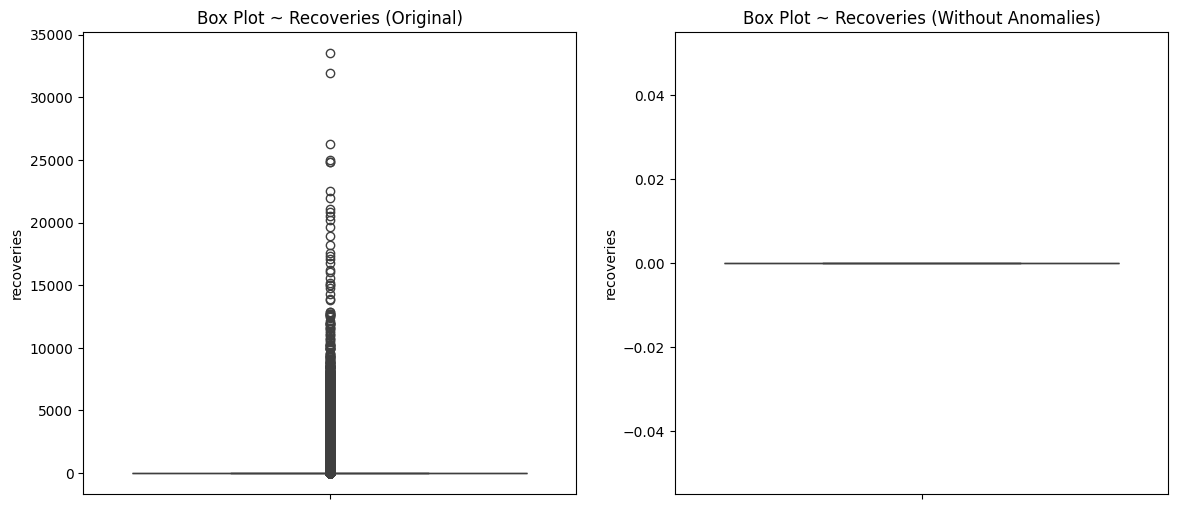

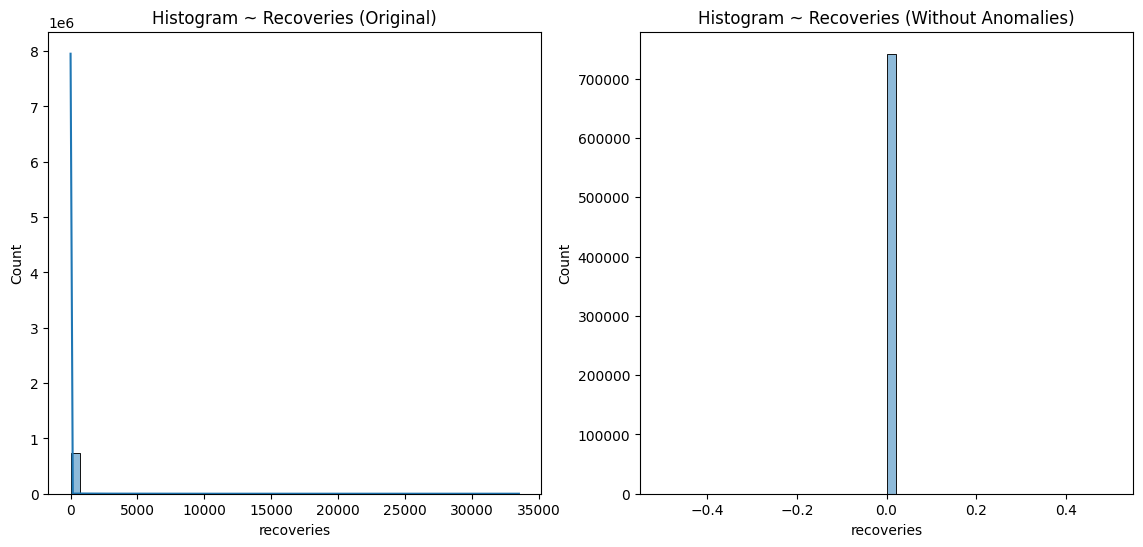

In [621]:
# Inspect the impact of anomaly removal on the distribution of recoveries.
plt.figure(figsize = (14,6))

# Box Plot Before Anomaly Removal
plt.subplot(1,2,1)
sns.boxplot(y = interest_rate_df_cleaned_1['recoveries'])
plt.title('Box Plot ~ Recoveries (Original)')

# Box Plot After Anomaly Removal
plt.subplot(1,2,2)
sns.boxplot(y = interest_rate_df_cleaned_2['recoveries'])
plt.title('Box Plot ~ Recoveries (Without Anomalies)')

plt.show()

plt.figure(figsize=(14,6))

# Histogram Before Anomaly Removal
plt.subplot(1,2,1)
sns.histplot(interest_rate_df_cleaned_1['recoveries'],bins = 50,kde = True)
plt.title('Histogram ~ Recoveries (Original)')

# Histogram After Anomaly Removal
plt.subplot(1,2,2)
sns.histplot(interest_rate_df_cleaned_2['recoveries'],bins = 50,kde = True)
plt.title('Histogram ~ Recoveries (Without Anomalies)')

plt.show()

##### Key Observations --> Recoveries Variable

In [622]:
# The distribution of recoveries after anomaly removal has retained only observations where the
# recoveries amount is zero and therefore this indicates that there are substantial recoveries that
# need to be accounted for and removing these outliers might not represent the true nature of the
# distribution (indicating biasing the result only for borroweres without any recoveries).
# Hence, these values should be retained as this could indicate borrowers defaulting and subsequent recoveries
# which might reflect critical information about borrower behaviour and loan performance.

(757494, 53)
count    757494.000000
mean         40.231105
std         374.384245
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       33520.270000
Name: recoveries, dtype: float64


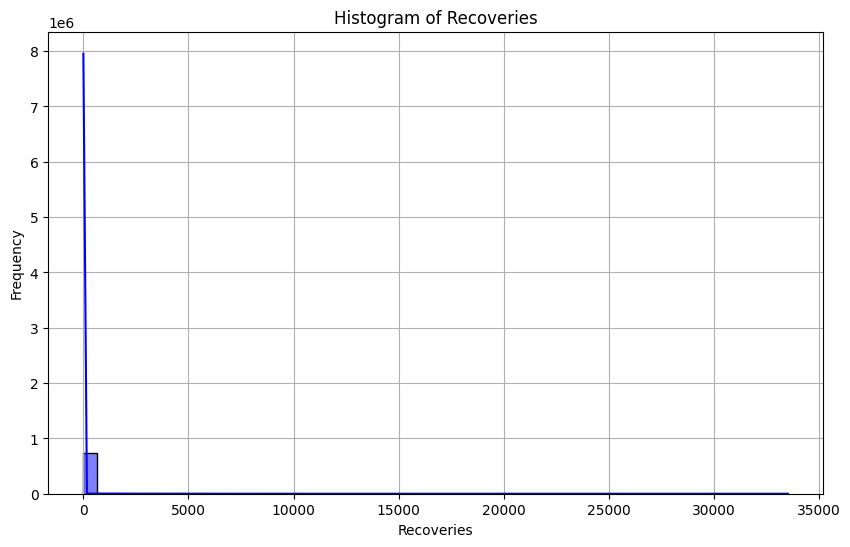

In [623]:
# Inspect the distribution of recoveries on the interest_rate_df_cleaned_1 dataframe ensuring the
# values are still intact.
print(interest_rate_df_cleaned_1.shape)
print(interest_rate_df_cleaned_1['recoveries'].describe())
plt.figure(figsize = (10,6))
sns.histplot(interest_rate_df_cleaned_1['recoveries'],bins = 50,color = 'blue',kde = True)
plt.title('Histogram of Recoveries')
plt.xlabel('Recoveries')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

##### 4.3.6 Late Fees (Recoveries)

##### Examine the regular and extreme outliers --> Late Fees (Recoveries)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object')
count    757494.000000
mean          0.319263
std           3.643669
min       

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
42550,10149566,12001108,8000.0,8000.0,8000.0,36 months,10.99,261.88,B,B2,...,276.88,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,15949.0,20800.0
42556,10119540,9331570,21000.0,21000.0,21000.0,36 months,7.62,654.39,A,A3,...,654.39,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,364707.0,27700.0
42652,10079340,1970911,6000.0,6000.0,6000.0,36 months,18.25,217.67,D,D3,...,450.34,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,256188.0,9900.0
42692,10099377,11950983,15000.0,15000.0,15000.0,60 months,19.22,390.93,D,D4,...,390.93,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,186684.0,17000.0
42741,5978043,7450480,20000.0,20000.0,20000.0,60 months,15.61,482.23,C,C4,...,988.57,Unknown,Apr-2015,0.0,1.0,INDIVIDUAL,0.0,0.0,424646.0,48200.0


8597
Total Regular Outliers in total_rec_late_fee: 8597


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
42550,10149566,12001108,8000.0,8000.0,8000.0,36 months,10.99,261.88,B,B2,...,276.88,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,15949.0,20800.0
42556,10119540,9331570,21000.0,21000.0,21000.0,36 months,7.62,654.39,A,A3,...,654.39,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,364707.0,27700.0
42652,10079340,1970911,6000.0,6000.0,6000.0,36 months,18.25,217.67,D,D3,...,450.34,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,256188.0,9900.0
42692,10099377,11950983,15000.0,15000.0,15000.0,60 months,19.22,390.93,D,D4,...,390.93,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,186684.0,17000.0
42741,5978043,7450480,20000.0,20000.0,20000.0,60 months,15.61,482.23,C,C4,...,988.57,Unknown,Apr-2015,0.0,1.0,INDIVIDUAL,0.0,0.0,424646.0,48200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887077,37329129,40091841,8000.0,8000.0,8000.0,36 months,11.99,265.68,B,B5,...,265.68,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,3790.0,3700.0
887155,37650537,40413292,15000.0,15000.0,15000.0,60 months,11.44,329.44,B,B4,...,362.12,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,19680.0,29500.0
887268,37297854,40040662,20000.0,20000.0,20000.0,36 months,14.99,693.21,C,C5,...,100.00,Unknown,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,359329.0,38300.0
887273,37157904,39930697,30000.0,30000.0,30000.0,60 months,10.49,644.67,B,B3,...,644.67,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,258688.0,95300.0


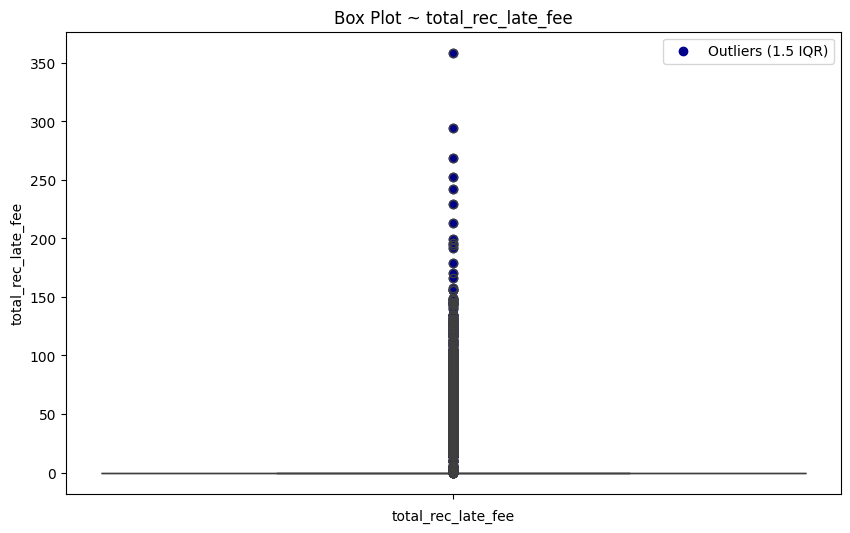

Total Extreme Outliers in total_rec_late_fee: 8597


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
42550,10149566,12001108,8000.0,8000.0,8000.0,36 months,10.99,261.88,B,B2,...,276.88,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,15949.0,20800.0
42556,10119540,9331570,21000.0,21000.0,21000.0,36 months,7.62,654.39,A,A3,...,654.39,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,364707.0,27700.0
42652,10079340,1970911,6000.0,6000.0,6000.0,36 months,18.25,217.67,D,D3,...,450.34,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,256188.0,9900.0
42692,10099377,11950983,15000.0,15000.0,15000.0,60 months,19.22,390.93,D,D4,...,390.93,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,186684.0,17000.0
42741,5978043,7450480,20000.0,20000.0,20000.0,60 months,15.61,482.23,C,C4,...,988.57,Unknown,Apr-2015,0.0,1.0,INDIVIDUAL,0.0,0.0,424646.0,48200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887077,37329129,40091841,8000.0,8000.0,8000.0,36 months,11.99,265.68,B,B5,...,265.68,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,3790.0,3700.0
887155,37650537,40413292,15000.0,15000.0,15000.0,60 months,11.44,329.44,B,B4,...,362.12,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,19680.0,29500.0
887268,37297854,40040662,20000.0,20000.0,20000.0,36 months,14.99,693.21,C,C5,...,100.00,Unknown,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,359329.0,38300.0
887273,37157904,39930697,30000.0,30000.0,30000.0,60 months,10.49,644.67,B,B3,...,644.67,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,258688.0,95300.0


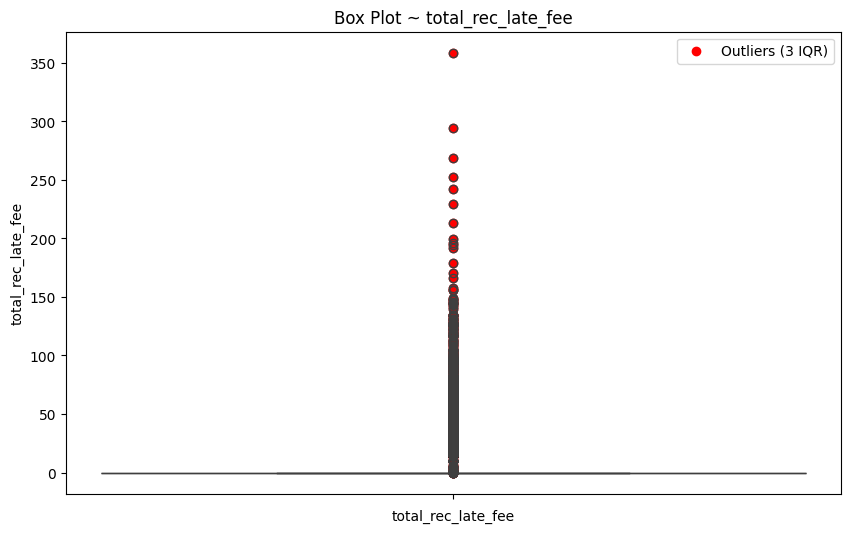

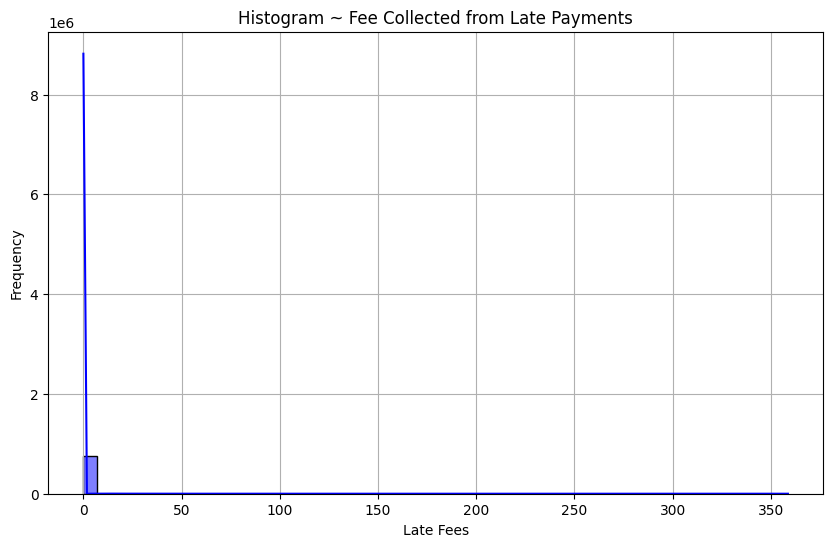

In [624]:
print(interest_rate_df_cleaned_1.columns)
# Inspect the distribution of total_rec_late_fee
print(interest_rate_df_cleaned_1['total_rec_late_fee'].describe())
# The total amount of fee that is collected from borrowers for late payments.
# Inspect the non-zero values of the total_rec_late_fee.
non_zero_late_fee = interest_rate_df_cleaned_1[interest_rate_df_cleaned_1['total_rec_late_fee']!= 0]
display(non_zero_late_fee.head())
print(len(non_zero_late_fee))

# Inspect the regular and extreme outliers in the total_rec_late_fee variable.
late_fee_regular_outliers = outlier_detection_viz_1(interest_rate_df_cleaned_1,'total_rec_late_fee')
late_fee_extreme_outliers = outlier_detection_viz_2(interest_rate_df_cleaned_1,'total_rec_late_fee')

# Histogram of total_rec_late_fee
plt.figure(figsize = (10,6))
sns.histplot(interest_rate_df_cleaned_1['total_rec_late_fee'],bins = 50,color = 'blue',kde = True)
plt.title('Histogram ~ Fee Collected from Late Payments')
plt.xlabel('Late Fees')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

##### Key Observations --> Late Fees (Recoveries)

In [625]:
# Analysis and Insights:

# This is similar to the recoveries variable, where the outlier characteristics are similar in nature.
# The removal of outliers would exclude the non-zero late fees (penalties) for recoveries and therefore bias the analysis
# for borrowers who have not defaulted on payments.

# Conclusion:
# Based on these points, it makes sense to retain the outliers in the "total_rec_late_fee" variable.
# This approach ensures that the analysis accurately reflects the financial impact of late payments and provides valuable insights into
# borrower behavior and risk.

##### 4.4 Payments Information Variables

##### 4.4.1 Examine the regular and extreme outliers --> Last Payment Amount

count    757494.000000
mean       2122.563854
std        4794.821158
min           0.000000
25%         284.350000
50%         459.670000
75%         785.620000
max       36475.590000
Name: last_pymnt_amnt, dtype: float64
Total Regular Outliers in last_pymnt_amnt: 125205


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
42544,10179520,12031088,3000.0,3000.0,3000.0,36 months,12.85,100.87,B,B4,...,2677.23,Unknown,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,154.0,19530.0,5300.0
42549,10127816,11979581,24000.0,24000.0,24000.0,36 months,13.53,814.80,B,B5,...,10726.61,Unknown,Dec-2015,0.0,1.0,INDIVIDUAL,0.0,539.0,199834.0,28200.0
42552,10148818,12000415,15000.0,15000.0,15000.0,36 months,14.47,516.10,C,C2,...,14150.76,Unknown,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,13038.0,25800.0
42554,10149488,12001033,4800.0,4800.0,4800.0,36 months,10.99,157.13,B,B2,...,3900.48,Unknown,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,4136.0,25700.0
42555,10129506,11981122,20800.0,20800.0,20800.0,36 months,13.53,706.16,B,B5,...,13334.93,Unknown,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,23473.0,43100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887332,37187152,39959868,15000.0,15000.0,15000.0,36 months,12.39,501.02,C,C1,...,12683.97,Unknown,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,186375.0,39000.0
887346,36808246,39560970,6000.0,6000.0,6000.0,36 months,10.49,194.99,B,B3,...,4717.46,Unknown,Nov-2015,0.0,1.0,INDIVIDUAL,0.0,2140.0,4419.0,43400.0
887364,36231718,38943165,10775.0,10775.0,10775.0,36 months,6.03,327.95,A,A1,...,9439.34,Unknown,Jun-2015,0.0,1.0,INDIVIDUAL,0.0,0.0,24696.0,41700.0
887366,36241316,38952731,6225.0,6225.0,6225.0,36 months,16.49,220.37,D,D3,...,4858.17,Unknown,Dec-2015,0.0,1.0,INDIVIDUAL,0.0,0.0,8357.0,1800.0


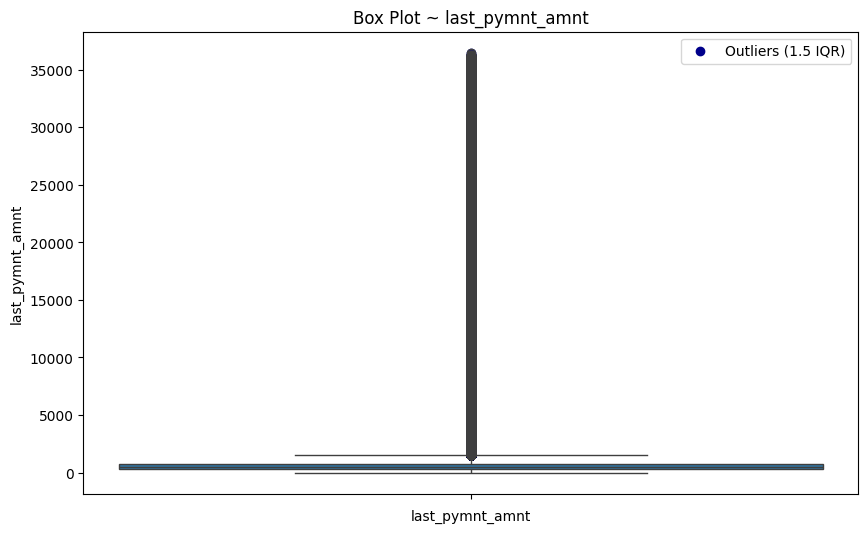

Total Extreme Outliers in last_pymnt_amnt: 119408


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
42544,10179520,12031088,3000.0,3000.0,3000.0,36 months,12.85,100.87,B,B4,...,2677.23,Unknown,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,154.0,19530.0,5300.0
42549,10127816,11979581,24000.0,24000.0,24000.0,36 months,13.53,814.80,B,B5,...,10726.61,Unknown,Dec-2015,0.0,1.0,INDIVIDUAL,0.0,539.0,199834.0,28200.0
42552,10148818,12000415,15000.0,15000.0,15000.0,36 months,14.47,516.10,C,C2,...,14150.76,Unknown,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,13038.0,25800.0
42554,10149488,12001033,4800.0,4800.0,4800.0,36 months,10.99,157.13,B,B2,...,3900.48,Unknown,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,4136.0,25700.0
42555,10129506,11981122,20800.0,20800.0,20800.0,36 months,13.53,706.16,B,B5,...,13334.93,Unknown,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,23473.0,43100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887332,37187152,39959868,15000.0,15000.0,15000.0,36 months,12.39,501.02,C,C1,...,12683.97,Unknown,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,186375.0,39000.0
887346,36808246,39560970,6000.0,6000.0,6000.0,36 months,10.49,194.99,B,B3,...,4717.46,Unknown,Nov-2015,0.0,1.0,INDIVIDUAL,0.0,2140.0,4419.0,43400.0
887364,36231718,38943165,10775.0,10775.0,10775.0,36 months,6.03,327.95,A,A1,...,9439.34,Unknown,Jun-2015,0.0,1.0,INDIVIDUAL,0.0,0.0,24696.0,41700.0
887366,36241316,38952731,6225.0,6225.0,6225.0,36 months,16.49,220.37,D,D3,...,4858.17,Unknown,Dec-2015,0.0,1.0,INDIVIDUAL,0.0,0.0,8357.0,1800.0


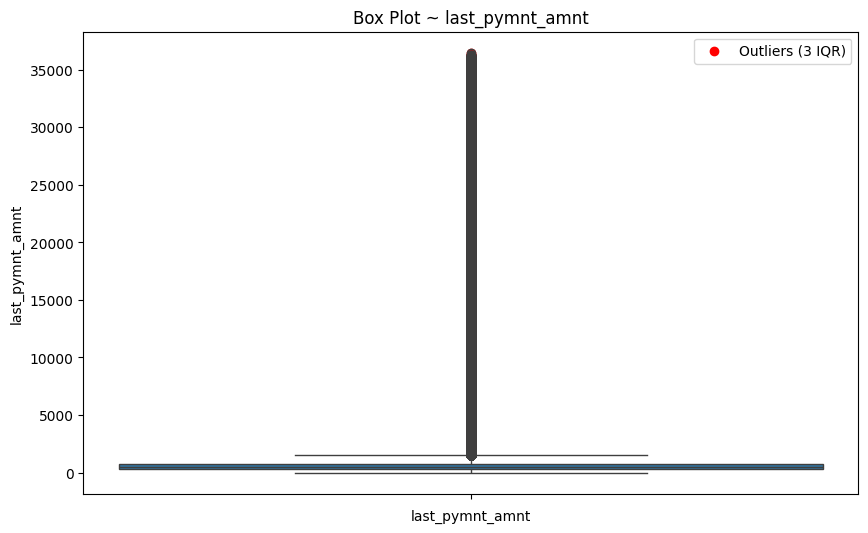

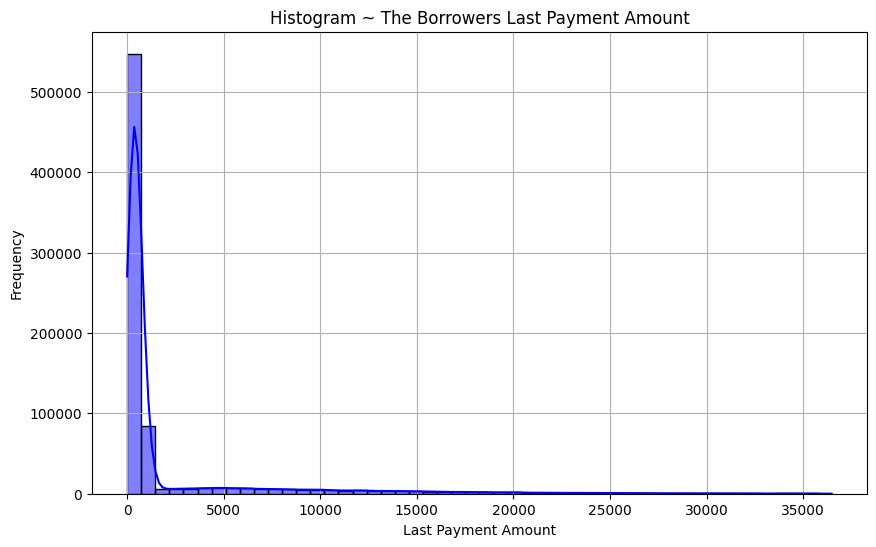

In [626]:
# last_pymnt_amnt: The amount of the most recent payment made by the borrower.
# total_pymnt: The total amount of payments made by the borrower over the life of the loan.
# total_pymnt_inv: The total amount of payments made to the investors who funded the loan.
# total_rec_int: The total amount of interest received by the lender or investors from the borrower.
# total_rec_prncp: The total amount of the original loan principal that has been repaid by the borrower.

# Inspect the distribution of last_pymnt_amnt
print(interest_rate_df_cleaned_1['last_pymnt_amnt'].describe())

# Inspect the regular and extreme outliers in the last_pymnt_amnt variable.
last_pay_regular_outliers = outlier_detection_viz_1(interest_rate_df_cleaned_1,'last_pymnt_amnt')
last_pay_extreme_outliers = outlier_detection_viz_2(interest_rate_df_cleaned_1,'last_pymnt_amnt')

# Histogram of last_pymnt_amnt
plt.figure(figsize = (10,6))
sns.histplot(interest_rate_df_cleaned_1['last_pymnt_amnt'],bins = 50,color = 'blue',kde = True)
plt.title('Histogram ~ The Borrowers Last Payment Amount')
plt.xlabel('Last Payment Amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

##### Key Observations --> Last Payment (Borrower)

In [627]:
# last_pymnt_amnt: The most recent payment made by the borrower.

# Analysis and Insights:
# Borrowers most recent payments can vary widely based on their loan amounts, payment schedules, and financial circumstances. This
# variability is expected in financial data.

# The mean is 2122.564, with a standard deviation of 4794.821, indicating significant variability.
# The 25th, 50th, and 75th percentiles are much lower than the maximum value, showing a right-skewed distribution with a few large payments.
# Retaining outliers ensures that significant payments are accounted for in the analysis. These payments might reflect large loan repayments
# or settlement amounts.

# Conclusion:
# Based on these points, it makes sense to retain the outliers in the last_pymnt_amnt variable.
# This approach ensures that the analysis accurately reflects the financial behavior of borrowers and provides valuable insights into
# repayment patterns.

##### 4.4.2 Examine the regular and extreme outliers --> Total Payments (Borrower)

count    757494.000000
mean       7115.461667
std        7521.130235
min           0.000000
25%        1797.820000
50%        4523.610000
75%        9931.350000
max       56087.909922
Name: total_pymnt, dtype: float64


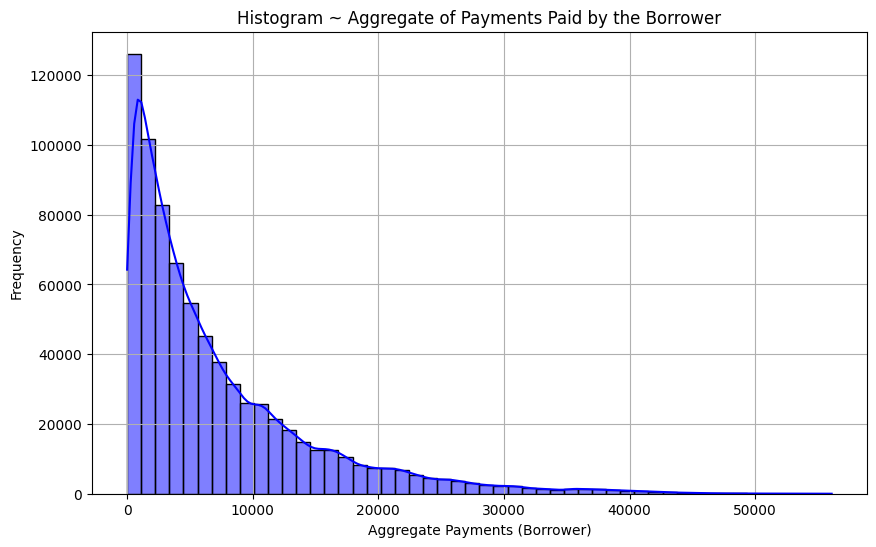

Total Regular Outliers in total_pymnt: 41545


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
42549,10127816,11979581,24000.0,24000.0,24000.0,36 months,13.53,814.80,B,B5,...,10726.61,Unknown,Dec-2015,0.0,1.0,INDIVIDUAL,0.0,539.0,199834.0,28200.0
42555,10129506,11981122,20800.0,20800.0,20800.0,36 months,13.53,706.16,B,B5,...,13334.93,Unknown,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,23473.0,43100.0
42561,10109669,11961248,20000.0,20000.0,20000.0,36 months,13.98,683.36,C,C1,...,11192.21,Unknown,Aug-2015,0.0,1.0,INDIVIDUAL,0.0,0.0,16852.0,28800.0
42583,10109689,11961267,22875.0,22875.0,22875.0,36 months,13.98,781.60,C,C1,...,19922.90,Unknown,Aug-2014,0.0,1.0,INDIVIDUAL,0.0,0.0,168357.0,27200.0
42600,10119464,11971096,30000.0,30000.0,30000.0,36 months,17.57,1078.12,D,D2,...,1078.12,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,42321.0,38500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887178,37810537,40573279,26500.0,26500.0,26500.0,36 months,23.99,1039.54,F,F2,...,25220.50,Unknown,Jun-2015,0.0,1.0,INDIVIDUAL,0.0,0.0,16426.0,9000.0
887185,37197690,39970466,24000.0,24000.0,24000.0,60 months,15.99,583.51,D,D2,...,23066.80,Unknown,Jul-2015,0.0,1.0,INDIVIDUAL,0.0,0.0,31100.0,33700.0
887198,37790415,40553149,30000.0,30000.0,30000.0,36 months,14.99,1039.82,C,C5,...,140.76,Unknown,Dec-2015,0.0,1.0,INDIVIDUAL,0.0,0.0,302480.0,43100.0
887222,37700202,40472930,31300.0,31300.0,31300.0,60 months,26.06,938.25,G,G5,...,977.21,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,66944.0,34700.0


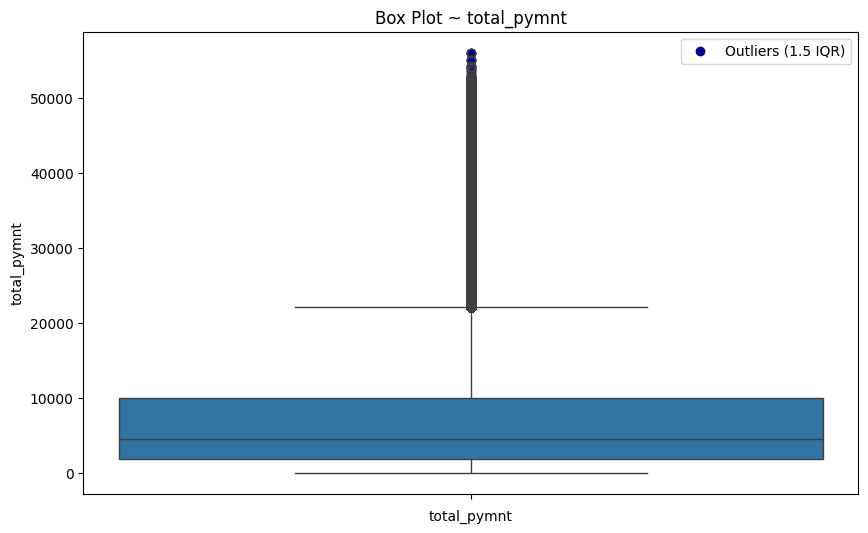

Total Extreme Outliers in total_pymnt: 8672


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
42637,10099417,11951022,35000.0,35000.0,35000.0,60 months,23.70,1000.80,F,F1,...,12187.57,Unknown,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,64074.0,32300.0
42674,10168464,12020134,35000.0,35000.0,35000.0,36 months,15.61,1223.77,C,C4,...,3675.56,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,221949.0,50800.0
42686,10109282,11960883,35000.0,35000.0,35000.0,60 months,14.98,832.29,C,C3,...,31648.90,Unknown,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,753367.0,101000.0
42702,10139385,11990959,35000.0,35000.0,34950.0,60 months,14.98,832.29,C,C3,...,32528.18,Unknown,Sep-2014,0.0,1.0,INDIVIDUAL,0.0,0.0,211911.0,50800.0
42739,10069292,11920905,35000.0,35000.0,34975.0,36 months,25.80,1406.45,G,G1,...,16249.47,Unknown,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,45289.0,36600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886838,37831335,40594297,35000.0,35000.0,35000.0,36 months,15.99,1230.33,D,D2,...,378.42,Unknown,Nov-2015,0.0,1.0,INDIVIDUAL,0.0,0.0,18979.0,31900.0
886888,37700422,40473182,35000.0,35000.0,35000.0,36 months,12.39,1169.04,C,C1,...,29469.34,Unknown,Sep-2015,0.0,1.0,INDIVIDUAL,0.0,0.0,64839.0,100100.0
886908,37631315,40394271,35000.0,35000.0,35000.0,60 months,19.24,912.55,E,E2,...,34670.15,Unknown,May-2015,0.0,1.0,INDIVIDUAL,0.0,0.0,48914.0,19800.0
887022,37741137,40504034,35000.0,35000.0,35000.0,36 months,12.99,1179.12,C,C2,...,28776.04,Unknown,Oct-2015,0.0,1.0,INDIVIDUAL,0.0,0.0,449775.0,36800.0


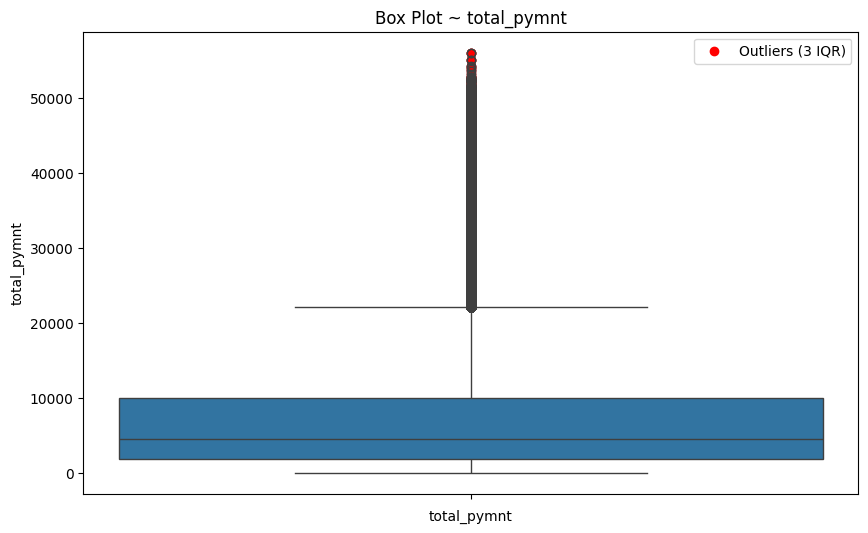

In [628]:
# total_pymnt: The total amount of payments made by the borrower over the life of the loan.
print(interest_rate_df_cleaned_1['total_pymnt'].describe())

# Inspect the distribution of total_pymnt (Histogram)
plt.figure(figsize = (10,6))
sns.histplot(interest_rate_df_cleaned_1['total_pymnt'],bins = 50,color = 'blue',kde = True)
plt.title('Histogram ~ Aggregate of Payments Paid by the Borrower')
plt.xlabel('Aggregate Payments (Borrower)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Inspect for outliers in total_pymnt
total_payment_regular_outliers = outlier_detection_viz_1(interest_rate_df_cleaned_1,'total_pymnt')
total_payment_extreme_outliers = outlier_detection_viz_2(interest_rate_df_cleaned_1,'total_pymnt')

# total_pymnt: Payments made by the borrower including principal, interest, and fees.
# Nature of Data: Represents the total amount paid over the life of the loan.
# Outliers: High variability indicates different loan sizes and payment behaviors.
# Recommendation: Retain outliers to ensure accurate representation of total payments.

##### 4.4.3 Examine the regular and extreme outliers --> Total Payments (Investor)

['last_pymnt_amnt', 'total_pymnt', 'total_pymnt_inv', 'total_rec_int', 'total_rec_prncp']
count    757494.000000
mean       7112.268233
std        7517.332429
min           0.000000
25%        1796.980000
50%        4522.190000
75%        9926.075000
max       56047.850000
Name: total_pymnt_inv, dtype: float64


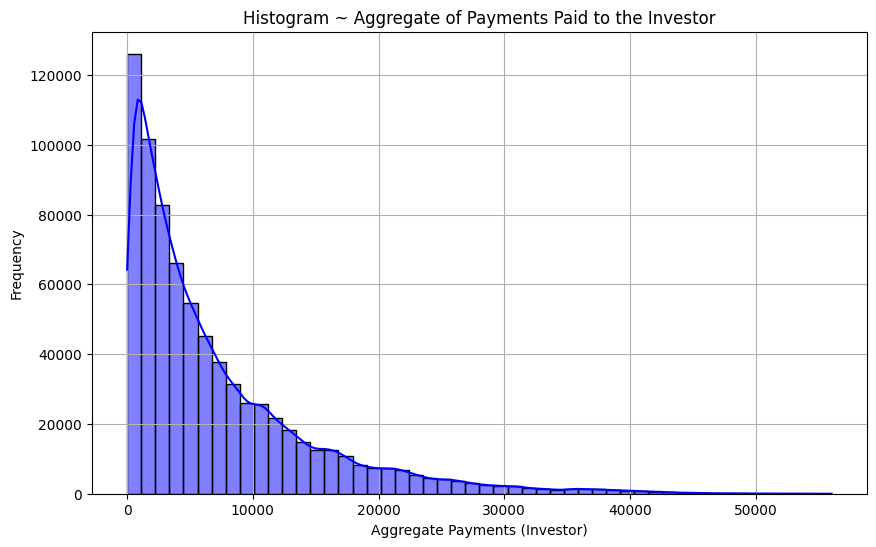

Total Regular Outliers in total_pymnt_inv: 41540


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
42549,10127816,11979581,24000.0,24000.0,24000.0,36 months,13.53,814.80,B,B5,...,10726.61,Unknown,Dec-2015,0.0,1.0,INDIVIDUAL,0.0,539.0,199834.0,28200.0
42555,10129506,11981122,20800.0,20800.0,20800.0,36 months,13.53,706.16,B,B5,...,13334.93,Unknown,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,23473.0,43100.0
42561,10109669,11961248,20000.0,20000.0,20000.0,36 months,13.98,683.36,C,C1,...,11192.21,Unknown,Aug-2015,0.0,1.0,INDIVIDUAL,0.0,0.0,16852.0,28800.0
42583,10109689,11961267,22875.0,22875.0,22875.0,36 months,13.98,781.60,C,C1,...,19922.90,Unknown,Aug-2014,0.0,1.0,INDIVIDUAL,0.0,0.0,168357.0,27200.0
42600,10119464,11971096,30000.0,30000.0,30000.0,36 months,17.57,1078.12,D,D2,...,1078.12,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,42321.0,38500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887178,37810537,40573279,26500.0,26500.0,26500.0,36 months,23.99,1039.54,F,F2,...,25220.50,Unknown,Jun-2015,0.0,1.0,INDIVIDUAL,0.0,0.0,16426.0,9000.0
887185,37197690,39970466,24000.0,24000.0,24000.0,60 months,15.99,583.51,D,D2,...,23066.80,Unknown,Jul-2015,0.0,1.0,INDIVIDUAL,0.0,0.0,31100.0,33700.0
887198,37790415,40553149,30000.0,30000.0,30000.0,36 months,14.99,1039.82,C,C5,...,140.76,Unknown,Dec-2015,0.0,1.0,INDIVIDUAL,0.0,0.0,302480.0,43100.0
887222,37700202,40472930,31300.0,31300.0,31300.0,60 months,26.06,938.25,G,G5,...,977.21,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,66944.0,34700.0


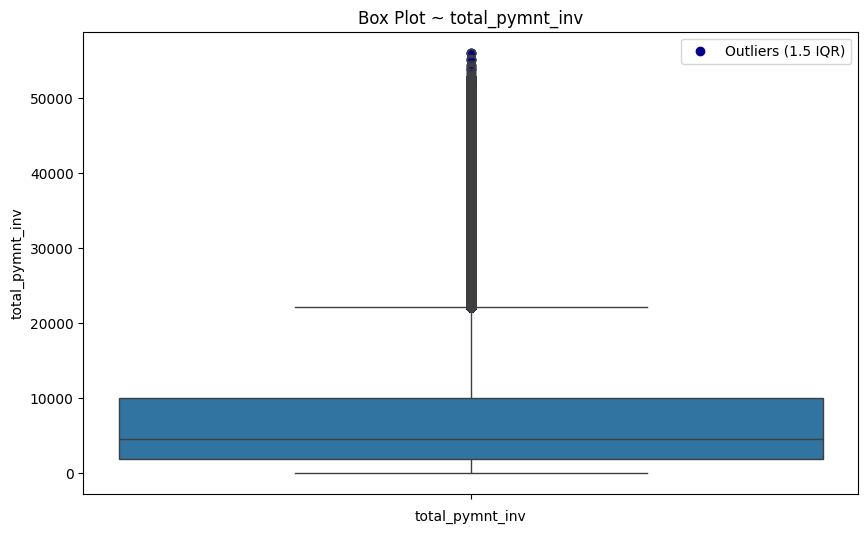

Total Extreme Outliers in total_pymnt_inv: 8681


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
42637,10099417,11951022,35000.0,35000.0,35000.0,60 months,23.70,1000.80,F,F1,...,12187.57,Unknown,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,64074.0,32300.0
42674,10168464,12020134,35000.0,35000.0,35000.0,36 months,15.61,1223.77,C,C4,...,3675.56,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,221949.0,50800.0
42686,10109282,11960883,35000.0,35000.0,35000.0,60 months,14.98,832.29,C,C3,...,31648.90,Unknown,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,753367.0,101000.0
42702,10139385,11990959,35000.0,35000.0,34950.0,60 months,14.98,832.29,C,C3,...,32528.18,Unknown,Sep-2014,0.0,1.0,INDIVIDUAL,0.0,0.0,211911.0,50800.0
42739,10069292,11920905,35000.0,35000.0,34975.0,36 months,25.80,1406.45,G,G1,...,16249.47,Unknown,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,45289.0,36600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886838,37831335,40594297,35000.0,35000.0,35000.0,36 months,15.99,1230.33,D,D2,...,378.42,Unknown,Nov-2015,0.0,1.0,INDIVIDUAL,0.0,0.0,18979.0,31900.0
886888,37700422,40473182,35000.0,35000.0,35000.0,36 months,12.39,1169.04,C,C1,...,29469.34,Unknown,Sep-2015,0.0,1.0,INDIVIDUAL,0.0,0.0,64839.0,100100.0
886908,37631315,40394271,35000.0,35000.0,35000.0,60 months,19.24,912.55,E,E2,...,34670.15,Unknown,May-2015,0.0,1.0,INDIVIDUAL,0.0,0.0,48914.0,19800.0
887022,37741137,40504034,35000.0,35000.0,35000.0,36 months,12.99,1179.12,C,C2,...,28776.04,Unknown,Oct-2015,0.0,1.0,INDIVIDUAL,0.0,0.0,449775.0,36800.0


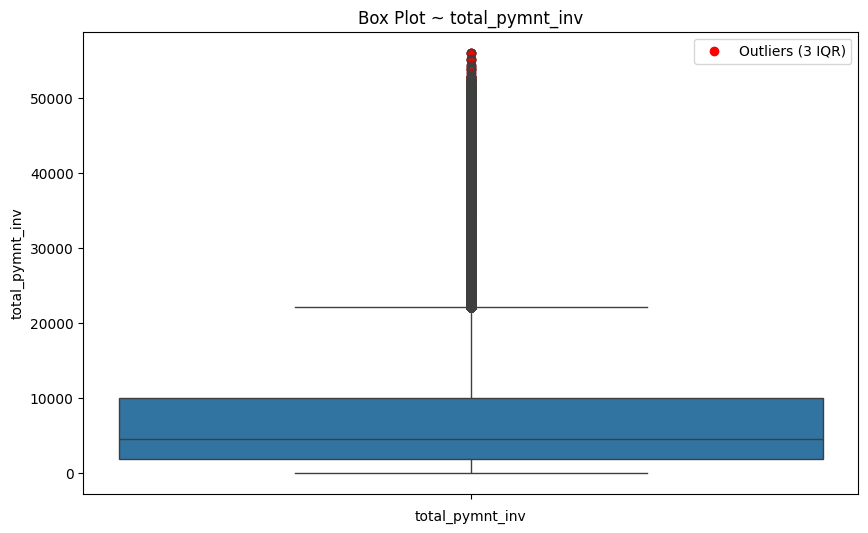

In [629]:
print(payments_info)

# total_pymnt_inv: The total amount of payments made to the investors who funded the loan.
print(interest_rate_df_cleaned_1['total_pymnt_inv'].describe())

# Inspect the distribution of total_pymnt_inv (Histogram)
plt.figure(figsize = (10,6))
sns.histplot(interest_rate_df_cleaned_1['total_pymnt_inv'],bins = 50,color = 'blue',kde = True)
plt.title('Histogram ~ Aggregate of Payments Paid to the Investor')
plt.xlabel('Aggregate Payments (Investor)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Inspect for outliers in total_pymnt_inv
total_pymnt_inv_regular_outliers = outlier_detection_viz_1(interest_rate_df_cleaned_1,'total_pymnt_inv')
total_pymnt_inv_extreme_outliers = outlier_detection_viz_2(interest_rate_df_cleaned_1,'total_pymnt_inv')

# The two distributions of total_pymnt and total_pymnt_inv are similar which indicates that while the borrower's
# are making payments, the investors are also getting paid.

# total_pymnt_inv: Payments made to investors.
# Nature of Data: Similar to total_pymnt but specifically tracks payments received by investors.
# Outliers: Represents diverse investment returns based on loan performance.
# Recommendation: Retain outliers to reflect true investor returns.

##### 4.4.4 Examine the regular and extreme outliers --> Total Interest Recieved (Borrower)

count    757494.000000
mean       1697.604429
std        2001.252341
min           0.000000
25%         427.460000
50%        1047.395000
75%        2182.500000
max       21840.000000
Name: total_rec_int, dtype: float64


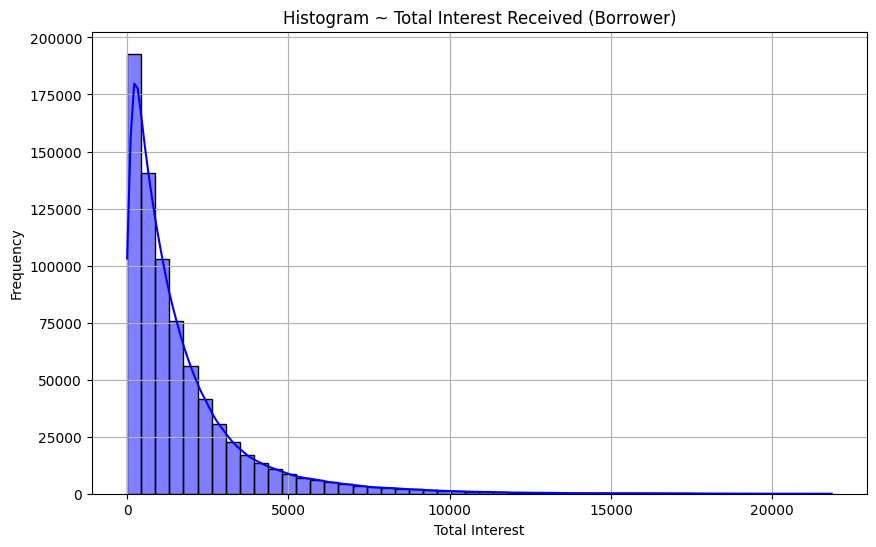

Total Regular Outliers in total_rec_int: 53173


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
42547,10149526,12001069,27600.0,27600.0,27600.0,60 months,19.97,730.78,D,D5,...,730.78,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,241609.0,32600.0
42559,10089634,11941167,20000.0,20000.0,20000.0,60 months,16.24,488.92,C,C5,...,488.92,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,37111.0,28400.0
42562,10119562,11971186,31825.0,31825.0,31825.0,60 months,20.50,852.05,E,E1,...,852.05,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,215915.0,47800.0
42571,10078061,11929803,17475.0,17475.0,17475.0,60 months,21.48,477.49,E,E2,...,592.39,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,57646.0,1500.0
42572,10099593,11951196,30000.0,30000.0,30000.0,60 months,18.25,765.89,D,D3,...,765.89,Feb-2016,Jan-2016,1.0,1.0,INDIVIDUAL,0.0,0.0,379891.0,48000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887265,36440669,39152032,25000.0,25000.0,25000.0,60 months,24.99,733.64,F,F4,...,733.64,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,33428.0,32200.0
887270,37267392,40050136,32000.0,32000.0,32000.0,36 months,25.57,1281.99,F,F5,...,1281.99,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,69304.0,11000.0
887298,35094141,37777463,35000.0,35000.0,35000.0,60 months,15.59,843.53,D,D1,...,843.53,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,186560.0,46100.0
887307,36009847,38711526,35000.0,35000.0,35000.0,60 months,21.99,966.47,E,E5,...,966.47,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,426728.0,29300.0


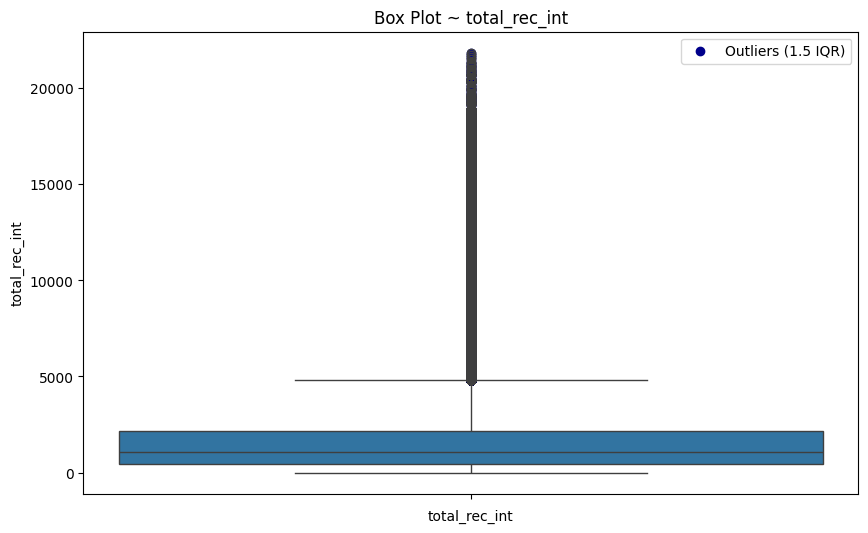

Total Extreme Outliers in total_rec_int: 18822


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
42547,10149526,12001069,27600.0,27600.0,27600.0,60 months,19.97,730.78,D,D5,...,730.78,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,241609.0,32600.0
42562,10119562,11971186,31825.0,31825.0,31825.0,60 months,20.50,852.05,E,E1,...,852.05,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,215915.0,47800.0
42572,10099593,11951196,30000.0,30000.0,30000.0,60 months,18.25,765.89,D,D3,...,765.89,Feb-2016,Jan-2016,1.0,1.0,INDIVIDUAL,0.0,0.0,379891.0,48000.0
42600,10119464,11971096,30000.0,30000.0,30000.0,36 months,17.57,1078.12,D,D2,...,1078.12,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,42321.0,38500.0
42604,10149459,12001006,34475.0,34475.0,34425.0,60 months,22.40,960.02,E,E3,...,960.02,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,28360.0,19200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886045,37842072,40605165,35000.0,35000.0,34975.0,60 months,22.99,986.47,F,F1,...,986.47,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,84865.0,71700.0
886550,37601851,40364858,35000.0,35000.0,35000.0,60 months,24.99,1027.10,F,F4,...,1027.10,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,77.0,123033.0,43700.0
886591,37610383,40373124,35000.0,35000.0,35000.0,36 months,25.83,1407.01,G,G2,...,1407.01,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,63999.0,64000.0
886871,37620234,40382962,35000.0,35000.0,35000.0,60 months,22.99,986.47,F,F1,...,986.47,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,271930.0,52800.0


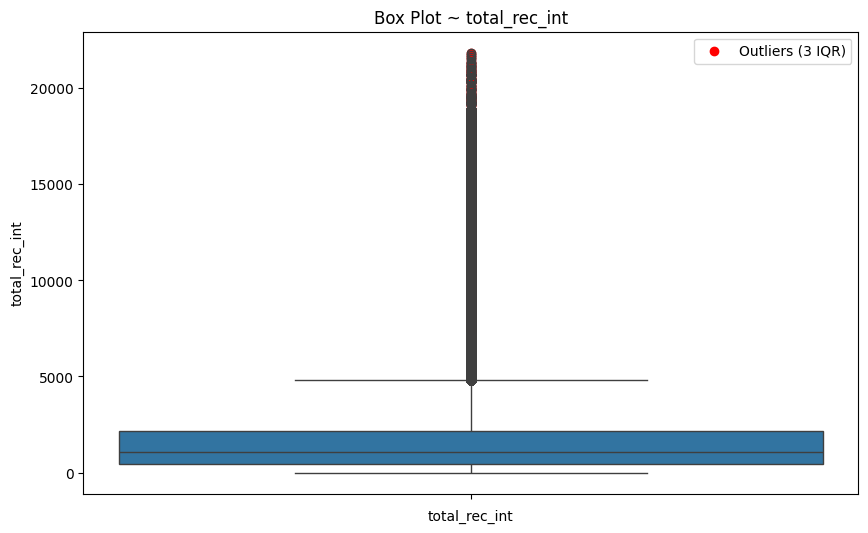

In [630]:
# total_rec_int: The total interest received from the borrower.
print(interest_rate_df_cleaned_1['total_rec_int'].describe())

# Inspect the distribution of total_rec_int (Histogram)
plt.figure(figsize = (10,6))
sns.histplot(interest_rate_df_cleaned_1['total_rec_int'],bins = 50,color = 'blue',kde = True)
plt.title('Histogram ~ Total Interest Received (Borrower)')
plt.xlabel('Total Interest')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Inspect for outliers in total_rec_int
total_rec_int_regular_outliers = outlier_detection_viz_1(interest_rate_df_cleaned_1,'total_rec_int')
total_rec_int_extreme_outliers = outlier_detection_viz_2(interest_rate_df_cleaned_1,'total_rec_int')

##### 4.4.5 Examine the regular and extreme outliers --> Total Principal Recieved (Borrower)

['last_pymnt_amnt', 'total_pymnt', 'total_pymnt_inv', 'total_rec_int', 'total_rec_prncp']
count    757494.000000
mean       5377.306872
std        6388.690378
min           0.000000
25%        1120.210000
50%        2943.880000
75%        7165.550000
max       35000.000000
Name: total_rec_prncp, dtype: float64


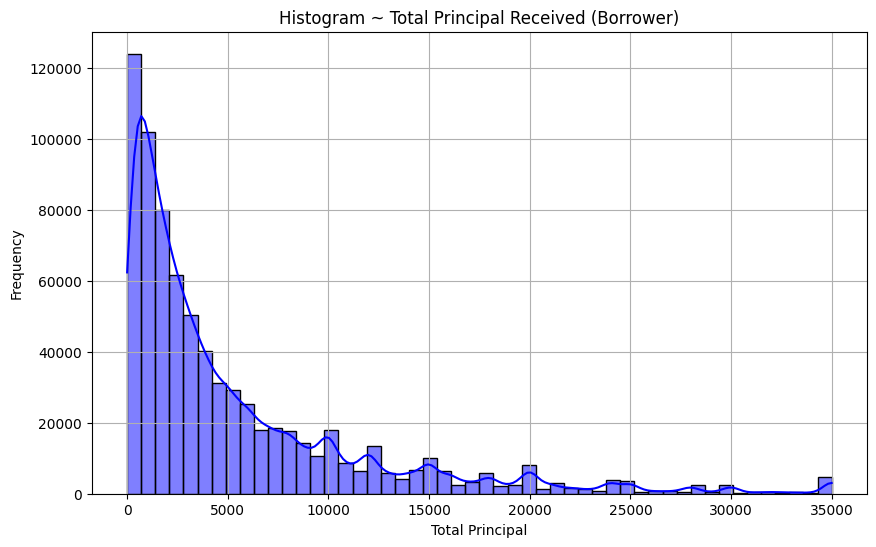

Total Regular Outliers in total_rec_prncp: 54400


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
42535,10149342,12000897,27050.0,27050.0,27050.0,36 months,10.99,885.46,B,B2,...,885.46,Feb-2016,Dec-2015,0.0,1.0,INDIVIDUAL,0.0,0.0,114834.0,59900.0
42549,10127816,11979581,24000.0,24000.0,24000.0,36 months,13.53,814.80,B,B5,...,10726.61,Unknown,Dec-2015,0.0,1.0,INDIVIDUAL,0.0,539.0,199834.0,28200.0
42555,10129506,11981122,20800.0,20800.0,20800.0,36 months,13.53,706.16,B,B5,...,13334.93,Unknown,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,23473.0,43100.0
42561,10109669,11961248,20000.0,20000.0,20000.0,36 months,13.98,683.36,C,C1,...,11192.21,Unknown,Aug-2015,0.0,1.0,INDIVIDUAL,0.0,0.0,16852.0,28800.0
42583,10109689,11961267,22875.0,22875.0,22875.0,36 months,13.98,781.60,C,C1,...,19922.90,Unknown,Aug-2014,0.0,1.0,INDIVIDUAL,0.0,0.0,168357.0,27200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887198,37790415,40553149,30000.0,30000.0,30000.0,36 months,14.99,1039.82,C,C5,...,140.76,Unknown,Dec-2015,0.0,1.0,INDIVIDUAL,0.0,0.0,302480.0,43100.0
887222,37700202,40472930,31300.0,31300.0,31300.0,60 months,26.06,938.25,G,G5,...,977.21,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,66944.0,34700.0
887249,37357154,40119871,27650.0,27650.0,27650.0,60 months,21.99,763.51,E,E5,...,27645.25,Unknown,Jan-2015,0.0,1.0,INDIVIDUAL,0.0,0.0,18671.0,30500.0
887264,36801355,39554067,20000.0,20000.0,20000.0,36 months,12.99,673.79,C,C2,...,16534.04,Unknown,Oct-2015,0.0,1.0,INDIVIDUAL,0.0,0.0,41272.0,18200.0


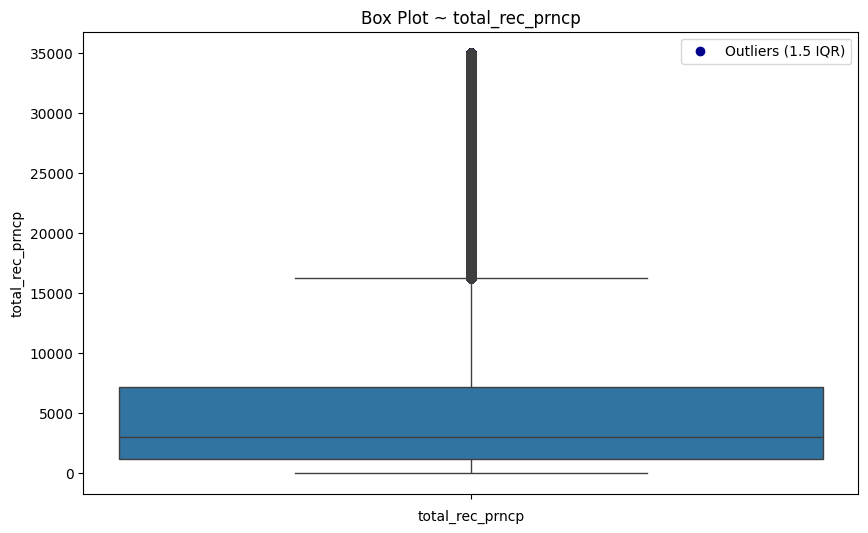

Total Extreme Outliers in total_rec_prncp: 14606


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
42637,10099417,11951022,35000.0,35000.0,35000.0,60 months,23.70,1000.80,F,F1,...,12187.57,Unknown,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,64074.0,32300.0
42640,9845247,11697317,29175.0,29175.0,29150.0,36 months,11.99,968.89,B,B3,...,12839.30,Unknown,Dec-2015,0.0,1.0,INDIVIDUAL,0.0,0.0,40748.0,19700.0
42642,10089380,11940932,30000.0,30000.0,30000.0,36 months,13.98,1025.04,C,C1,...,20894.68,Unknown,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,161166.0,29100.0
42648,9794618,11646768,26000.0,26000.0,26000.0,60 months,21.48,710.43,E,E2,...,4299.14,Unknown,Oct-2015,0.0,1.0,INDIVIDUAL,0.0,0.0,163499.0,15690.0
42674,10168464,12020134,35000.0,35000.0,35000.0,36 months,15.61,1223.77,C,C4,...,3675.56,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,221949.0,50800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887159,37700602,40473386,26850.0,26850.0,26850.0,60 months,25.83,801.21,G,G2,...,25224.42,Unknown,Dec-2015,0.0,1.0,INDIVIDUAL,0.0,0.0,465998.0,35900.0
887178,37810537,40573279,26500.0,26500.0,26500.0,36 months,23.99,1039.54,F,F2,...,25220.50,Unknown,Jun-2015,0.0,1.0,INDIVIDUAL,0.0,0.0,16426.0,9000.0
887198,37790415,40553149,30000.0,30000.0,30000.0,36 months,14.99,1039.82,C,C5,...,140.76,Unknown,Dec-2015,0.0,1.0,INDIVIDUAL,0.0,0.0,302480.0,43100.0
887222,37700202,40472930,31300.0,31300.0,31300.0,60 months,26.06,938.25,G,G5,...,977.21,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,66944.0,34700.0


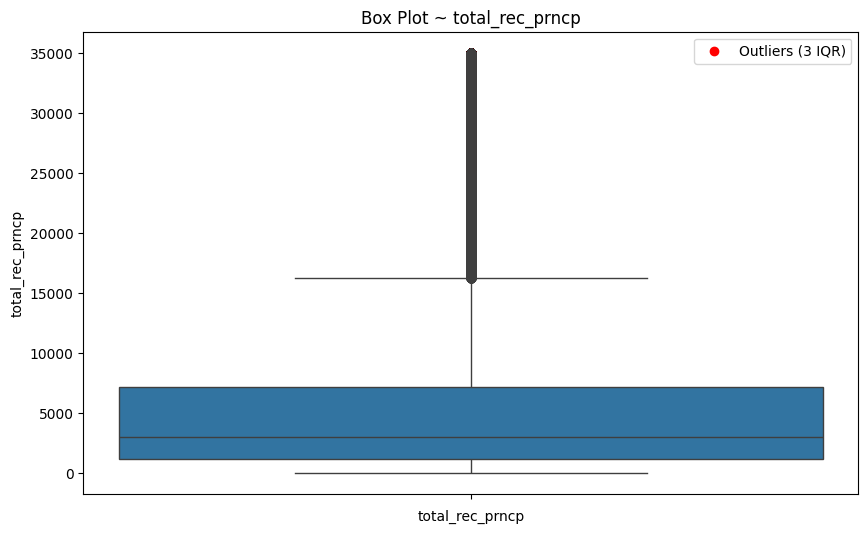

In [631]:
print(payments_info)

# total_rec_prncp: The total principal recieved from the borrower.
print(interest_rate_df_cleaned_1['total_rec_prncp'].describe())

# Inspect the distribution of total_rec_prncp (Histogram)
plt.figure(figsize = (10,6))
sns.histplot(interest_rate_df_cleaned_1['total_rec_prncp'],bins = 50,color = 'blue',kde = True)
plt.title('Histogram ~ Total Principal Received (Borrower)')
plt.xlabel('Total Principal')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Inspect for outliers in total_rec_prncp
total_rec_prncp_regular_outliers = outlier_detection_viz_1(interest_rate_df_cleaned_1,'total_rec_prncp')
total_rec_prncp_extreme_outliers = outlier_detection_viz_2(interest_rate_df_cleaned_1,'total_rec_prncp')

##### 4.4.6 Account Balance Variables

In [632]:
# Rationale for retaining the outliers
# Outliers in variables like revol_bal, revol_util, tot_coll_amt, tot_cur_bal, and total_rev_hi_lim represent
# true financial behaviors and not errors or anomalies.
# The outliers portray information about about credit usage, debt levels, and financial health, which are critical in understanding borrower behavior.
# High values in these variables may indicate significant credit reliance or financial obligations, which are key factors in assessing credit risk.
# Removing the outliers could eliminate essential information, leading to decrease in model accuracy and true representation of the data.

##### 4.4.7 Quantitative Measure Variables --> Examine the regular and extreme outliers --> Collections Recovery Fee

['annual_inc_quantile', 'annual_inc_robust', 'collection_recovery_fee']
count    757494.000000
mean          4.291250
std          52.856373
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        5694.093600
Name: collection_recovery_fee, dtype: float64


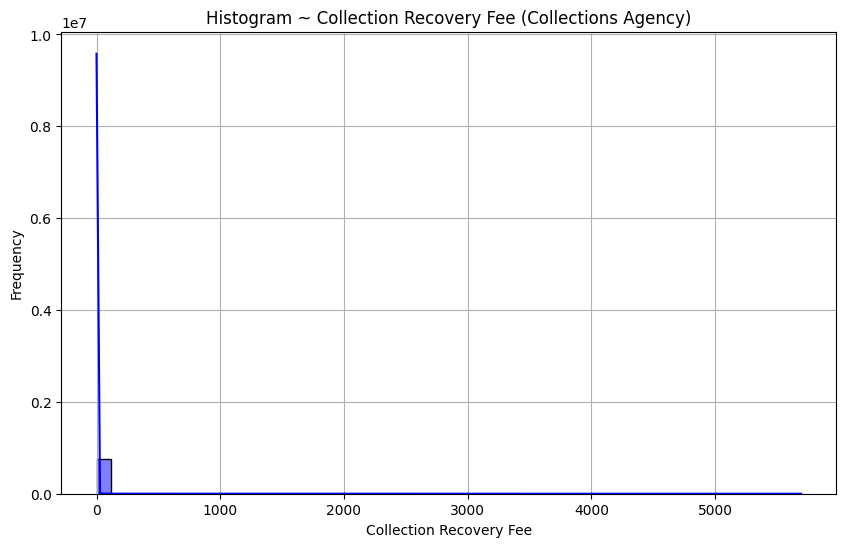

Total Regular Outliers in collection_recovery_fee: 14998


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
42719,10129286,11980914,20000.0,20000.0,19950.0,36 months,8.90,635.07,A,A5,...,0.00,Unknown,May-2014,0.0,1.0,INDIVIDUAL,0.0,0.0,524723.0,43200.0
42741,5978043,7450480,20000.0,20000.0,20000.0,60 months,15.61,482.23,C,C4,...,988.57,Unknown,Apr-2015,0.0,1.0,INDIVIDUAL,0.0,0.0,424646.0,48200.0
42782,10159035,12010682,5750.0,5750.0,5750.0,36 months,18.25,208.60,D,D3,...,208.60,Unknown,May-2015,0.0,1.0,INDIVIDUAL,0.0,0.0,26872.0,7700.0
42822,10089117,11940692,16000.0,16000.0,16000.0,36 months,16.24,564.42,C,C5,...,564.42,Unknown,Dec-2014,0.0,1.0,INDIVIDUAL,0.0,0.0,44168.0,22300.0
42858,10068926,11920569,30000.0,30000.0,30000.0,36 months,18.25,1088.34,D,D3,...,1088.34,Unknown,May-2015,0.0,1.0,INDIVIDUAL,0.0,0.0,345250.0,115500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886020,37670882,40433721,35000.0,35000.0,35000.0,60 months,23.99,1006.68,F,F2,...,1006.68,Unknown,Jul-2015,0.0,1.0,INDIVIDUAL,0.0,0.0,222509.0,62700.0
886421,36341252,39072651,16575.0,16575.0,16575.0,60 months,24.99,486.41,F,F4,...,486.41,Unknown,Jul-2015,0.0,1.0,INDIVIDUAL,0.0,0.0,37771.0,50500.0
886627,37741722,40504725,18000.0,18000.0,18000.0,60 months,9.49,377.95,B,B2,...,0.00,Unknown,Apr-2015,0.0,1.0,INDIVIDUAL,0.0,0.0,12261.0,17000.0
886937,37611321,40374297,8000.0,8000.0,8000.0,36 months,9.49,256.23,B,B2,...,0.00,Unknown,Jun-2015,0.0,1.0,INDIVIDUAL,0.0,0.0,3477.0,5300.0


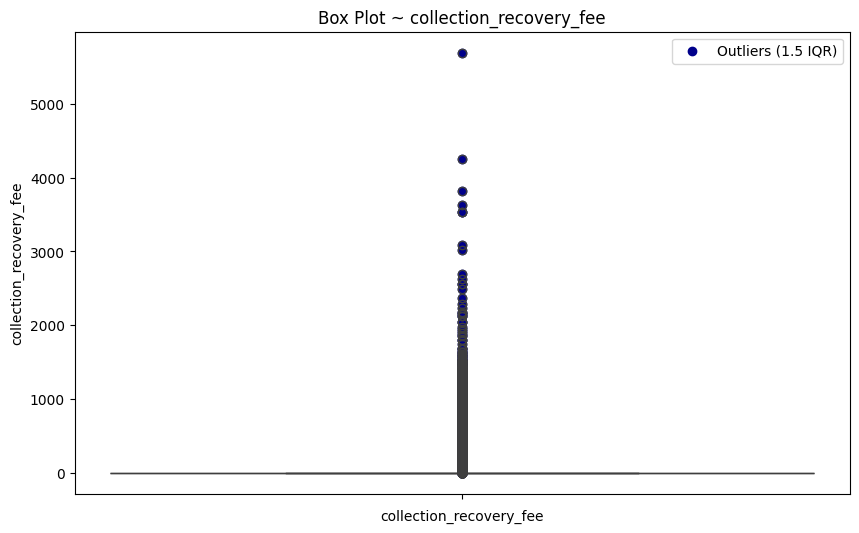

Total Extreme Outliers in collection_recovery_fee: 14998


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
42719,10129286,11980914,20000.0,20000.0,19950.0,36 months,8.90,635.07,A,A5,...,0.00,Unknown,May-2014,0.0,1.0,INDIVIDUAL,0.0,0.0,524723.0,43200.0
42741,5978043,7450480,20000.0,20000.0,20000.0,60 months,15.61,482.23,C,C4,...,988.57,Unknown,Apr-2015,0.0,1.0,INDIVIDUAL,0.0,0.0,424646.0,48200.0
42782,10159035,12010682,5750.0,5750.0,5750.0,36 months,18.25,208.60,D,D3,...,208.60,Unknown,May-2015,0.0,1.0,INDIVIDUAL,0.0,0.0,26872.0,7700.0
42822,10089117,11940692,16000.0,16000.0,16000.0,36 months,16.24,564.42,C,C5,...,564.42,Unknown,Dec-2014,0.0,1.0,INDIVIDUAL,0.0,0.0,44168.0,22300.0
42858,10068926,11920569,30000.0,30000.0,30000.0,36 months,18.25,1088.34,D,D3,...,1088.34,Unknown,May-2015,0.0,1.0,INDIVIDUAL,0.0,0.0,345250.0,115500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886020,37670882,40433721,35000.0,35000.0,35000.0,60 months,23.99,1006.68,F,F2,...,1006.68,Unknown,Jul-2015,0.0,1.0,INDIVIDUAL,0.0,0.0,222509.0,62700.0
886421,36341252,39072651,16575.0,16575.0,16575.0,60 months,24.99,486.41,F,F4,...,486.41,Unknown,Jul-2015,0.0,1.0,INDIVIDUAL,0.0,0.0,37771.0,50500.0
886627,37741722,40504725,18000.0,18000.0,18000.0,60 months,9.49,377.95,B,B2,...,0.00,Unknown,Apr-2015,0.0,1.0,INDIVIDUAL,0.0,0.0,12261.0,17000.0
886937,37611321,40374297,8000.0,8000.0,8000.0,36 months,9.49,256.23,B,B2,...,0.00,Unknown,Jun-2015,0.0,1.0,INDIVIDUAL,0.0,0.0,3477.0,5300.0


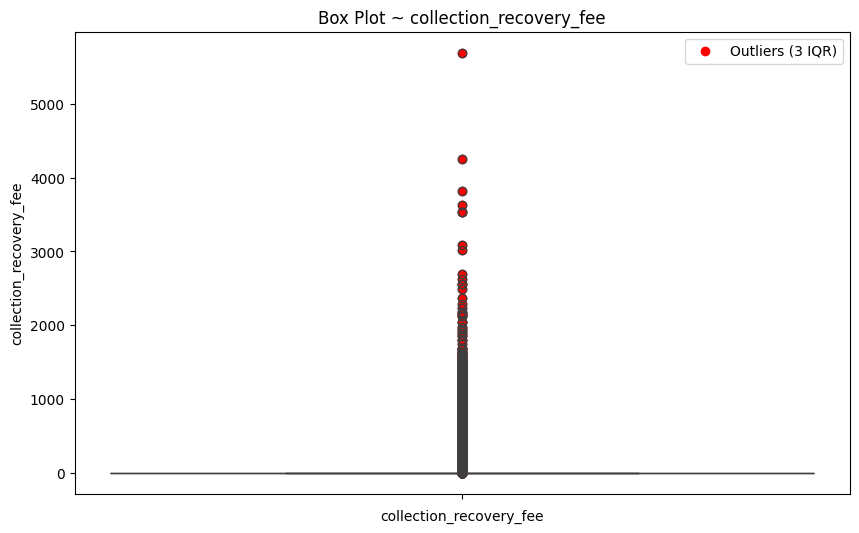

In [633]:
print(quantitative_measures)

# collection_recovery_fee: The total fees charged by the collections agency to the lender for recovering the
# defaulted amount from the borrower.
print(interest_rate_df_cleaned_1['collection_recovery_fee'].describe())

# Inspect the distribution of collection_recovery_fee (Histogram)
plt.figure(figsize = (10,6))
sns.histplot(interest_rate_df_cleaned_1['collection_recovery_fee'],bins = 50,color = 'blue',kde = True)
plt.title('Histogram ~ Collection Recovery Fee (Collections Agency)')
plt.xlabel('Collection Recovery Fee')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Inspect for outliers in collection_recovery_fee
collection_recovery_fee_regular_outliers = outlier_detection_viz_1(interest_rate_df_cleaned_1,'collection_recovery_fee')
collection_recovery_fee_extreme_outliers = outlier_detection_viz_2(interest_rate_df_cleaned_1,'collection_recovery_fee')

##### 4.4.8 Miscellaneous Metrics Variables

In [634]:
print(miscellaneous_metrics)
print(interest_rate_df_cleaned_1['total_acc'].nunique())
print(interest_rate_df_cleaned_1['open_acc'].nunique())

# These are discrete variables and indicates the number of credit accounts and the number of active credit accounts of the
# borrower. Since this represents count data these should be excluded from outlier detection.

['total_acc', 'open_acc']
133
77


##### 4.4.9 Data Type Conversions and Drop Irrelevant Variables

##### Employment, Payment Delays, Records and Accounts Variables

In [635]:
# print(interest_rate_df_cleaned_1.dtypes)
# print(interest_rate_df_cleaned_1.nunique())

# Define the list of columns that needs further inspection for data types
conversion_columns = [
    'emp_length',
    'delinq_2yrs',
    'inq_last_6mths',
    'open_acc',
    'pub_rec',
    'total_acc',
    'collections_12_mths_ex_med',
    'acc_now_delinq']

for i in conversion_columns:
  print(f'{i}:',interest_rate_df_cleaned_1[i].dtypes)
  interest_rate_df_cleaned_1[i] = interest_rate_df_cleaned_1[i].astype('int64') # Convert the defined variables in the list to integer types
# The variables defined in the list are all of floating integers and these variables represent events for the borrower therefore a more
# appropriate data type would be integer.

# Variable inspection after conversion
for i in conversion_columns:
  print(f'{i}:',interest_rate_df_cleaned_1[i].dtypes) # The variables have been effectively converted to integer data types.

emp_length: float64
delinq_2yrs: float64
inq_last_6mths: float64
open_acc: float64
pub_rec: float64
total_acc: float64
collections_12_mths_ex_med: float64
acc_now_delinq: float64
emp_length: int64
delinq_2yrs: int64
inq_last_6mths: int64
open_acc: int64
pub_rec: int64
total_acc: int64
collections_12_mths_ex_med: int64
acc_now_delinq: int64


##### Loan Term Variable

In [636]:
print(interest_rate_df_cleaned_1['term'].value_counts())
print(interest_rate_df_cleaned_1['term'].dtypes)
interest_rate_df_cleaned_1['term'] = interest_rate_df_cleaned_1['term'].str.strip().astype('category')
print(interest_rate_df_cleaned_1['term'].value_counts())
print(interest_rate_df_cleaned_1['term'].dtypes) # The variable has been effectively converted to category data type.

term
 36 months    520422
 60 months    237072
Name: count, dtype: int64
object
term
36 months    520422
60 months    237072
Name: count, dtype: int64
category


##### Grade, Sub Grade, Home Ownership and Verification Status Variables

In [637]:
# Inspect the data types for grade, sub_grade, home_ownership and verification_status
categorical_vars = ['grade','sub_grade','home_ownership','verification_status']
for i in categorical_vars:
  print(f'{i}:',interest_rate_df_cleaned_1[i].value_counts())
  print(f'{i}:',interest_rate_df_cleaned_1[i].dtypes) # All variables represent a category/group and require conversion
                                                      # for accurate representation of the data.
  # print(f'{i}:',interest_rate_df_cleaned_1[i].nunique())
  # grade: 7
  # sub_grade: 36
  # home_ownership: 4
  # verification_status: 3

# Convert the categorical variables to category data type
for i in categorical_vars:
  interest_rate_df_cleaned_1[i] = interest_rate_df_cleaned_1[i].astype('category') # Convert the defined variables to category data types.

# Inspect the data types after conversion
for i in categorical_vars:
  print(f'{i}:',interest_rate_df_cleaned_1[i].dtypes) # All variables have been effectively converted to category data type.

grade: grade
B    215830
C    214936
A    121148
D    120202
E     61184
F     19697
G      4497
Name: count, dtype: int64
grade: object
sub_grade: sub_grade
B4    47585
B3    46831
C1    45694
C2    45060
C3    44361
C4    43487
B2    41725
B5    40979
B1    38710
A5    37603
C5    36334
D1    31863
A4    27260
D2    25432
D3    22547
D4    22021
A3    18949
A1    18939
A2    18397
D5    18339
E1    15783
E2    14791
E3    12274
E4    10129
E5     8207
F1     6142
F2     4598
F3     3831
F4     2911
F5     2215
G1     1549
G2     1171
G3      814
G4      515
G5      448
Name: count, dtype: int64
sub_grade: object
home_ownership: home_ownership
MORTGAGE    381464
RENT        303853
OWN          72092
NONE            41
OTHER           41
ANY              3
Name: count, dtype: int64
home_ownership: object
verification_status: verification_status
Source Verified    295516
Not Verified       232341
Verified           229637
Name: count, dtype: int64
verification_status: object
grade: cate

##### Irrelevant Variables

In [638]:
# Inspect the irrelevant variables before eda
print(interest_rate_df_cleaned_1.columns)

# Identify the numerical and categorical variables for simplifying the analysis
num_cols_4 = interest_rate_df_cleaned_1.select_dtypes(include= ['float64','int64']).columns
cat_cols_4 = interest_rate_df_cleaned_1.select_dtypes(include= ['object','category']).columns

print(len(num_cols_4)) # 33 numerical
print(len(cat_cols_4)) # 20 categorical
# print(interest_rate_df_cleaned_1[num_cols_4].nunique())
# print(interest_rate_df_cleaned_1[cat_cols_4].nunique())

# 3 numerical and 2 categorical variables to be dropped before eda
irrelevant_vars = ['id','member_id','url','policy_code','application_type']
print(interest_rate_df_cleaned_1.shape) # (757494, 53)
interest_rate_df_cleaned_1 = interest_rate_df_cleaned_1.drop(columns = irrelevant_vars)
print(interest_rate_df_cleaned_1.shape) # (757494, 48)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object')
33
20
(757494, 53)
(757494, 48)


##### Remaining Categorical Conversions

In [639]:
# print(interest_rate_df_cleaned_1.dtypes)
# Remaining variables that require conversion
categrocial_vars_1 = ['loan_status','pymnt_plan','purpose','initial_list_status','emp_title',
                      'title','zip_code','addr_state']
for i in categrocial_vars_1:
  print(f'{i}:',interest_rate_df_cleaned_1[i].nunique())

categorical_vars_2 = ['loan_status','pymnt_plan','purpose','initial_list_status','addr_state']

for i in categorical_vars_2:
  interest_rate_df_cleaned_1[i] = interest_rate_df_cleaned_1[i].astype('category') # Convert the defined variables into categories.

# Inspect the data types after conversion
for i in categorical_vars_2:
  print(f'{i}:',interest_rate_df_cleaned_1[i].dtypes) # All variables have been effectively converted to categorical data types.

loan_status: 8
pymnt_plan: 2
purpose: 14
initial_list_status: 2
emp_title: 257001
title: 36436
zip_code: 930
addr_state: 51
loan_status: category
pymnt_plan: category
purpose: category
initial_list_status: category
addr_state: category


##### 5.0 Final Inspection [Engineered Data]

In [643]:
# print(interest_rate_df_cleaned_1.isnull().sum())
# print(interest_rate_df_cleaned_1.dtypes)
print(interest_rate_df_cleaned_1.shape) # (757494, 48)
display(interest_rate_df_cleaned_1.head())

(757494, 48)


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
42535,27050.0,27050.0,27050.0,36 months,10.99,885.46,B,B2,Team Leadern Customer Ops & Systems,10,...,0.0,Jan-2016,885.46,Feb-2016,Dec-2015,0,0,0.0,114834.0,59900.0
42536,9750.0,9750.0,9750.0,36 months,13.98,333.14,C,C1,Medical Assistant,1,...,0.0,Jan-2016,333.14,Feb-2016,Jan-2016,0,0,0.0,14123.0,15100.0
42537,12000.0,12000.0,12000.0,36 months,6.62,368.45,A,A2,MANAGER INFORMATION DELIVERY,10,...,0.0,Jan-2016,368.45,Feb-2016,Jan-2016,0,0,0.0,267646.0,61100.0
42538,12000.0,12000.0,12000.0,36 months,13.53,407.40,B,B5,On road manager,10,...,0.0,Sep-2015,119.17,Unknown,Jan-2016,0,0,15386.0,13605.0,8100.0
42539,15000.0,15000.0,15000.0,36 months,8.90,476.30,A,A5,aircraft maintenance engineer,2,...,0.0,Jan-2016,476.30,Feb-2016,Jan-2016,0,0,1514.0,272492.0,15400.0


##### 5.1 Copy the [Engineered Data] into a data frame and save it to a CSV file

In [644]:
interest_rate_df_engineered = interest_rate_df_cleaned_1.copy()
interest_rate_df_engineered.to_csv('interest_rate_df_engineered.csv',index = False)